# Neurales Guide

##### All rights belong to S.E.R.R.I Technologies (parent company of Neurales)

##### Software license: (for jeremy to fill in later)
<img src="./neurales_logo.jpg" width=400 height=400 /> 

Website: https://neurales.ai/


####  Members:

1) Jeremy Ruroede - CEO/co-founder | email: jeremy.ruroede@serritech.com

2) Elliott Zaresky-Williams - CTO/co-founder | email: elliott.zw@serritech.com

3) Isaac Christian - COO/co-founder | email: isaac.christian@serritech.com

4) Connor Neumann - CFO/co-founder | email: connon.neumann@serritech.com 

5) Brian Godsey - Chief Data Scientist | email: briangodsey@gmail.com 


#### Author: Elliott Zaresky-Williams 

#### Welcome to the Neurales - a software dedicated to making cutting edge ML tools accessible to both researchers and businesses cheaply. Neurales allows users to 

        1) Quickly load in datasets and preprocess them (only images and .csv files available in beta). 
        
        2) Create and train multiple custom models in a few minutes for classification and regression problems.
        
        3) Perform multiple data science tasks by simply specifying the tasks from a command line interface.
        
        4) Find anomalies in data and check for model biases (Adverse/Disparate Impact Analysis). 
        
        5) Allows users to utilize the power of genetic algorithms to evolve the best model for their datasets, 
           completely removing the need for manual fine tuning of models. 
           
        6) The ability to seamlessly deploy models into production (only available in full release) and have 
           access to real time metrics evaluating model performance. 

#### This notebook will outline all of the features available in Neurales Beta - which uses the Anaconda terminal as a "front-end"
#### This Jupyter Notebook acts as both code documentation + user guide. It will be updated regularly. 
#### To obtain a less-technical user guide, contact us through the website! 

#### In Neurales' alpha release, Neurales came with a more limited set of back-end capabilities, but came complete with a fully functional GUI and the ability for users to deploy their models into production. Neurales will be integrating this codebase (along with additional proprietary features) into the front-end. Neurales alpha is free to use, simply sign up on the website for access! 




## Neurales Front-End 
#### Coming soon!


## Non-technical Guide

#### contact us on the website. 


## Neurales Back-End

### Neurales Main 

##### the code responsible for doing data science/ML on .csv files can be found in "Neurales_main_2020.py". These tools make heavy use of the pandas, numpy, matplotlib, and sklearn libraries to achieve this. Note that ALL of these features will be available in the app. 

##### Many of the one-line functions seen are building blocks for higher-order functions, which allow the user to focus on the high level details while letting the lower-order functions handle the low level details. 

##### the Neurales app let's you seamlessly deploy ALL trained models into production, with metrics that log lifetime performance and any issues that arise with model deployment. This is done with our proprietary front-end + cloud-based architecture. Demo available on website. 

#### Important Note -
###### .csv files that have columns which contain strings might cause errors (especially if the columns contain the date). In the next update to Neurales, an API to handle all types of .csv files, regardless of content, will be handled.

#### Load in a .csv dataset (note if the dataset is in .xls, go to Excel, and save the file you want in .csv format 



In [4]:
path_to_iris = '../demo_files/iris_demo.csv'#for classification
path_to_bitcoin = '../demo_files/bitcoin_demo_all.csv' #for regression 



##### Let's explore the Iris dataset - a dataset of three different classes of Iris flowers and four features:
##### Classes: Iris-setosa Iris-Virginica Iris-Versicolor
##### Features: Sepal Length, Sepal Width, Petal Length, and Petal Width

In [2]:
from Neurales_2020_main import * #loading in the main neurales file
from neurales_vision_utils import * #vision utils has a lot of plotting and computing helper functions 



In [5]:
iris_data = data_target_parse(path_to_iris,mode='clf') #mode: clf - classification reg - regression (input a dataframe)
X = iris_data[0]
y = iris_data[1]
iris_features = iris_data[2]
iris_labels = iris_data[3]

# 1) We want to select a number of feature columns to drop - note non-numeric values in feature columns can be unstable
# 2) We select 1 feature column to drop: Id in this example (it's not relevant for prediction)
# 3) We then want to predict Species (I/O stream is case sensitive)



Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
enter in the number of feature columns you wish to drop:	1
enter in a feature column to drop: Id
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
enter in a variable you want to predictSpecies


In [6]:
print(X) #the resulting data
print(y) #the resulting target column 


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-

#### Class breakdown


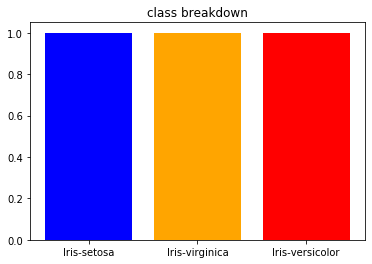

In [7]:
class_breakdown_(iris_labels) #plots a class histogram from a single column DataFrame

#### Feature Analysis

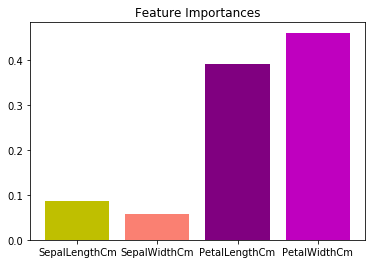

In [9]:
iris_importances=plot_feature_importances(X,y,feature_labels=list(iris_features)) #needs to be converted to list

### Manifold Analysis
##### Let's perform manifold analysis on the Iris dataset. We will plot a 2D TSNE plot and a 3D Isomap plot.

##### The TSNE plot will be colored coded and labeled to better visualize class seperation.

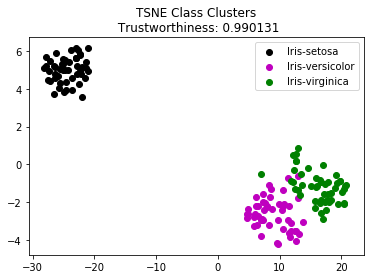

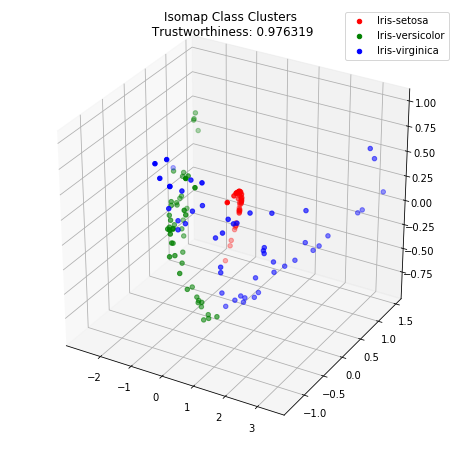

In [10]:
iris_tsne = tsne_transform(X,dim=2) #2D TSNE representation of the Iris dataset 
iris_isomap = isomap_transform(X,dim=3) #3D Isomap representation of Iris dataset
plot_class_scatter(X=X,X_embedded=iris_tsne,y=y,labels=iris_labels,colors=colors,title='TSNE Class Clusters')
plot_class_scatter(X=X,X_embedded=iris_isomap,y=y,labels=iris_labels,colors=colors,title='Isomap Class Clusters')


##### notice the classes cluster very well, so we can expect to see high classification performance. 

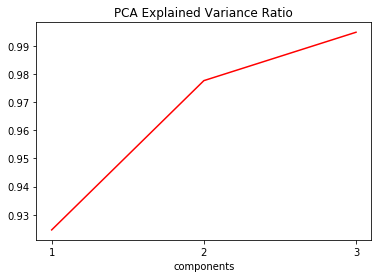

In [11]:
#let's now do some PCA on Iris. Let's see the explained variance ratio as a function of PCs 
plot_pca_evr(X=X,n=3)

#notice that even just 2 components accounts for much of the variance

### Classifiers

#### Let's now build a few classification models. We will make a linear SVM,  a Gaussian NB classifier, and a Random Forest classifier.



In [12]:
linear_svm = make_svc_linear(C=1.0) #Hyperparameter C in SVM with linear kernel set to 1. 
nb_model = make_gaussian_NB() #optional smoothing parameter for Gaussian Naive Bayes, default to sklearn's default of 1e-9
rf_model = make_random_forest_clf(depth=5,trees=20) #20 trees with max depth of 5 in Random Forest Classifier

#let's train all three models on the Iris dataset using an 80-20 train-test split. 

##### examining the trained models...

In [13]:
trained_nb = train_and_validate_clf(X,y,train_per=0.8,predictor=nb_model)

train correct/total: 114/120

train accuracy: 95. %

validation correct/total: 29/30

validation accuracy: 96.7 %



In [14]:
trained_rf = train_and_validate_clf(X,y,train_per=0.8,predictor=rf_model)

train correct/total: 119/120

train accuracy: 99.2 %

validation correct/total: 26/30

validation accuracy: 86.7 %



In [15]:
trained_svm = train_and_validate_clf(X,y,
                                     train_per=0.8,
                                     predictor=linear_svm,
                                     labels=list(iris_labels),
                                     compute_metrics=True)

train correct/total: 118/120

train accuracy: 98.3 %

validation correct/total: 30/30

validation accuracy: 100. %

TRAIN SCORES:

Class:	 Iris-setosa Precision: 1.000000 | Recall: 1.000000 | F1: 1.000000
Class:	 Iris-versicolor Precision: 1.000000 | Recall: 0.953488 | F1: 0.976190
Class:	 Iris-virginica Precision: 0.951220 | Recall: 1.000000 | F1: 0.975000


VAL SCORES:

Class:	 Iris-setosa Precision: 1.000000 | Recall: 1.000000 | F1: 1.000000
Class:	 Iris-versicolor Precision: 1.000000 | Recall: 1.000000 | F1: 1.000000
Class:	 Iris-virginica Precision: 1.000000 | Recall: 1.000000 | F1: 1.000000


In [16]:
#As a final look at Iris, let's perform 3-fold cross validation on the dataset using the Gaussian Naive Bayes model

cross_val_scores = cross_validate(model=trained_nb,X=X,y=y,folds=3)
print(cross_val_scores) #prints out cross-validation accuracy on each of the 3 folds. 



K = 1 score: 0.920000
K = 2 score: 0.940000
K = 3 score: 0.960000
[0.92 0.94 0.96]


### Regression

##### We will perform regression on a dataset of historical Bitcoin prices to demonstrate the regression tools available in Neurales.  
##### Note, this is for demo purposes only, trying to use these in real life would lead to a very bad time. 



In [34]:
#Let's now do a regression problem on a dataset of historical Bitcoin prices

bitcoin_data = data_target_parse(path_to_bitcoin,mode='reg')
#1) Select 2 feature columns to drop
#2) Select "Date" and "Adj Close"
#3) Predict Volume

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
enter in the number of feature columns you wish to drop:	2
enter in a feature column to drop: Date
enter in a feature column to drop: Volume
Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')
enter in a variable you want to predictClose


In [35]:
X = bitcoin_data[0]
y = bitcoin_data[1]
bitcoin_features = bitcoin_data[2]


#### Feature Analysis 



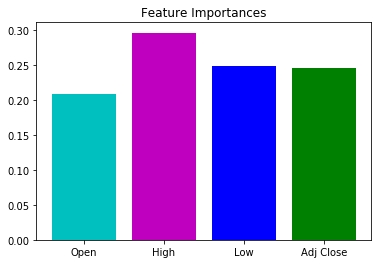

In [36]:
#Here we plot feature importances in predicting the Volume 
plot_feature_importances(X=X,y=y,feature_labels=list(bitcoin_features),mode='reg') #notice we are in regression mode 

#### Manifold Analysis

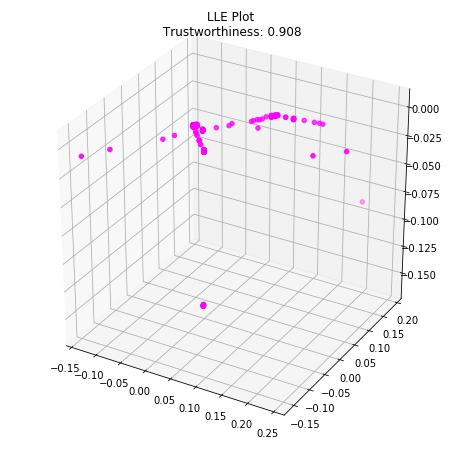

enter in the number of principal components:	2


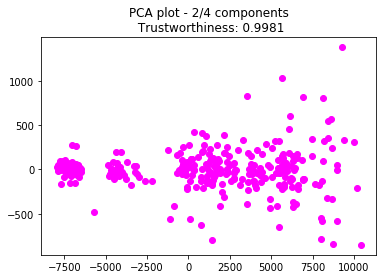

In [37]:
#let's do manifold analysis, using a 3D Locally Linear Embedding (LLE) and a 2D TSNE plot with 2 principle components (PCs)
#Note that the number of principle components can be equal or greater to the dimension of the manifold plot. 
manifold_plot(X=X,dim=3,mode='lle') #3D LLE plot
manifold_plot(X=X,dim=2,mode='pca') #2D PCA plot - user manually enters number of PCs 


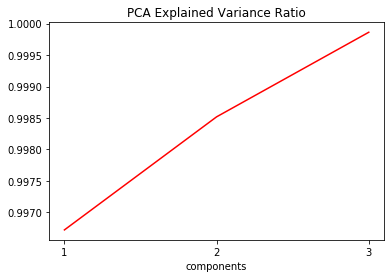

In [38]:
#let's explore the explained variance ratio as a function of principal components
plot_pca_evr(X=X,n=3) #notice that even just 1 principal component accounts for >99% of the explained variance. 

### Regression


In [53]:
#Let's now create a Gradient Booster model and a Support Vector Regressor using a sigmoid kernel

gb_bitcoin = make_gradient_booster_reg(lr=0.01,depth=7,estimators=750)
svr_bitcoin = make_svr_sig(C=1.0)



In [54]:
#let's now train both models using a 75-25 train-test split

trained_gb = train_and_validate_reg(X=X,y=y,train_per=0.75,predictor=gb_bitcoin)


Train Loss: 1.937
Validation Loss: 3393.782


In [46]:
trained_svr = train_and_validate_reg(X,y,train_per=0.75,predictor=svr_bitcoin)

#notice both of these models have fairly high loss 

Train Loss: 6907362.508
Validation Loss: 8247466.251


In [58]:
X_new = min_max_scale(X=X,a=0,b=1)

gb_bitcoin = make_gradient_booster_reg(lr=0.01,depth=7,estimators=750)
trained_gb = train_and_validate_reg(X=X_new,y=y,train_per=0.75,predictor=gb_bitcoin)

#compare results with and without feature scaling. Sometimes it helps, other times not!


Train Loss: 2.034
Validation Loss: 3049.066


In [59]:
#let's test out some predictions
print(len(X))

predicted=predict(trained_gb,X_new[:5])
print(predicted[:5])
targets = y[:5]
print(targets)

#The values are fairly close so the model indeed performed well! 


362
[3845.32744924 3937.87886543 3838.55735241 3859.57677619 3846.99811651]
0    3843.520020
1    3943.409424
2    3836.741211
3    3857.717529
4    3845.194580
Name: Close, dtype: float64


## Anaconda Command-Line UI

#### The Anaconda terminal was "repurposed" as a "front-end" for Neurales beta. A lot of the above code can be run via the Anaconda terminal. The goal here is all the functionalites of Neurales are run via command line, with the actual fuctionalities contained within python files. The command line-UI will be available in the full release of Neurales

#### Loading in the Iris dataset from the command line 

     1) Go to directory (using the cd command) where you downloaded neurales
     2) type "python run_neurales_main.py" followed by --path <path to the file you want to run neurales on>
        *note in this example, we just load in the Iris dataset, which comes with Neurales

<img src="./doc_screenshots/iris_command_line.jpg" width=1000 height=1000 />

#### The above only loads in the file, to perform feature + manifold anaylsis, make a model and obtain plots, arguments will need to be passed in. They are as follows:

     1) --mode (clf or reg) - If clf is typed, neurales considers your data to be in "classification" mode and when feature
                              and/or manifold analysis is performed, neurales will cluster data according to class.
        
     2) --train_per - here the user enters in a training percentage for the original data. Neurales defaults to 0.8,
                        which is an 80-20 train-test split. 
     3) --cross_val - True/False - whether or not to perform K-fold cross-validation on the dataset.
                                   The user will be prompted for the number of folds (K). Note this is for clf mode only
         
     4) --class_hist - plots histogram of the classes in your dataset (note this only works if you are in clf mode)
     
     5) --model - here is where the user selects a model. Neurales will automatically detect whether to make a classifier 
                  version of the model or a regressor version 
                  (e.x random forests can be used for classification or regression)
                  
                  - users will ultimately be promoted to enter in hyperparameters for their chosen model via the 
                    command line 
                    
                 The model choice are:
                 A) NB - Naive Bayes (for clf mode only)
                    I) G - Gaussian Naive Bayes
                    II) M - Multinomial Naive Bayes
                    III) C - Complement Naive Bayes
                    IV) B - Bernoulli Naive Bayes (note - only appropriate for binary features)
                    IV) Ca - Categorical Naive Bayes
                    
                 B) RF - Random Forest (clf or reg mode)
                 C) DT - Decision Tree (clf or reg mode)
                 D) SVM - Support Vector Machine (clf or reg mode)
                    I) L - linear kernel
                    II) R - Radial Basis Function (rbf kernel)
                    III) P - Polynomial kernel
                    IV)  S - sigmoid kernel
                 E) GB - Gradient Booster (clf or reg mode) 
                 
      6) --feature_scale True/False (default True) - Whether or not to apply feature scaling to the dataset
            user will be further prompted to use min/max scaling or the standard scaler if they select True 
            
            A) M - min/max scale 
            B) S - standard scale (z-score normalization of features)
            
      7) --feature_analysis True/False - performs feature analysis on the dataset
                                         (note this might be slow for large datasets)
      
      8) --manifold_plot True/False - Whether or not to plot a manifold embedding of the data. User will be further prompted
           to enter in a manifold type and the corresponding dimension (2D or 3D) for plotting. Note this is INCREDIBLY
           slow for larger datasets, an option is given to limit the dataset plot to 250 samples, but this has a few issues
           
             - in clf mode, there is no guarantee all classes will make their way onto a manifold plot. 
               This issue will be addressed in the next update of nuerales.
               
             - in clf or reg mode, the data sample that is plotted might be a poor representation of the population
               at large, so not much information about the dataset could be obtained from clustering in this case.
           
           A) tsne - TSNE plot
              I) 2 - 2D plot
              II) 3 - 3D plot
           B) lle - Locally Linear Embedding plot
              I) 2 - 2D plot
              II) 3D - 3D plot
           C) isomap - Isomap plot
              I) 2 - 2D plot
              II) 3 - 3D plot
           D) pca - Principal Component Analysis 
               - the user will be prompted to enter in the number of PCs. Note the number of PCs must be at least as high
                 as the plotting dimension (the plot will plot using the 1st 2 or 3 PCs depending on the dimension)
              I) 2 - 2D plot
              II) 3 - 3D plot
              
           
      9) --anomaly_detection True/False - whether or not to compute outliers/anomalous datapoints. 
      
      10 --metrics True/False - if True, Neurales computes precision, recall and F1 scores (only in clf mode). 
      
      11) --adverse_impact True/False - whether or not to perform "Adverse Impact Analysis (AIA)" on the dataset. 
            AIA aims to address biases on the predicted dataset. 
            Often times this is done with a host of complex metrics, but it is challenging to come up 
            with a uniform way of detecting biases in the data and/or predictions on the data. 
            We are currently working on improving AIA within neurales, but right now, 
            neurales outputs a pie chart detailing how biased a model's predictions are towards 
            one class or another using the F1 score. This provides a clean visual representation
            of biases that are easy to communicate to stakeholders. 
            
      12) --explore - True/False (default False) - whether or not to debug/explore the data and/or models 
                      after the desired tasks have been completed. Neurales uses the pdb module to allow users
                      to interact and explore with the code. 
                      Variables of interest: 
                      
                          I) X (clf or reg) - dataset in np.array form
                          II) y (clf or reg) - target values in pd.DataFrame form
                          IV) feature_names (clf or reg) - list of feature names
                          IV) labels (clf) - list of classes 
                          V) trained_model : the trained model which can be used to predict new values
                            (ex. predict(trained_model,X[:10]) will output predictions
                            for the the first ten samples in the data X using the trained model. 
                          
                                             
      

#### Here we are going to manifold plot, do feature analysis, select a NB classifier and finally, obtain precision, recall, and F1 scores.

<img src="./doc_screenshots/all_clf.jpg" width=1000 height=1000 />

#### Class breakdown plot (plot must be closed before proceeding, but can be saved to Documents)
<img src="./doc_screenshots/iris_class_breakdown.jpg" width=1000 height=1000 />

#### Next, we are promoted to select a feature scaling technique.

#### Note that feature scaling defaults to "True" so if you do not wish to feature scale, pass the argument --feature_scale False

#### In this example we select M (for min/max scaling) and use 0 for the lowest feature value and 1 for the highest. 

#### Note if we wanted to use the standard scaler, we would select S instead. 

<img src="./doc_screenshots/iris_min_max.jpg" width=1000 height=1000 />

<img src="./doc_screenshots/iris_scale_with_features.jpg" width=1000 height=1000 />

### Now we will choose 3D TSNE

<img src="./doc_screenshots/iris_tsne_command.jpg" width=1000 height=1000 />

### Now we will select Gaussian Naive Bayes

#### Note the Naive Bayes models do not have parameter selection - this is because they are meant to be a "first model" which will likely be replaced by a more performant model. 

#### We also specified --metrics True, so neurales will also compute the precision, recall, and F1 scores

<img src="./doc_screenshots/nb_scores.jpg" width=800 height=600 />

#### Similarly, let's do a manifold plot of the bitcoin_demo_all.csv
      1) Let's drop three columns: Date (this has to be dropped), Adj Close and Volume
      2) Select Gradient Booster model (--GB) - we will use 500 trees (the "weak learners")
         with a max depth of 7. 
      3) Let's use min/max scaler again to normalize the data
      4) Let's do a 2D Isomap plot (omitted from screenshot) - note there are more than 250 samples, and here the user
         has chosen to go ahead and plot the full dataset. If they had selected "No" or "N", only the first 250 samples
         would be plotted for Isomap (or any other manifold technique)
      5) Explore/debug the model to verify the predictions are desirable 
      
<img src="./doc_screenshots/regression_work.jpg" width=1000 height=1000 />

#### Note both the training loss and validation loss seem a little bit high, but we can investigate further.

#### Let's have the model predict a value for the "close" price for the first ten data samples and compare it to the true data:



<img src="./doc_screenshots/debug_1.jpg" width=700 height=1000 />


#### If the model isn't good enough, we can make another one, just by using the code found in Neurales_2020_main.py, all from the comfort of the command line! 

<img src="./doc_screenshots/model_compare.jpg" width=700 height=1000 />

#### Note that upon inspection, it appears likely that model 2 would perform worse than the first model. Regardless, feature scaling, manifold plotting, model training and retraining can all be done from the command line. To exit the debugger, simply hit Ctrl + C or type "exit".

### Making a new custom dataset (Kaggle)

##### Now that we have walked through the above tutorial, let's go ahead and grab a new dataset off of Kaggle. 
##### Note that it is possible to create our own datasets in .csv format and upload it directly as above, just make sure the column heads are clearly named and the data within the columns is numeric (if not, feel free to drop the columns that aren't numeric)

### 1) Grab dataset off of Kaggle: 

<img src="./doc_screenshots/kaggle_dataset.jpg" width=1000 height=600 />

### 2) Unzip folder into desired location 
#### (perhaps into your open copy of Neurales)

<img src="./doc_screenshots/unzip.jpg" width=1000 height=600 />

### 3) Locate the dataset

<img src="./doc_screenshots/unzipped.jpg" width=1000 height=600 />

### 4) Open the Anaconda terminal and run neurales_main.py as in the Iris and Bitcoin examples

#### How do we choose the mode? A classification problem is when you are trying to predict the group data belongs to. Regression is when you are trying to predict numeric values. A good rule of thumb is if the column you want to predict doesn't have any decimals (just whole numbers like 1 or 0) you have a classification problem, and if you have decimals in the column you want to predict, it is a regression problem. The same dataset, depending on what you want to predict can be used for classification or regression. In this example, we want to predict whether or not a patient is deceased. This information is located in the final, rightmost column and only has 1s and 0s, therefore, we will use --mode clf for classification.

#### Additionally, we will start with a Naive Bayes model to predict the classes, and this time perform anomaly detection and AIA on the dataset. 

<img src="./doc_screenshots/custom_load.jpg" width=1000 height=600 />

##### We want to predict "DEATH_EVENT" (this is the column that has the information whether or not a patient survived)  - 0 for survived and 1 for didn't survive

<img src="./doc_screenshots/death_event.jpg" width=1000 height=600 />

##### We will use the Standard Scaler, and this time we will use the Bernoulli Naive Bayes, which is suited for binary (2-class) classification. 

<img src="./doc_screenshots/bernoulli_nb.jpg" width=1000 height=600 />

##### Our model is very biased, and we can see this even before AIA due to the very skewed F1 scores

<img src="./doc_screenshots/biased_nb.jpg" width=1000 height=600 />

##### How do we improve this model? That's the work with ML. How do we know which model to pick? What hyperparameters etc.?

##### What if there was a way to EVOLVE the best model? With Neurales, there is a way. 




## Genetic Algorithms 

Neuroevolution works by evolving a population of "chromosomes". A "fitness" metric evaluates how "good" our chromosomes
are relative to our target goal. Unlike many objective functions, fitness functions need not be differentiable. 
The goal is that with each generation, the fitness values of the chromosomes increases closer to our target goal. A genetic
algorithm can be broken down into the following steps:

1) Initialize a population of chromosomes

2) Run program + calculate fitness of each chromosome

3) Select the best chromosome(s)

4) Initialize new population, keeping the most fit chromosomes from the old generation, 
   and creating new random chromosomes (elitist selection approach) OR select most fit chromosomes as "parents"
   and create "offspring" by combining subsets of genes from both parents, and mutating one or more 
   genes in the offspring (crossover-mutation approach). *

5) Repeat/loop until a fixed number of generations is completed and/or the fitness reaches a pre-defined threshold. 





### Genetic Algorithms (GAs) for traditional ML models

#### Neurales uses the elitist selection approach to evolve traditional ML models (Gradient Boosters and SVMs) when the data is in tabular .csv format. 

#### A novel feature of Neurales here is rather than evolving just the models, Neurales evolves a ${pipeline}$ - that is, it evolves a combination of a feature scaler + feature extractor + model. The idea here is that data preprocessing and feature extraction can sometimes be even more important than choosing good model hyperparameters, which is often times the only focus of evolutionary algorithms. The API here is extremely straighforward - pass in your dataset in .csv format, select the type of classifier/regression models you wish to evolve, and then watch it run! As a challenge, see if you can create a model and/or pipeline that outperforms the best one the genetic algorithm finds after even just 5 generations with 10 chromosomes in each generation. 

##### Why GAs over other hyperparameter optimization methods like grid search? Grid search is just a brute-force search through a ${manually}$ specified set of hyperparameter options. There is no guarantee that the set contains combinations that lead to performant models, and even if they do, could there be better ones? GAs evolve the best combination because there is a mechanism for evaluating what makes a combination of hyperparameters performant. Additionally, as shown later in the documentation, unusual or counterintuitive combinations of hyperparameters can outperform the "conventional" combinations. GAs have found success in multiple areas of optimization research, and they are extremely flexible in the number and types of problems they can be applied to. I won't go into this here, but the GA tools available in Neurales beta offers just a glimpse of their utility. 

##### let's walk through a demo of this with Iris: 

In [60]:
from genetic_models import *
clf_path = '../demo_files/iris_demo.csv'



In [61]:
iris_data = data_target_parse(clf_path,mode='clf')
X = iris_data[0]
y = iris_data[1]


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
enter in the number of feature columns you wish to drop:	1
enter in a feature column to drop: Id
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
enter in a variable you want to predictSpecies


#### We will evolve to find the best SVM models 

Generation: [1/30] | Chromosome: [1/20]
test correct/total: 11/38

test accuracy: 28.9 %

SVM Fitness: 0.49258946180537394
Generation: [1/30] | Chromosome: [2/20]
test correct/total: 34/38

test accuracy: 89.5 %

SVM Fitness: 0.8842086883325734
Generation: [1/30] | Chromosome: [3/20]
test correct/total: 37/38

test accuracy: 97.4 %

SVM Fitness: 0.8737423635728708
Generation: [1/30] | Chromosome: [4/20]
test correct/total: 18/38

test accuracy: 47.4 %

SVM Fitness: 0.6903814459402902
Generation: [1/30] | Chromosome: [5/20]
test correct/total: 32/38

test accuracy: 84.2 %

SVM Fitness: 0.7976452460957594
Generation: [1/30] | Chromosome: [6/20]
test correct/total: 9/38

test accuracy: 23.7 %

SVM Fitness: 0.6272334442525441
Generation: [1/30] | Chromosome: [7/20]
test correct/total: 11/38

test accuracy: 28.9 %

SVM Fitness: 0.5813329277510165
Generation: [1/30] | Chromosome: [8/20]
test correct/total: 11/38

test accuracy: 28.9 %

SVM Fitness: 0.6581107760257359
Generation: [1/30] | Chr

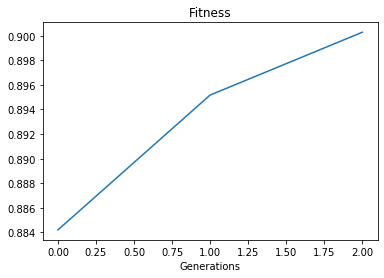

In [62]:
results = evolve_svm_pipeline_clf(X=X, #Data
                        y=y, #target variable
                        num_generations=30, #number of generations to evolve the chromosomes
                        num_chroms=20, #number of chromosomes
                        metric='accuracy', #metric to evolve 
                        elite_frac=0.1, #fractions of models deemed elite
                        target_acc=0.99, #target accuracy to reach before stopping evolution 
                        train_per=0.75) #train percentage to train dataset on 


### Anaconda UI for evolving traditional ML models

##### To run the GAs, go to the Anaconda Terminal, then go to the neurales directory and type the following:
##### python run_genetic_models.py and enter in any number of the following arguments:
      1) --path - the path to the .csv data
      2) --train_per - the percentage of training data to use
      3) --models - GB (for evolving Gradient Boosters) or SVM (for evolving Support Vector Machines)
      4) --mode -clf (classification) or -reg (regression) 
      5) --generations - the number of generations to evolve for
      6) --chromosomes - the number of chromosomes in each generation 
      7) --elite_frac - the fraction of chromosomes deemed "elite" every generation 
      8) --target_score - the score the user wishes to evolve towards. Evolution stops if the target score is reached
      9) --metric - the metric to prioritize during evolution 
           note the target score is metric specific. If you set target_score to 0.95 and set the metric to 'f1',
           there could be models which have test accuracies above 95% but have F1 scores below the target score. Be
           mindful of what metric you wish to prioritize. Note that a higher F1 score implies higher test accuracy,
           but a higher test accuracy doesn't necessarily imply a similarly high F1 score, particularly when 
           classes are imbalanced (having more significantly more samples in one class versus another). 
      10) --explore - whether or not to explore/debug after the script finishe running. 

#### To run the same script as above (except for using Gradient Boosters over SVMs) in the terminal, consider the screenshot below:

<img src="./doc_screenshots/genetic_models.jpg" width=1000 height=600 />


### Custom Computer Vision



#### 1) CNNs for image classification


##### Neurales similarly offers you the ability to do custom image classification, custom image generation, and custom style transfer, while also providing non-custom object detection. 

##### Users have the ability to make custom CNNs, custom autoencoders, custom DCGANs and apply it to their own datasets. Keep in mind that deep learning algorithms usually require lots of data and its recommended the user collect as much data as possible. Future updates will include few-shot learning for image classification and object detection. 

### Load custom image datasets

##### Loading custom datasets is simple - to properly create and load a dataset, follow this procedure:
     1) Create a main/root folder
     2) In that root folder, create a folder for each class 
     3) Place the images in the correct class folder

##### Let's walk through an example - we will load in a dataset which has ants, bees, butterflies and moths

In [63]:
train_path = '../image_datasets/notebook_demo/train' #path to training images
val_path = '../image_datasets/notebook_demo/val' #path to test/validation images

train_images = os.listdir(train_path)
val_images = os.listdir(val_path)
print('train classes: {}'.format(train_images)) #will list the folders of the training path 
print('val classes: {}'.format(val_images)) #will list the folders of the validation path 




train classes: ['Ants', 'Bees', 'Butterflies', 'Moths']
val classes: ['Ants', 'Bees', 'Butterflies', 'Moths']


##### the length of the list will be equal to the number of classes used for classification. Note that if you want to run an autoencoder or a GAN, follow the same procedure, the class names in that case are irrelevant.


In [64]:
from neurales_CV import * #loading in the Neurales computer vision module 

In [65]:
dataloader=load_custom_image_dset(path=train_path,transform='default') #loads in a custom dataset as a Pytorch dataloader object

#The default transform resizes images to (40 x 40). A custom transform object can be passed instead of 'default'

#### plot samples from dataloader

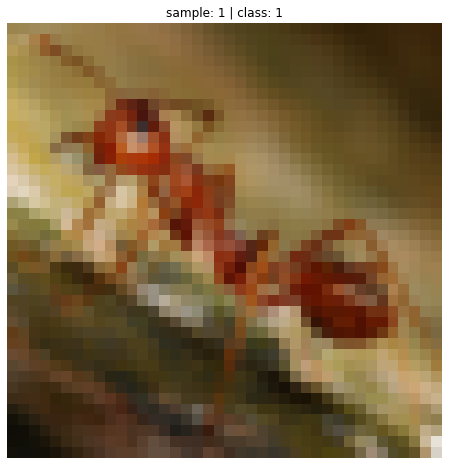

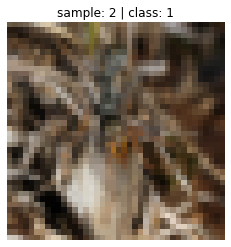

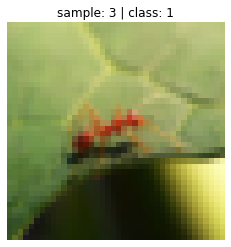

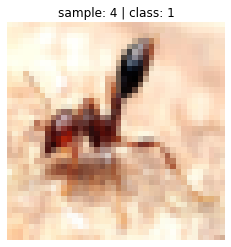

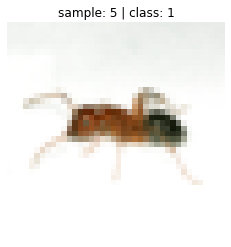

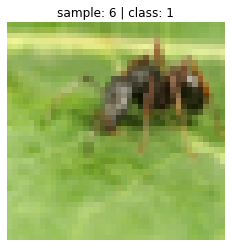

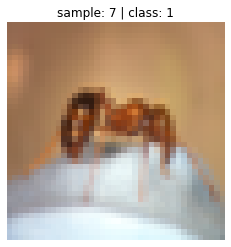

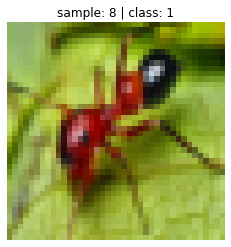

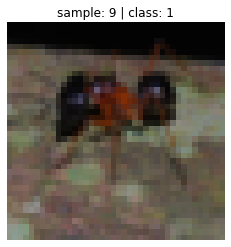

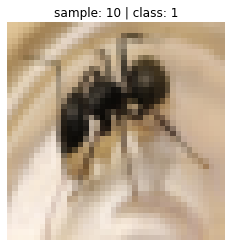

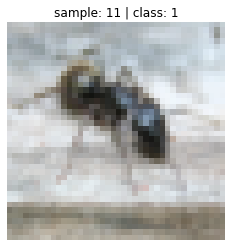

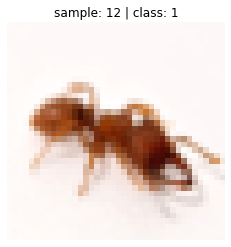

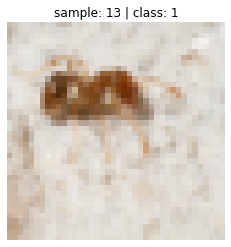

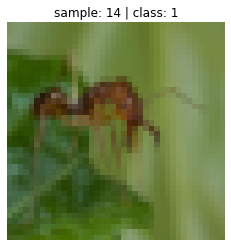

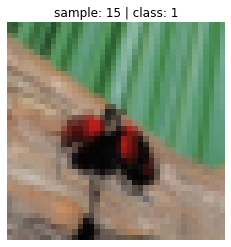

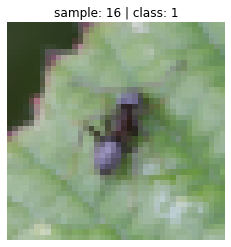

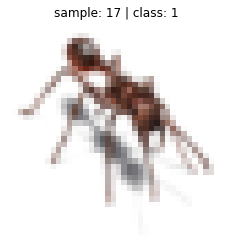

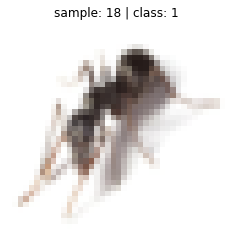

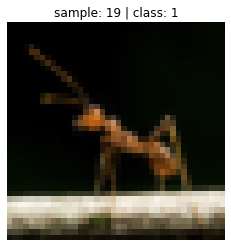

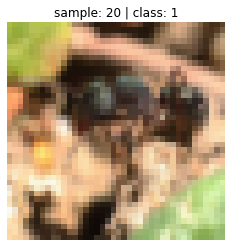

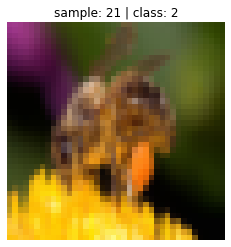

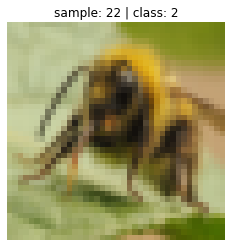

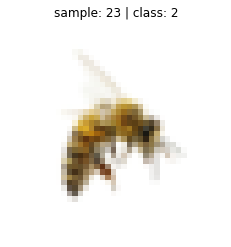

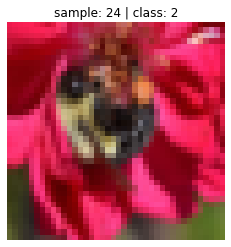

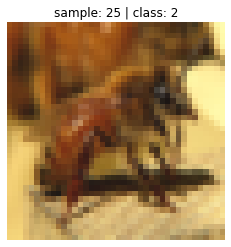

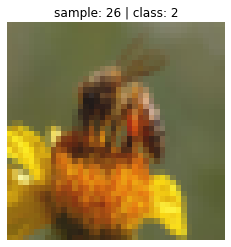

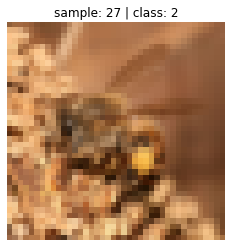

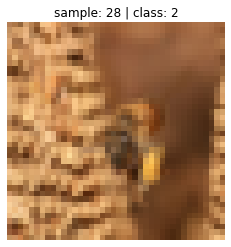

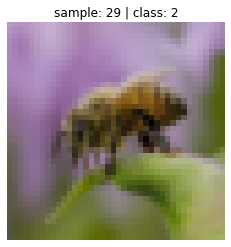

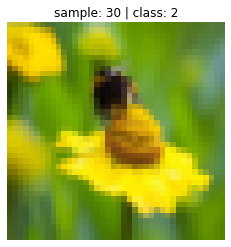

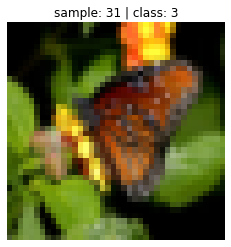

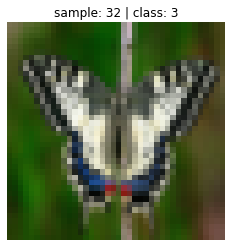

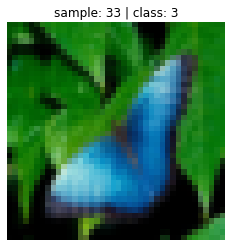

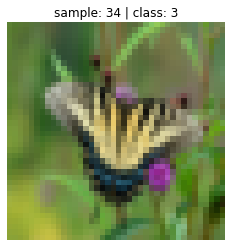

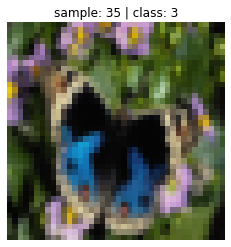

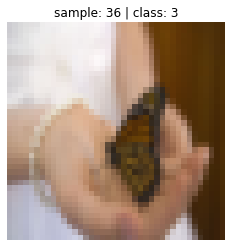

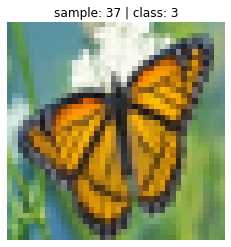

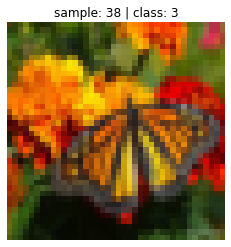

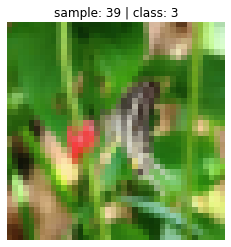

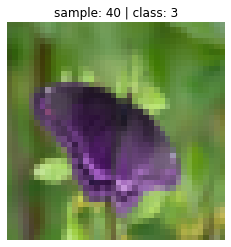

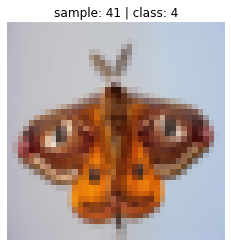

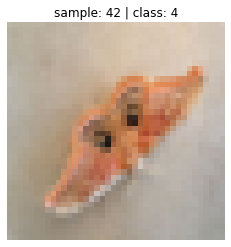

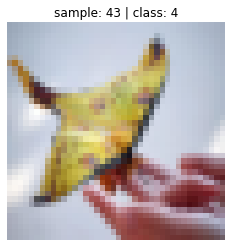

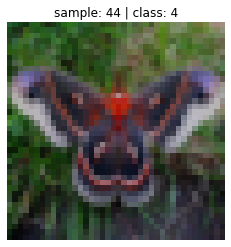

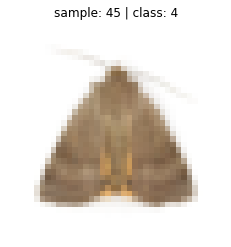

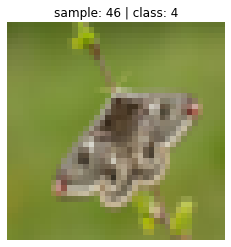

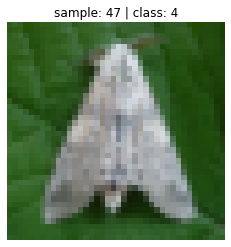

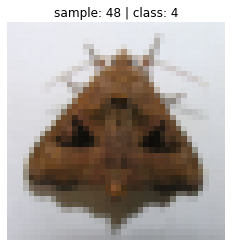

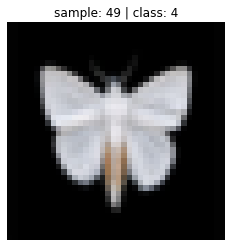

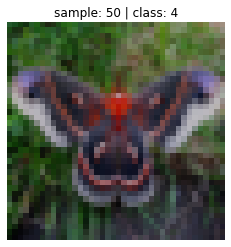

In [66]:
plot_torch_samples(dataloader) #plots the samples and the corresponding class they belong to. 

#### Plot images directly from path

##### this function let's you combine the above two steps, and also plots the class name instead of the class index 


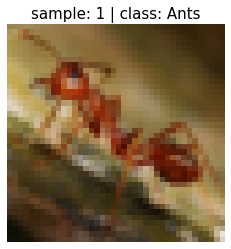

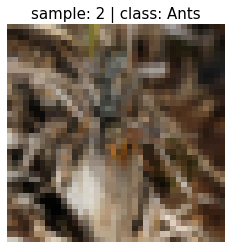

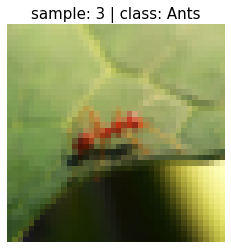

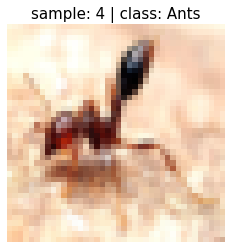

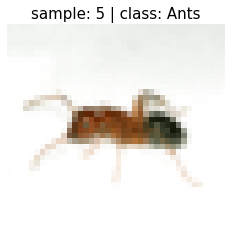

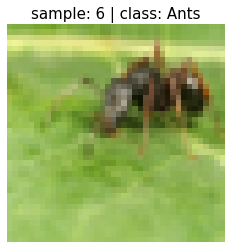

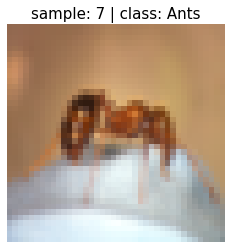

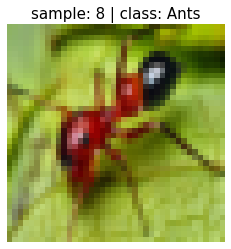

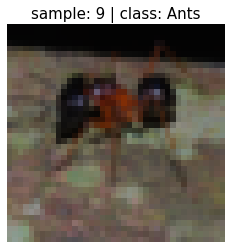

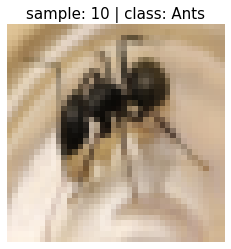

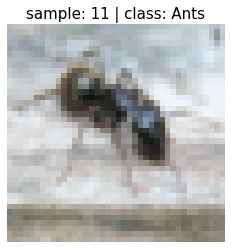

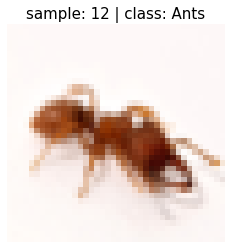

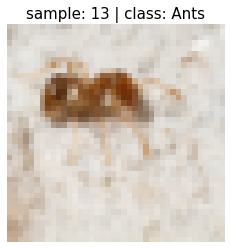

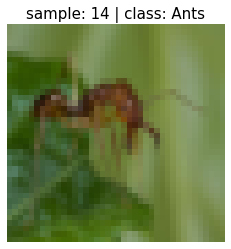

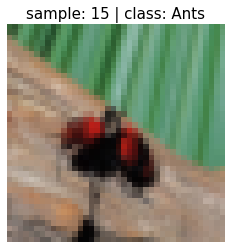

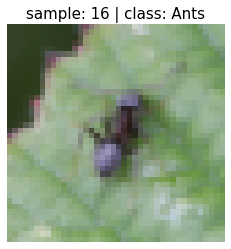

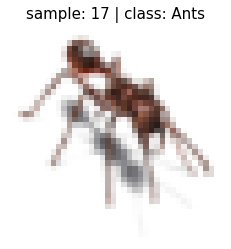

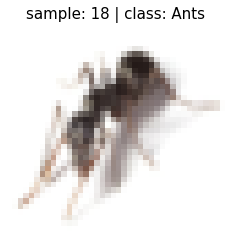

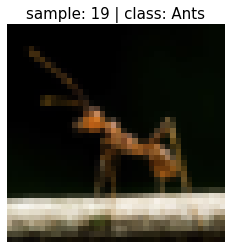

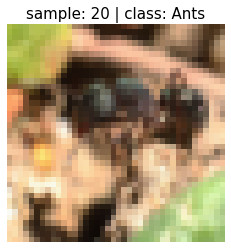

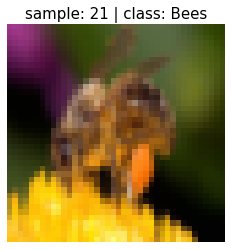

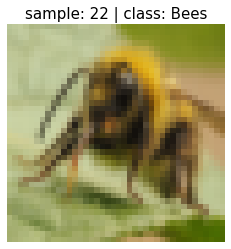

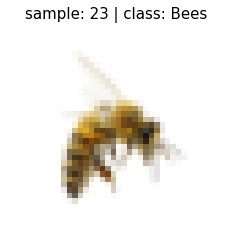

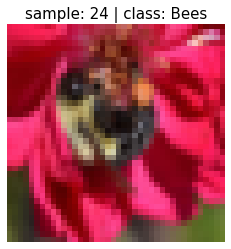

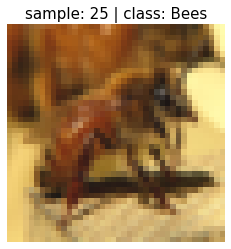

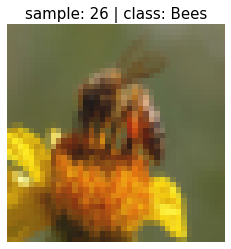

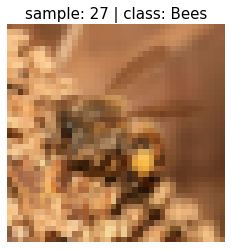

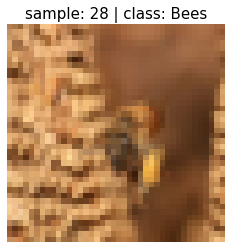

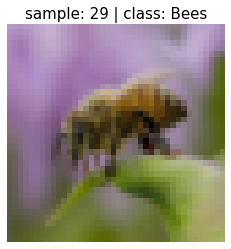

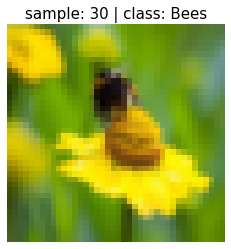

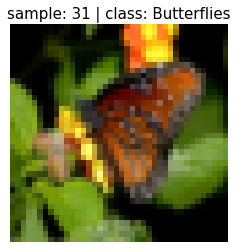

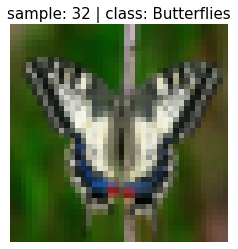

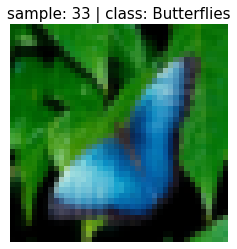

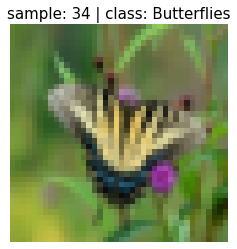

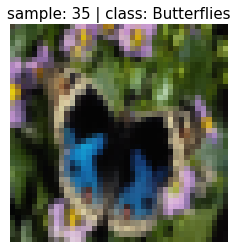

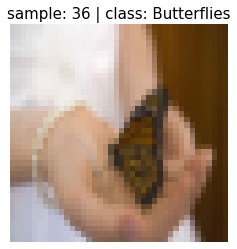

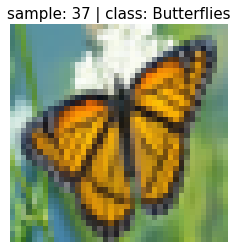

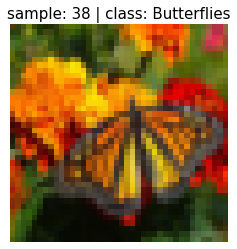

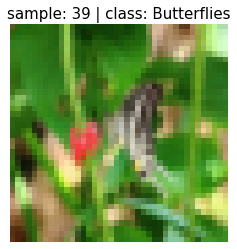

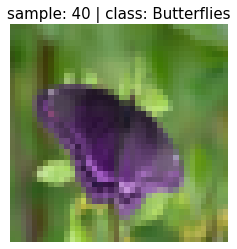

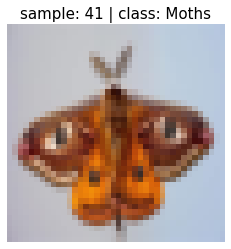

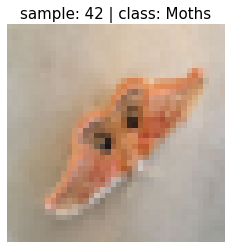

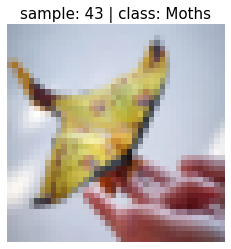

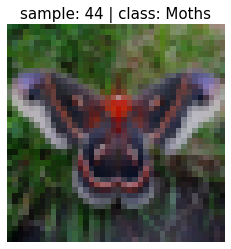

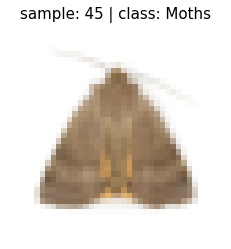

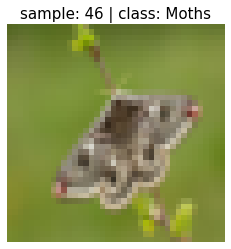

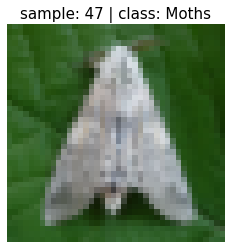

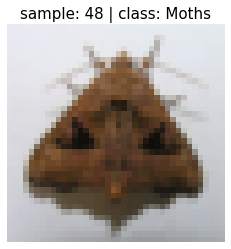

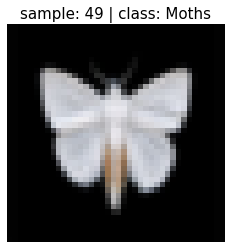

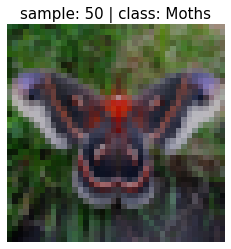

In [67]:
plot_imgs_from_path(path=train_path,transform='default',figsize=(8,8))

#### Extracting Images from Dataloader

In [68]:
imgs = imgs_from_dataloader(dataloader)
print(imgs.shape) #success! 

torch.Size([50, 3, 40, 40])


#### Manifold analysis

#### We can also do TSNE, LLE, Isomap and PCA plots of the images like we did for data in the .csv format. Note that no model has yet learned to ${extract}$ features from the datset, so these plots use raw pixel values to cluster, rather than extracted features that are found during training

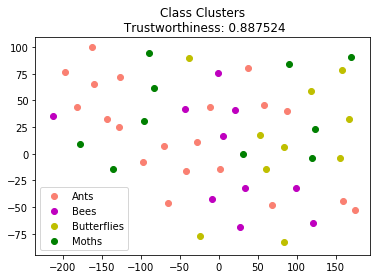

In [69]:
plot_manifold_embedding_from_path(path=train_path,transform='default',figsize=(10,10),embedding='tsne')

#### Rather than just plotting the data as 2D representations, we can plot the images ${themselves}$ over the data points to help visualize class seperation, if any (once again, this is done on raw pixel values). This means that we shouldn't expect classes to cluster yet. 

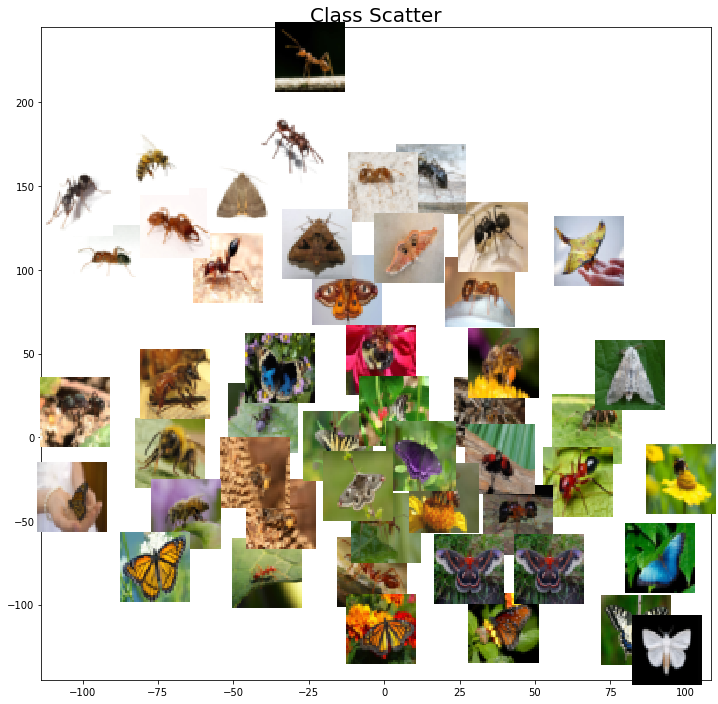

In [70]:
plot_img_manifolds_from_path(path=train_path,transform='default',figsize=(8,8),embedding='tsne')


#### Class histogram 

##### We can plot a class histogram like we did above

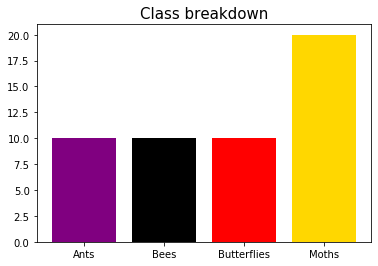

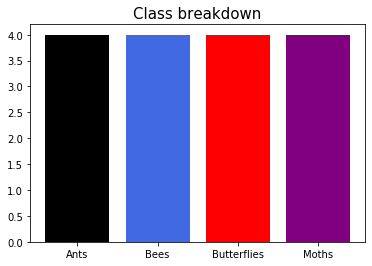

[4, 4, 4, 4]

In [71]:
tensor_class_breakdown(path=train_path) #train path histogram 
tensor_class_breakdown(path=val_path) #val path histogram

### Custom CNN for image classification

##### let's now build our custom CNN for image classification

In [72]:
cnn = custom_cnn(num_conv_layers=5, #a five layer deep CNN
                 nc=3, #Number of input channels, since our images are colored (RGB) we use three channels
                 num_classes=4, #we have four different classes - ants, bees, butterflies and moths
                 batch_norm=False, #whether or not to use batch normalization in our model
                 dropout=False, #whether or not to use dropout in our network 
                 adaptive_pool_type='max', #whether to use adaptive max pooling or average pooling in final convolutional layer
                 adaptive_pool_size=5, #the size of the adaptive pooling output (in this case 5 x 5)
                 conv_dim=2) #images are 2D, so we use a 2D CNN (signals are 1 and voxel-based data or videos could be 3)


enter in the number of channels/filters for layer 1/5:	4
enter in the number of channels/filters for layer 2/5:	128
enter in the number of channels/filters for layer 3/5:	64
enter in the number of channels/filters for layer 4/5:	32
enter in the number of channels/filters for layer 5/5:	3
enter in the number of kernel size (beta only supports square kernels) for layer 1/5:	3
enter in the number of kernel size (beta only supports square kernels) for layer 2/5:	3
enter in the number of kernel size (beta only supports square kernels) for layer 3/5:	3
enter in the number of kernel size (beta only supports square kernels) for layer 4/5:	3
enter in the number of kernel size (beta only supports square kernels) for layer 5/5:	3
enter in the size of the hidden layers:	200


In [73]:
print(cnn) #notice we now have a CNN ready for training 

custom_cnn(
  (conv_block): Sequential(
    (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): PReLU(num_parameters=4)
    (2): Conv2d(4, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): PReLU(num_parameters=128)
    (4): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): PReLU(num_parameters=64)
    (6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): PReLU(num_parameters=32)
    (8): Conv2d(32, 3, kernel_size=(3, 3), stride=(1, 1))
    (9): PReLU(num_parameters=3)
    (10): AdaptiveMaxPool2d(output_size=(5, 5))
  )
  (fc_block): Sequential(
    (0): Linear(in_features=75, out_features=200, bias=True)
    (1): ReLU()
    (2): Linear(in_features=200, out_features=4, bias=True)
  )
)


#### let's test the network to make sure it can compute a forward pass

In [74]:
output = cnn(torch.randn(4,3,40,40)) #batch size of 4, 3 channels, 40 x 40 images
print(output) #we should get a 2D tensor (matrix) of size batch size (4) x number of classes (4)


tensor([[ 0.0348,  0.0046, -0.0457,  0.0288],
        [ 0.0378,  0.0056, -0.0489,  0.0277],
        [ 0.0379,  0.0062, -0.0465,  0.0274],
        [ 0.0377,  0.0035, -0.0444,  0.0290]], grad_fn=<AddmmBackward>)


### Feature map visualization 

#### We can get the output of a layer of the CNN, and plot the channels/filters for that layer. This let's see the feature maps in a given layer

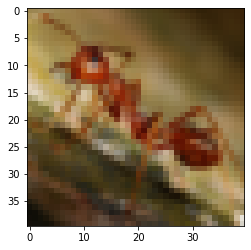

In [75]:
#let's plot the image

plt.imshow(imgs[0].permute(1,2,0).detach().numpy())
plt.show()

#we will feed in this image into the CNN

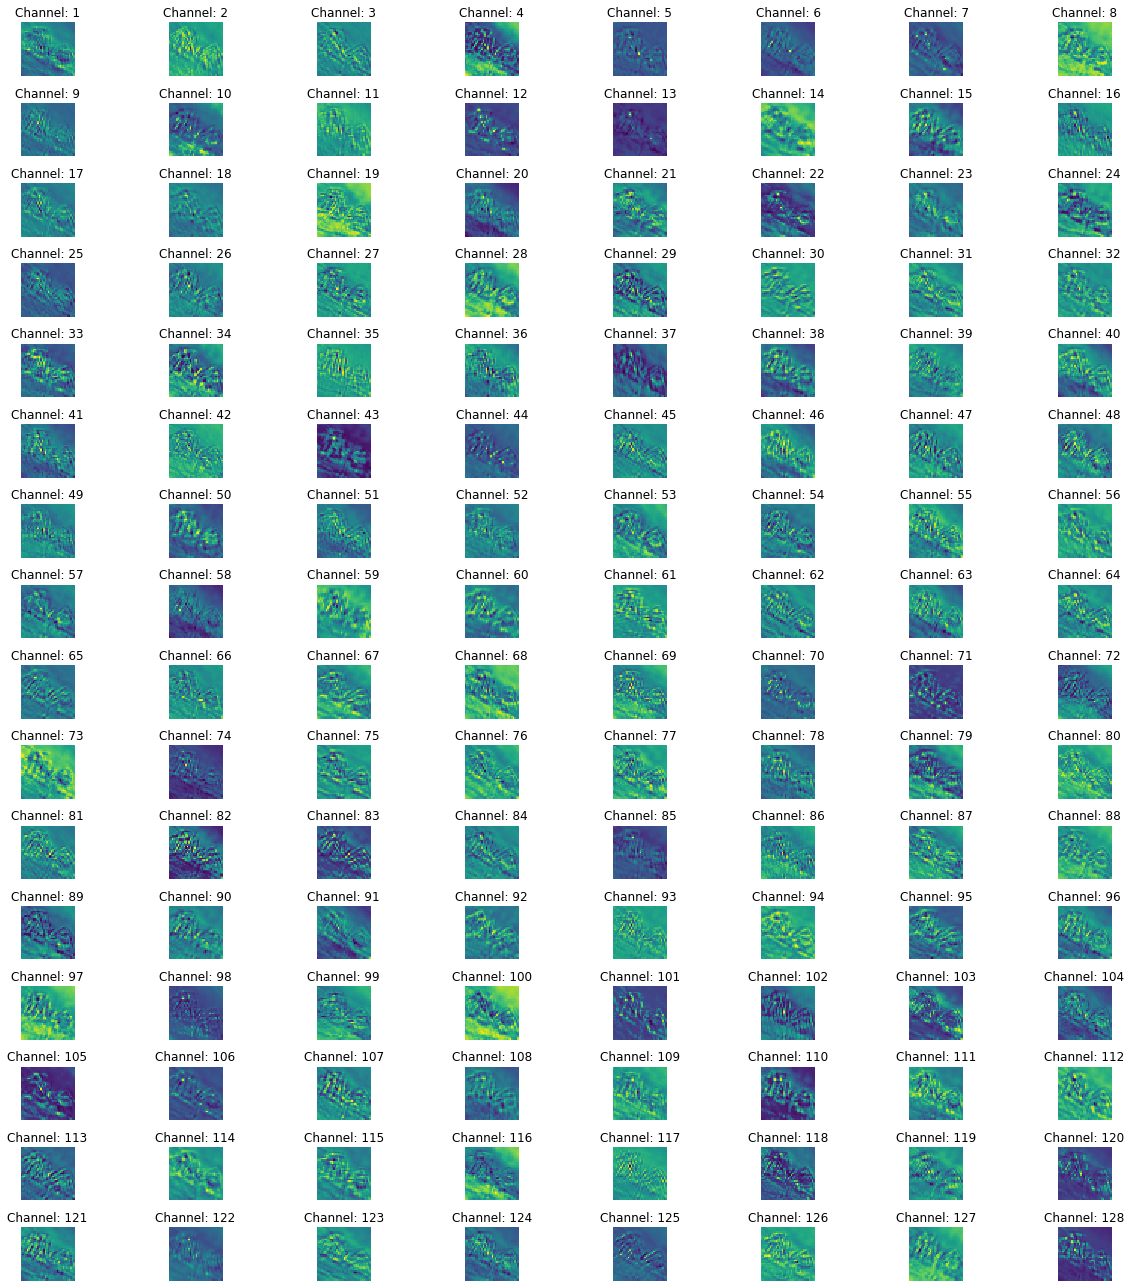

In [76]:
visualize_filters(layer=2,model=cnn,img=imgs[0],cmap=None) #layer 2 of network with optinal colormap (cmap) argument

#note we haven't trained the network yet, so features won't be well defined. 

### Train CNN

##### Let's now train our CNN

In [77]:
results = train_cnn(train_path=train_path, #path to training images
                    val_path=val_path, #path to validation images
                    model=cnn, #model object - we use the cnn object we constructed above
                    transform='default', #use default transformation (pass in a Pytorch transform object if desired)
                    batch_size=10, #use a batch size of 10
                    epochs=5, #train the model for 5 epochs
                    optimizer='sgd', #use sgd to optimize the model 
                    lr=0.005, #learning rate of 0.005
                    momentum=0.9, #momentum of 0.9
                    weight_decay=0, #use weight decay? (set to 0 if not using)
                    img_size=(40,40)) #size of input images



epoch: 1/5
batch: 1/5
Loss: 1.3839391469955444
epoch: 1/5
batch: 2/5
Loss: 1.3885440826416016
epoch: 1/5
batch: 3/5
Loss: 1.3793139457702637
epoch: 1/5
batch: 4/5
Loss: 1.3674684762954712
epoch: 1/5
batch: 5/5
Loss: 1.3825856447219849
epoch: 2/5
batch: 1/5
Loss: 1.3853704929351807
epoch: 2/5
batch: 2/5
Loss: 1.357112169265747
epoch: 2/5
batch: 3/5
Loss: 1.3839843273162842
epoch: 2/5
batch: 4/5
Loss: 1.3804982900619507
epoch: 2/5
batch: 5/5
Loss: 1.374691128730774
epoch: 3/5
batch: 1/5
Loss: 1.3434345722198486
epoch: 3/5
batch: 2/5
Loss: 1.3895810842514038
epoch: 3/5
batch: 3/5
Loss: 1.3975846767425537
epoch: 3/5
batch: 4/5
Loss: 1.3380340337753296
epoch: 3/5
batch: 5/5
Loss: 1.378311276435852
epoch: 4/5
batch: 1/5
Loss: 1.388777494430542
epoch: 4/5
batch: 2/5
Loss: 1.373281717300415
epoch: 4/5
batch: 3/5
Loss: 1.378825068473816
epoch: 4/5
batch: 4/5
Loss: 1.3302018642425537
epoch: 4/5
batch: 5/5
Loss: 1.3356883525848389
epoch: 5/5
batch: 1/5
Loss: 1.3683435916900635
epoch: 5/5
batch: 2

C:\Users\XZ-WAVE\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


batch: 1/2
Loss: -0.01199371088296175
predicted: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ground truth: [3, 1, 2, 2, 0, 0, 2, 1, 2, 0]
batch: 2/2
Loss: 0.008537027053534985
predicted: [0, 0, 0, 0, 0, 0]
ground truth: [1, 3, 3, 3, 0, 1]


#### Anaconda UI for custom image classification with a CNN
##### Go to Anaconda terminal and type python run_neurales_cnn.py and add any number of the following arguments
      1) --train_path - path to training images 
      2) --val_path - path to validation images 
         *check to make sure train_path and val_path have the same number of classes (they will have same number of folders,
          and none of those folders would be empty)
      3) --channels - the channels for the images (defaults to 3, but will change to 1 if working on MNIST or FashionMNIST)
      4) --num_conv_layers - the number of convolutional layers in the custom network 
      5) --batch_norm - whether or not to use Batch Norm after each convolutional layer 
      6) --dropout - whether or not to use dropout after each convolutional layer 
      7) --adaptive_type - whether to use Adaptive Average Pooling or Adaptive Max pooling on final layer
      8) --adaptive_size - what size the image should be after passing through the final convolutional layer
      9) --epochs - the number of epochs to train the model for (default 5)
      10) --batch_size - the batch size to feed the model (default 10)
      11) --lr - learning rate for optimizer
      12) --momentum - momentum for optimizer
      13) --weight_decay - weight decay for optimizer
      14) --optimizer - whether to use SGD, Adam or RMSProp to udpate weights
      15) --img_size - input image size (defaults to 40 x 40)
      16) --explore - whether or not to explore/debug after script finishes running (default True)

##### Let's now train a 4 layer CNN, using batch norm but no dropout, with a learning rate of 0.001, a momentum of 0.9 using the RMSprop optimizer on the same custom dataset as we had above. We will use default batch size and epochs 


##### We will use 64 channels in the first layer, 32 in the second, 16 in the third and 8 in the fourth and final layer

<img src="./doc_screenshots/cnn_demo_2.jpg" width=1000 height=1000 />

##### Now we want to use 3 x 3 kernels in each of the layers 

<img src="./doc_screenshots/cnn_demo_3.jpg" width=1000 height=750 />

##### Now we want each hidden layer to have 250 neurons 

<img src="./doc_screenshots/cnn_demo_4.jpg" width=1000 height=1000 />

##### let's explore our model 

<img src="./doc_screenshots/cnn_demo_model.jpg" width=1000 height=600 />

##### Note that our model has the correct number of classes and was created exactly as specified. Now let's look at some metrics 

##### Training F1 score:

<img src="./doc_screenshots/cnn_demo_f1.jpg" width=1000 height=600 />

##### Test accuracy: 

<img src="./doc_screenshots/cnn_demo_accuracy.jpg" width=1000 height=600 />

##### Test Confusion Matrix:

<img src="./doc_screenshots/cnn_demo_conf_mat.jpg" width=1000 height=600 />

##### Recall the function also returns the model weights, so when are in the debug/explore mode - we can save the weights to a directory if desired. 

##### Now let's train on MNIST, but this time instead of using BN, we use dropouts of 0.25, 0.1, 0.1 and 0.1 after the convolutional layers, and we change the batch size to 100. Notice we omitted the --val_path argument 

<img src="./doc_screenshots/cnn_demo_mnist.jpg" width=1000 height=600 />


#### test results on MNIST (97.55% accuracy!): 

<img src="./doc_screenshots/cnn_mnist_demo.jpg" width=1000 height=600 />

### Custom autoencoder

#### let's now train an autoencoder


In [78]:
ae = custom_ConvAE(num_conv_layers=3,nc=3) 
#use 3 channel and a kernel size of 3 for all 3 layers 

enter in the number of channels/filters for layer 1/3:	3
enter in the number of channels/filters for layer 2/3:	3
enter in the number of channels/filters for layer 3/3:	3
enter in the number of kernel size (beta only supports square kernels) for layer 1/3:	3
enter in the number of kernel size (beta only supports square kernels) for layer 2/3:	3
enter in the number of kernel size (beta only supports square kernels) for layer 3/3:	3


In [79]:
print(ae) #note the encoder and decoder network have mirrored architecture

custom_ConvAE(
  (encoder): Sequential(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
    (1): PReLU(num_parameters=3)
    (2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
    (3): PReLU(num_parameters=3)
    (4): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
    (5): PReLU(num_parameters=3)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
    (1): PReLU(num_parameters=3)
    (2): ConvTranspose2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
    (3): PReLU(num_parameters=3)
    (4): ConvTranspose2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
    (5): PReLU(num_parameters=3)
    (6): Sigmoid()
  )
)


epoch: 1/10
batch: 1/5
loss: 0.08034616708755493


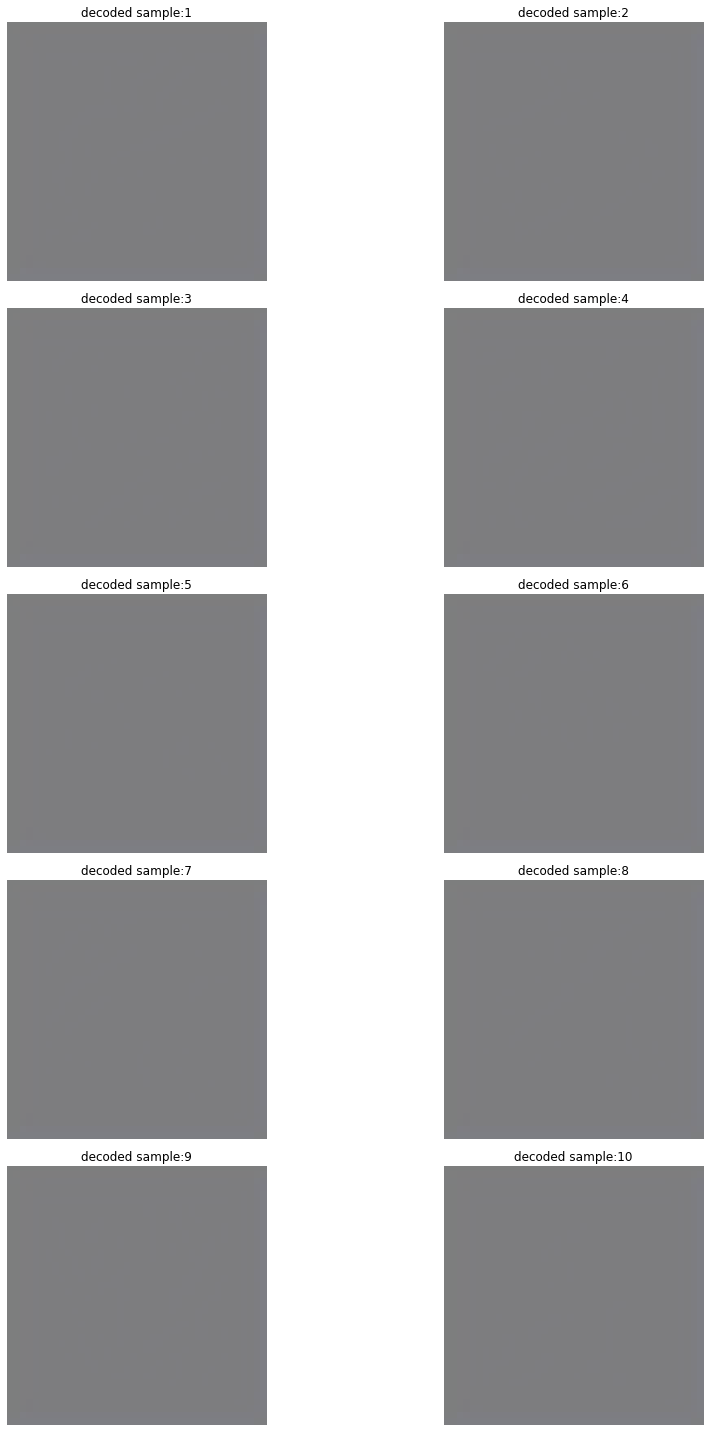

epoch: 1/10
batch: 2/5
loss: 0.11241331696510315


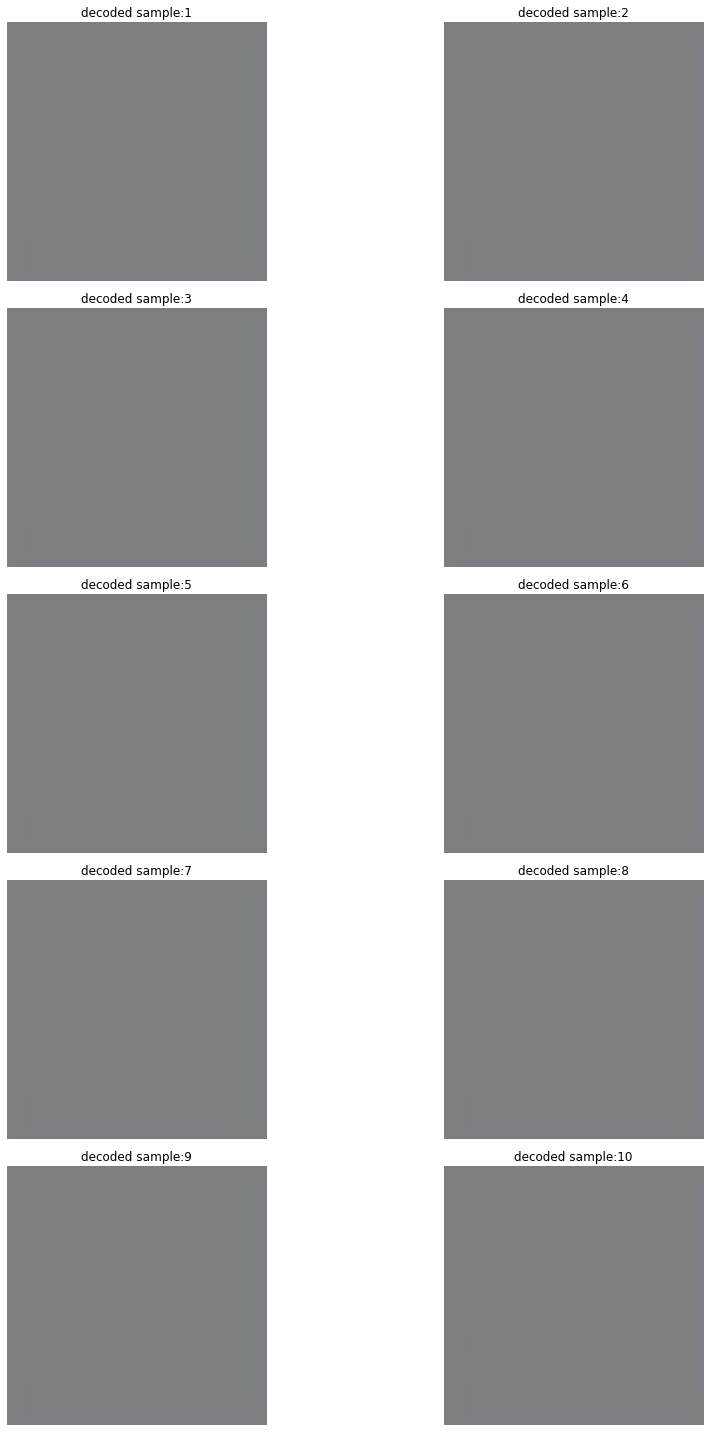

epoch: 1/10
batch: 3/5
loss: 0.08791495859622955


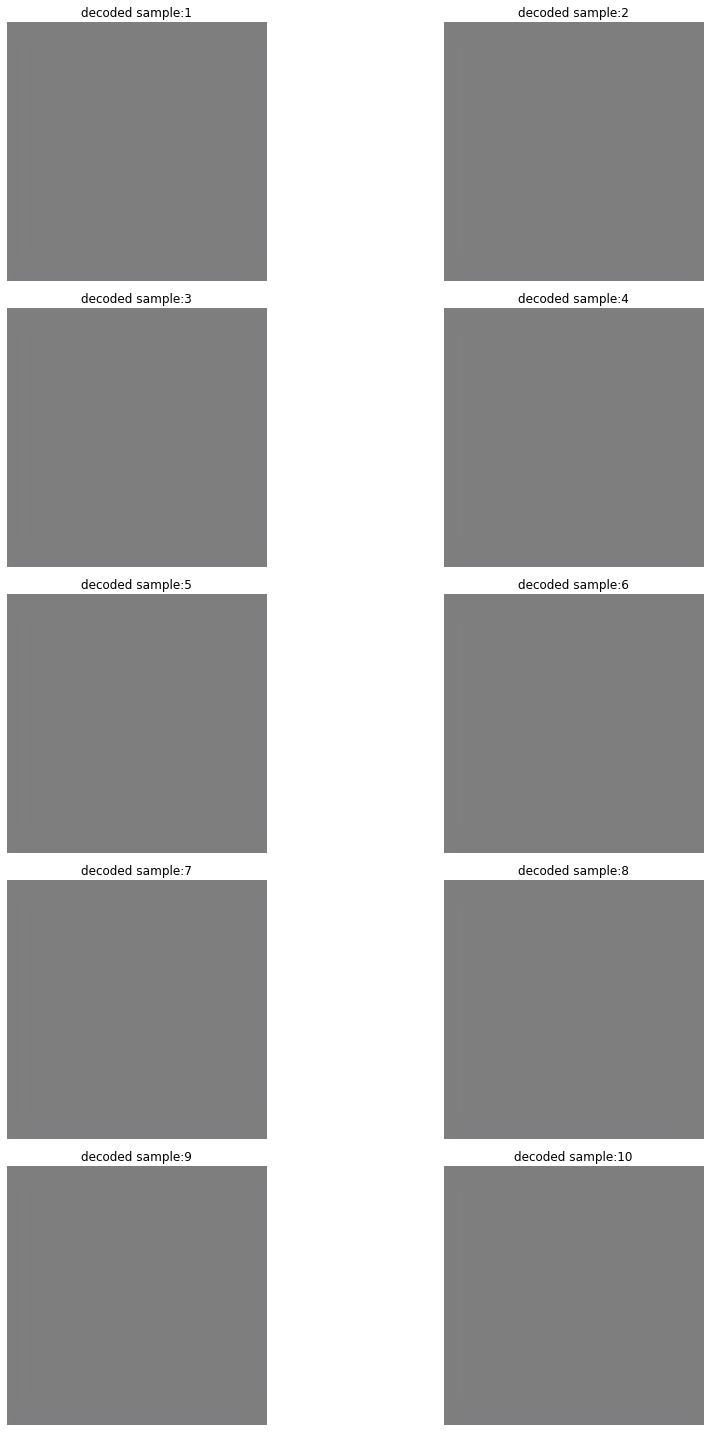

epoch: 1/10
batch: 4/5
loss: 0.0779765322804451


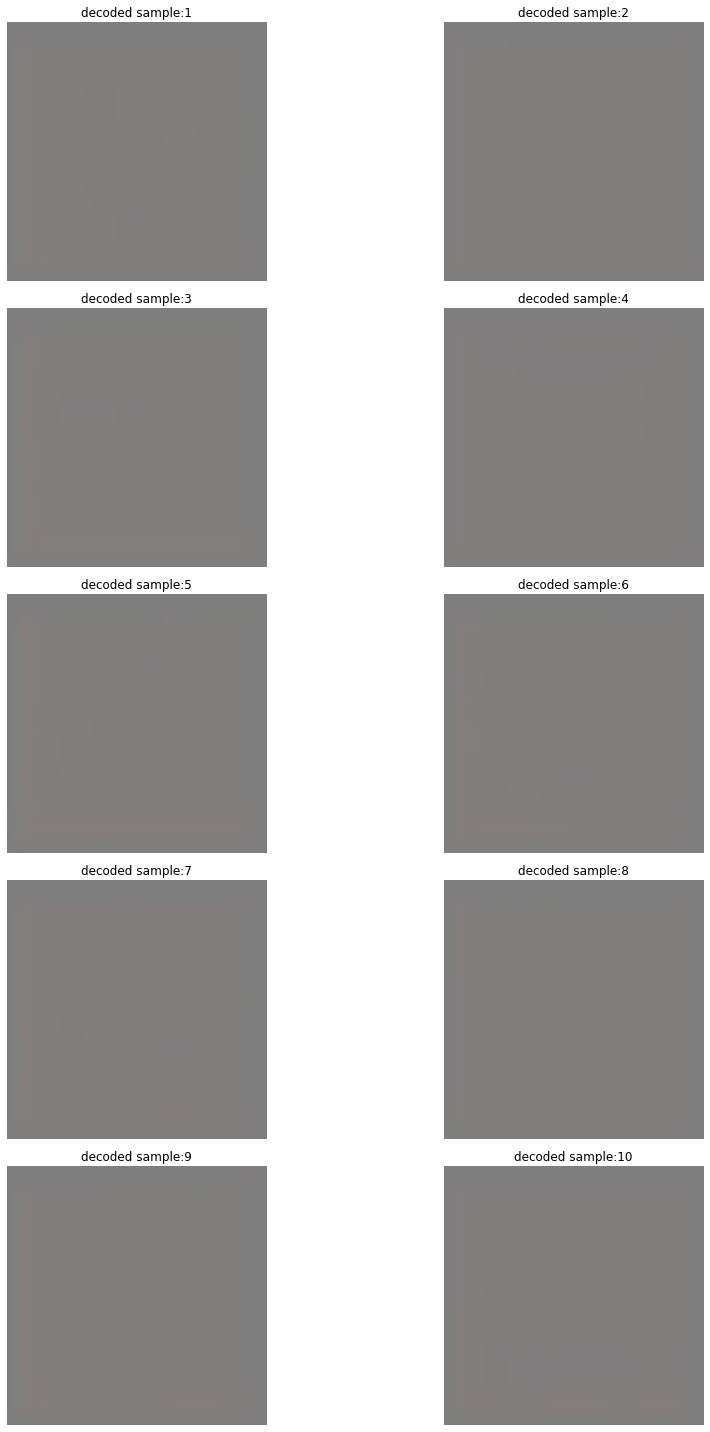

epoch: 1/10
batch: 5/5
loss: 0.08896325528621674


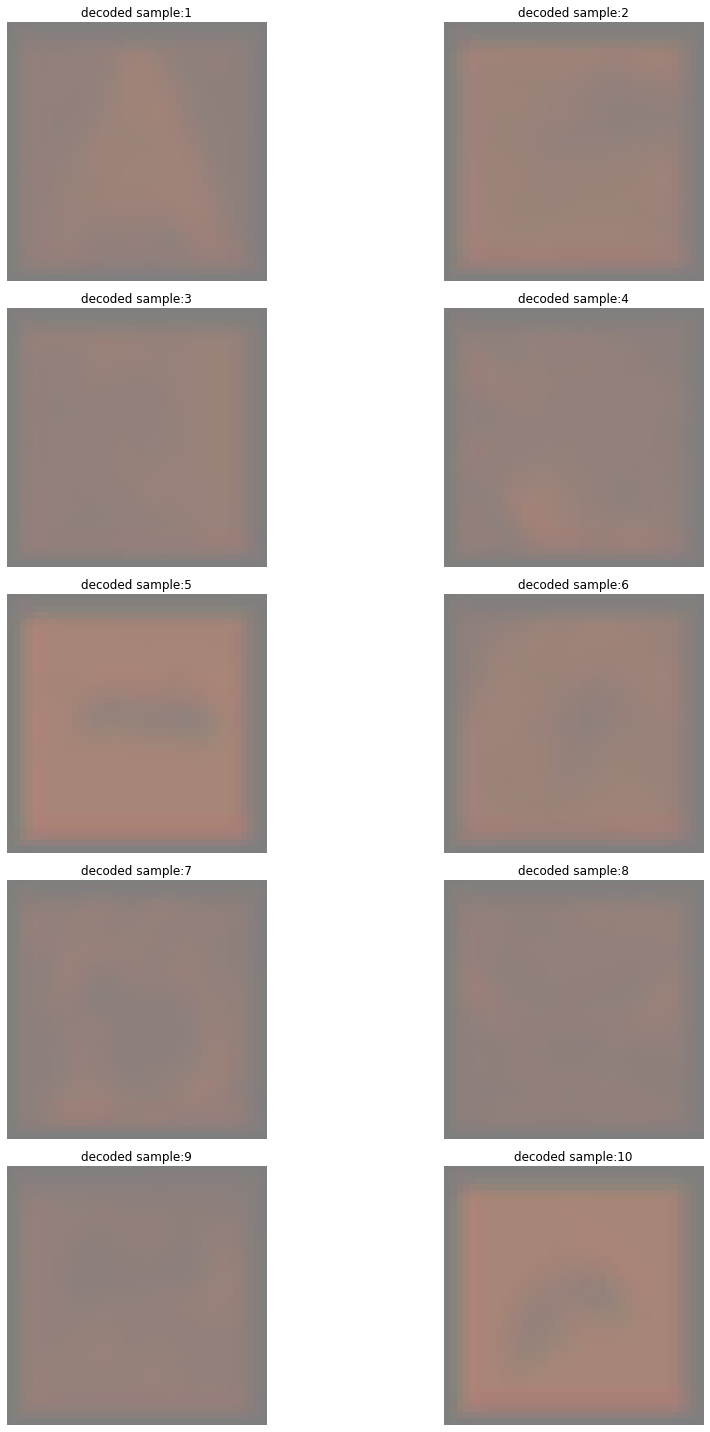

epoch: 2/10
batch: 1/5
loss: 0.09476897120475769


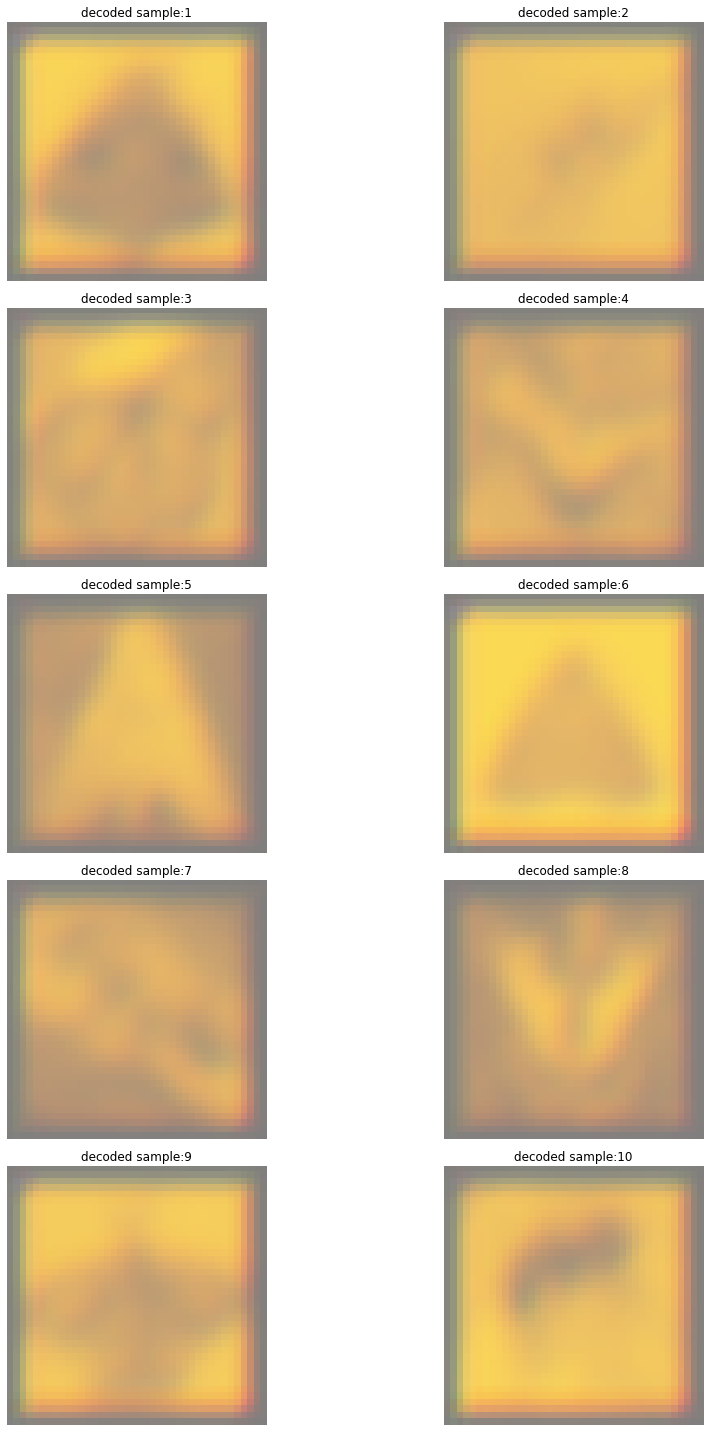

epoch: 2/10
batch: 2/5
loss: 0.11974893510341644


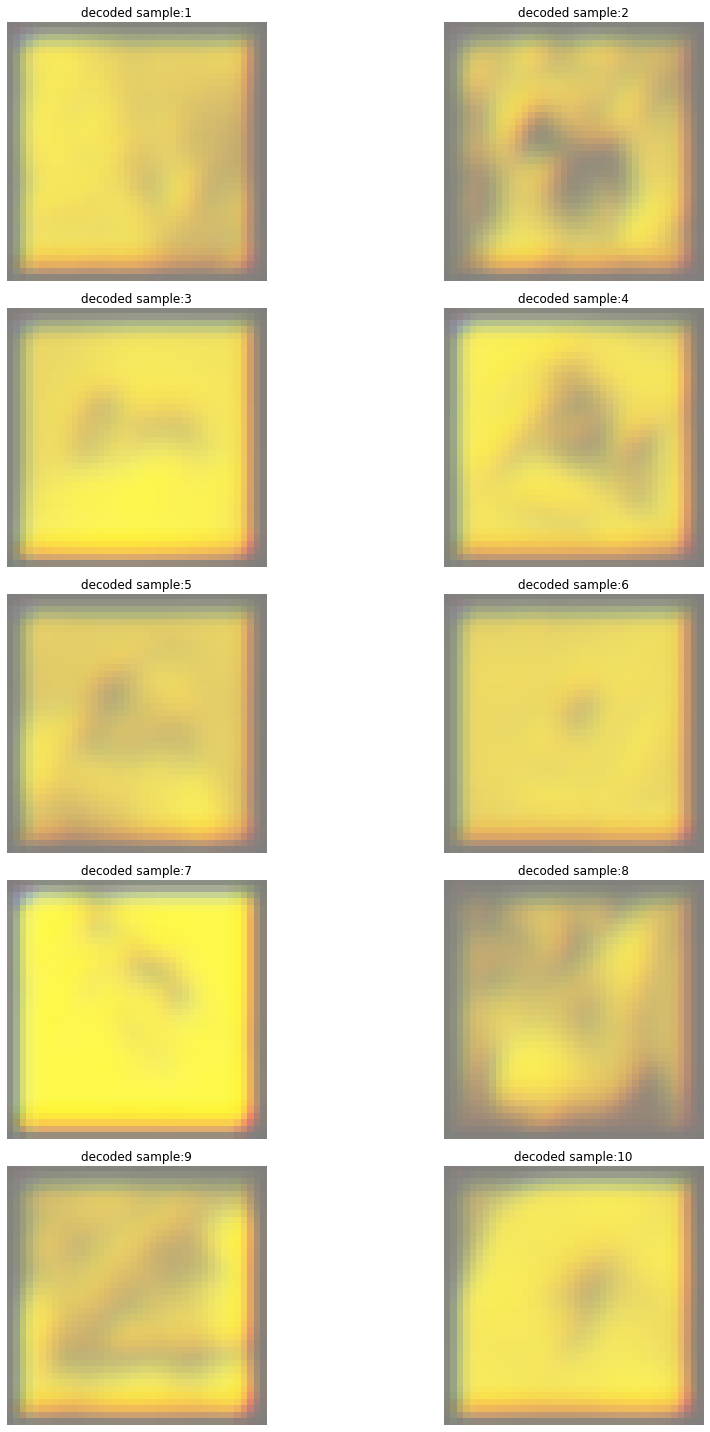

epoch: 2/10
batch: 3/5
loss: 0.09450402855873108


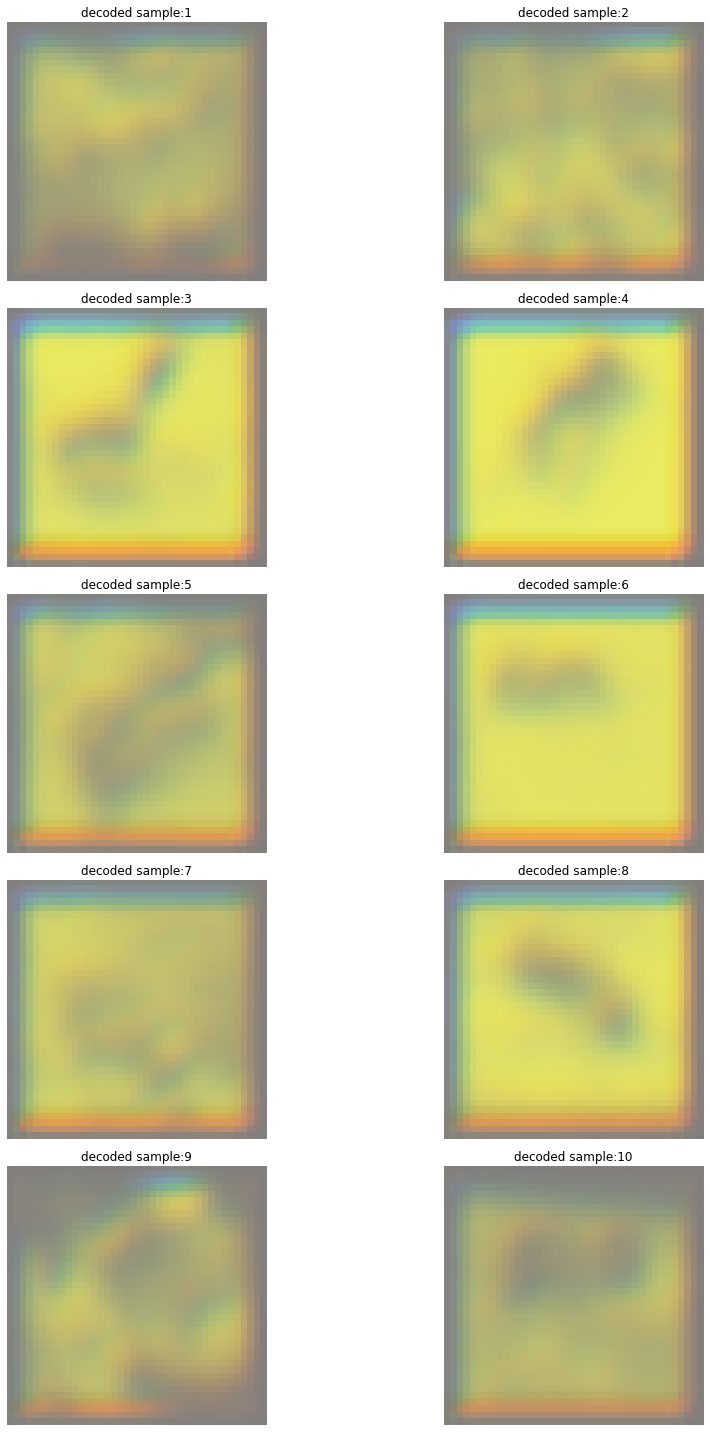

epoch: 2/10
batch: 4/5
loss: 0.11256829649209976


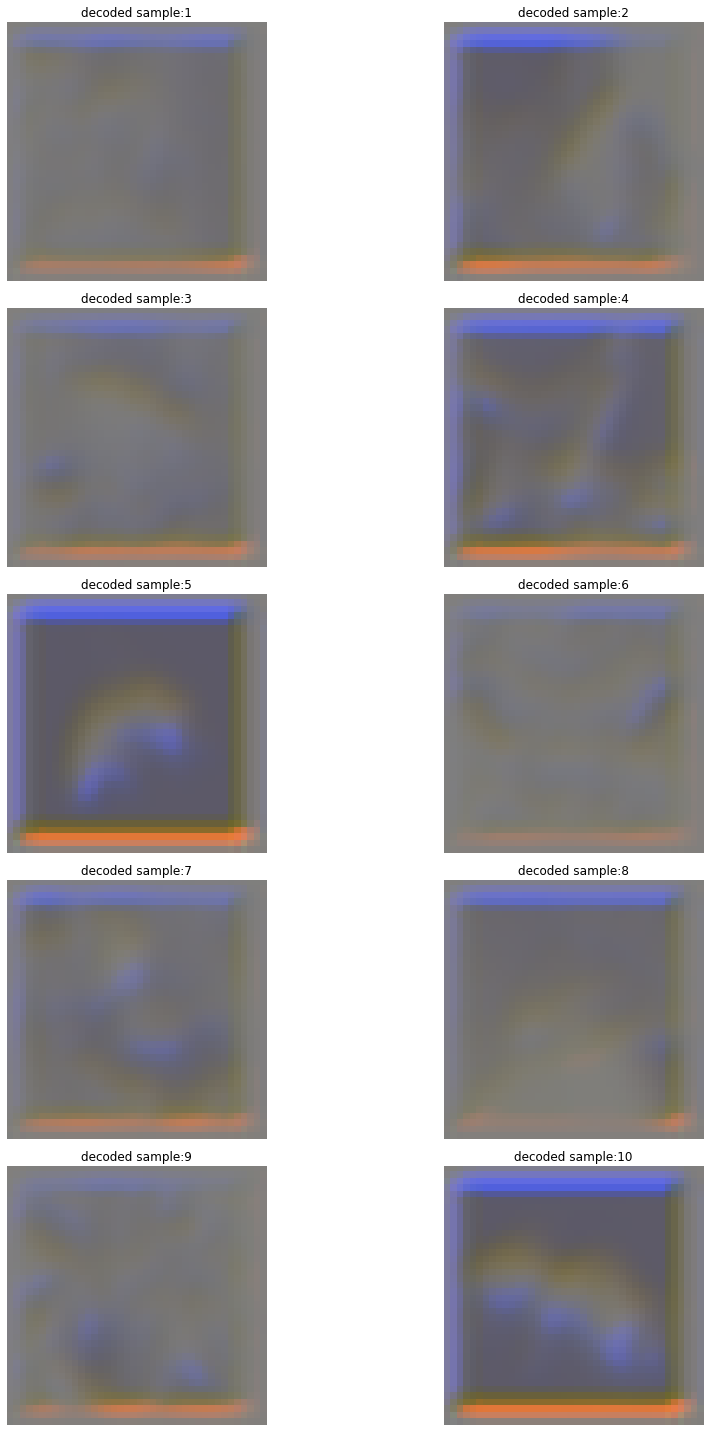

epoch: 2/10
batch: 5/5
loss: 0.12747210264205933


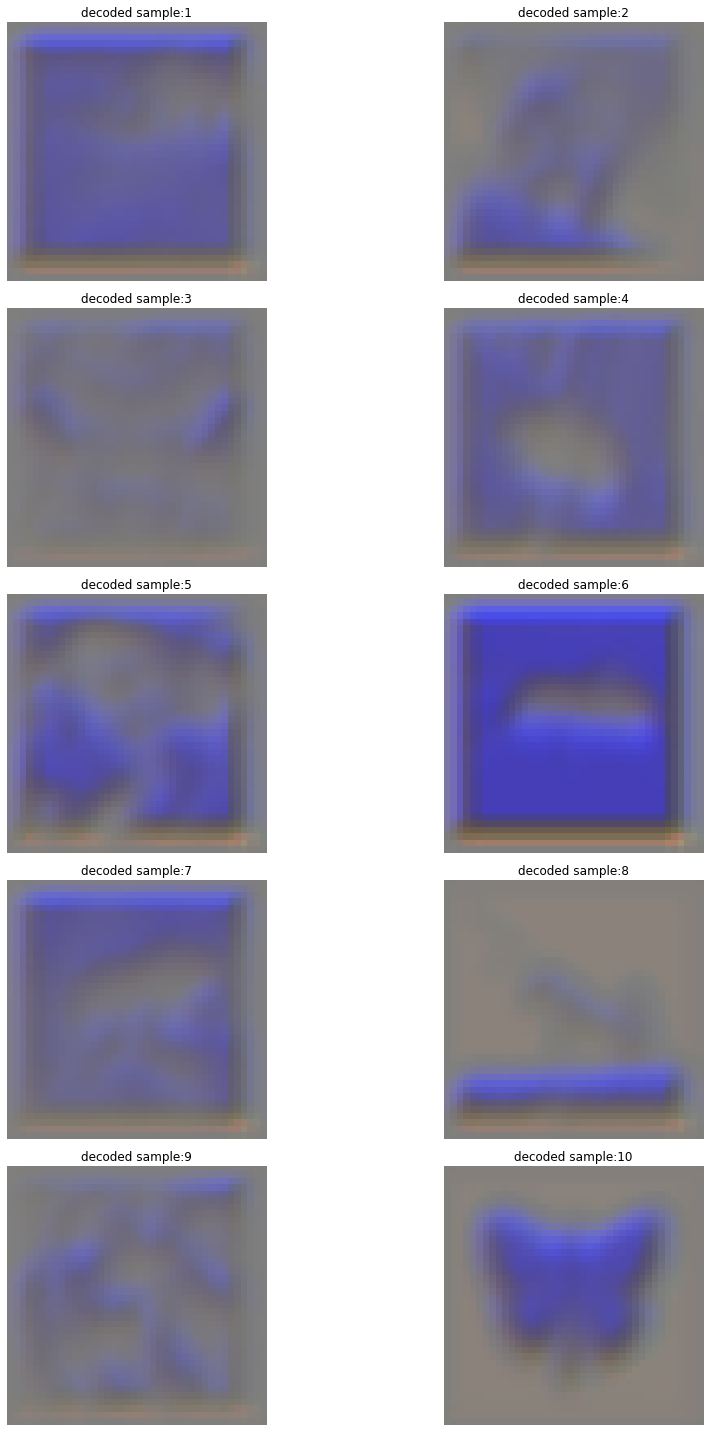

epoch: 3/10
batch: 1/5
loss: 0.11873044073581696


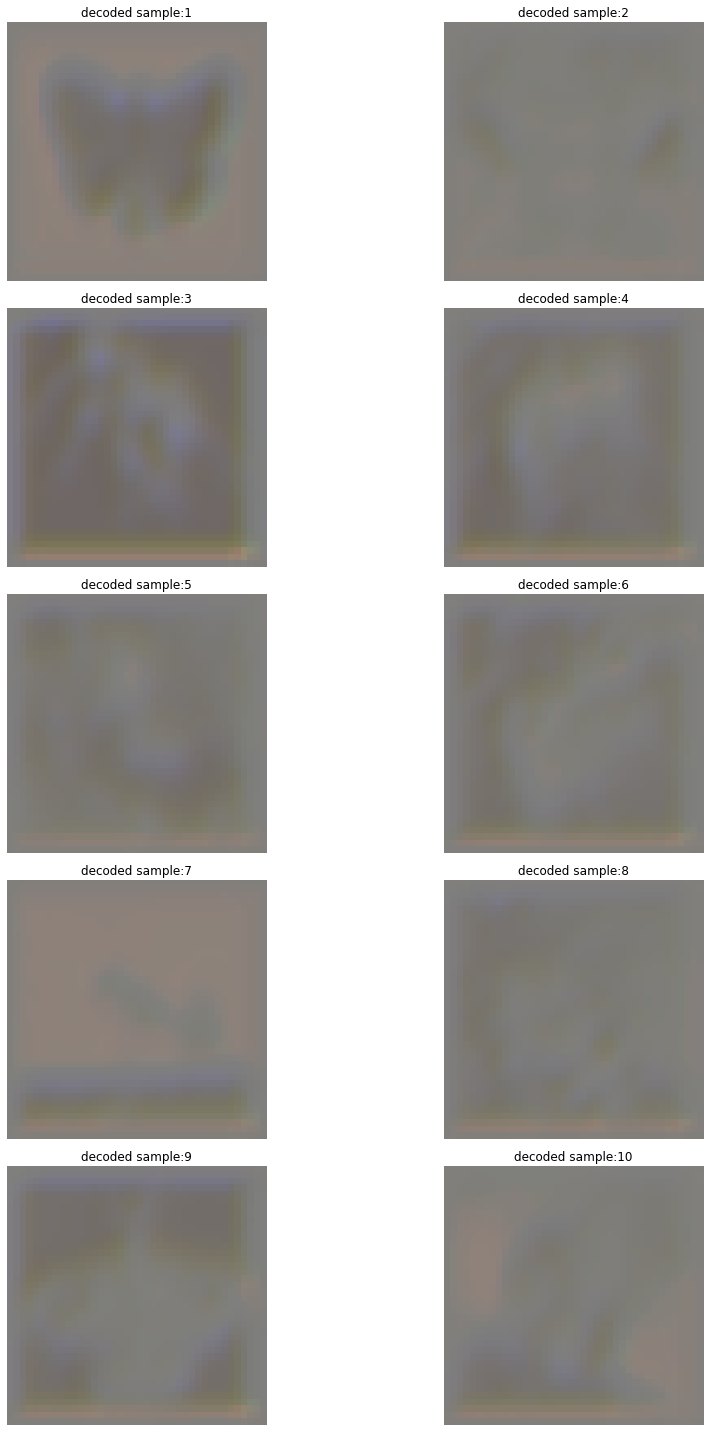

epoch: 3/10
batch: 2/5
loss: 0.081141896545887


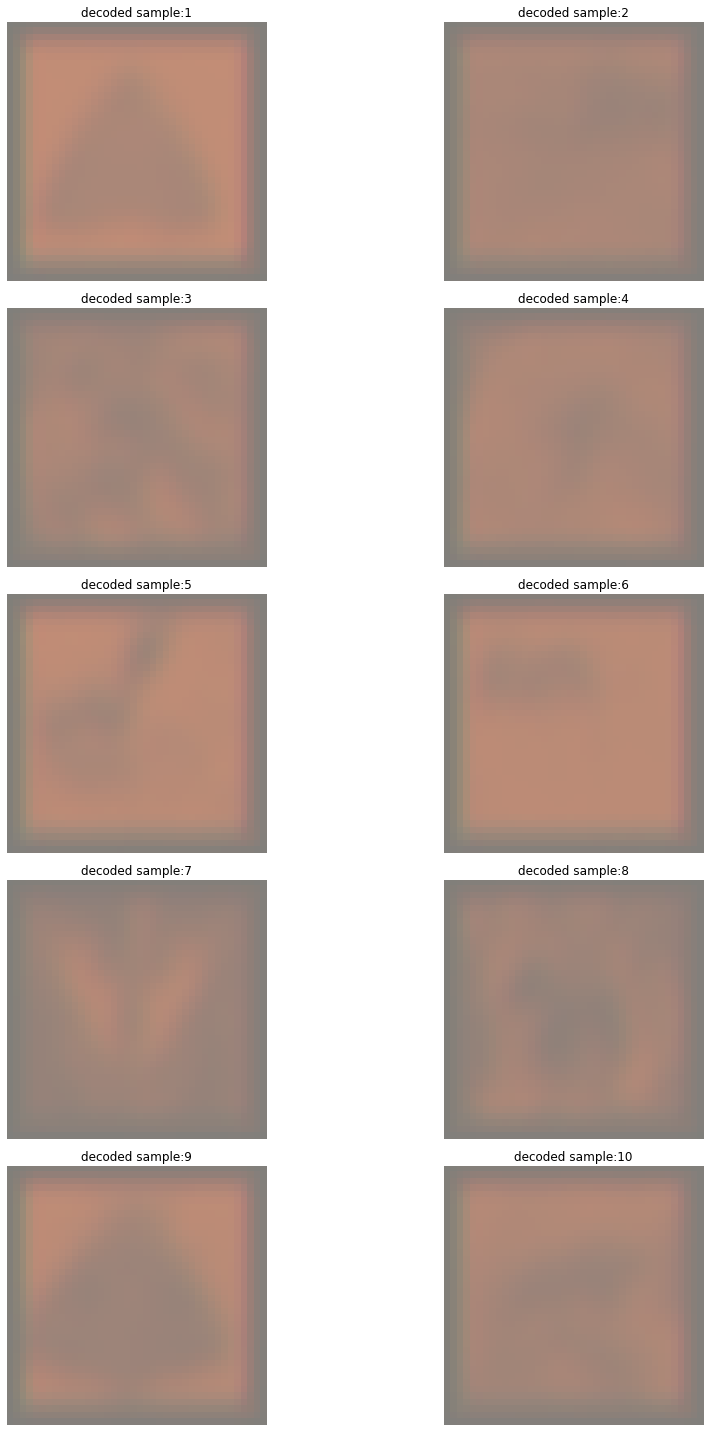

epoch: 3/10
batch: 3/5
loss: 0.08144655078649521


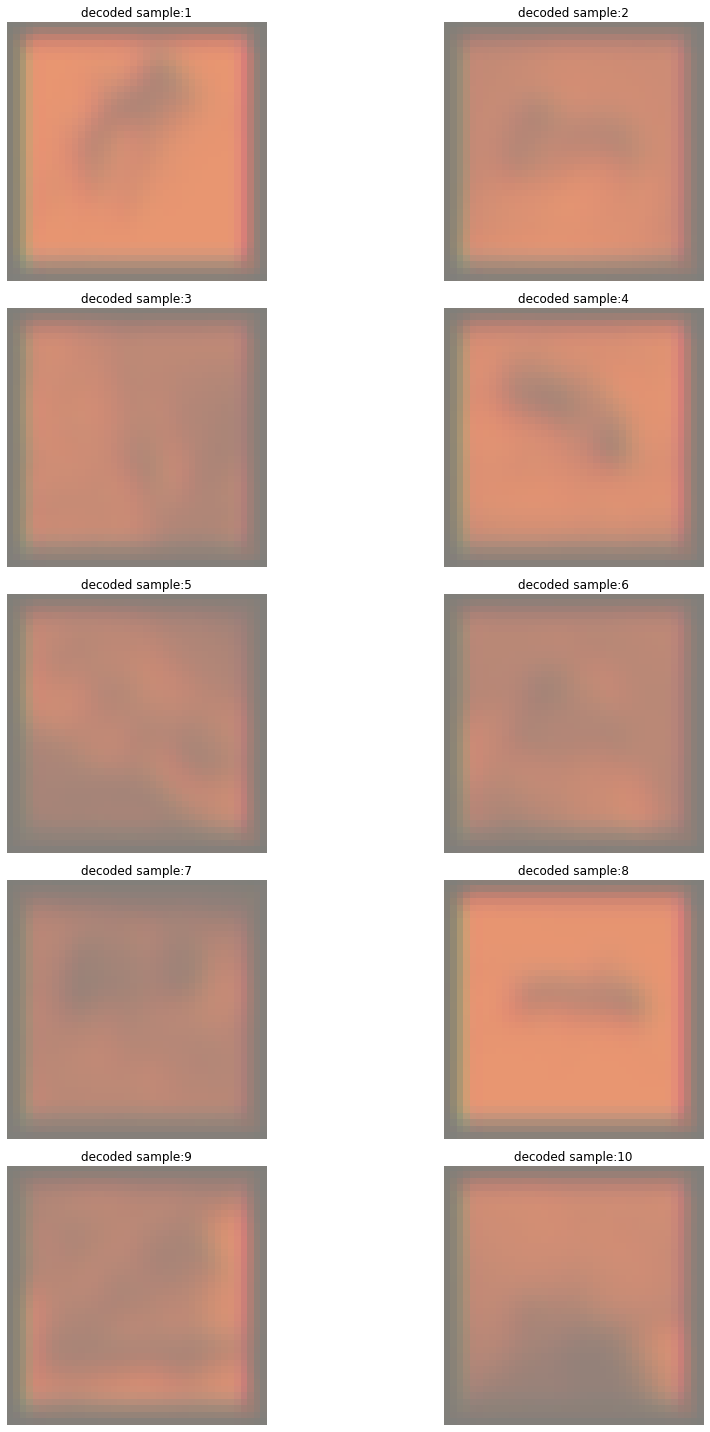

epoch: 3/10
batch: 4/5
loss: 0.09012897312641144


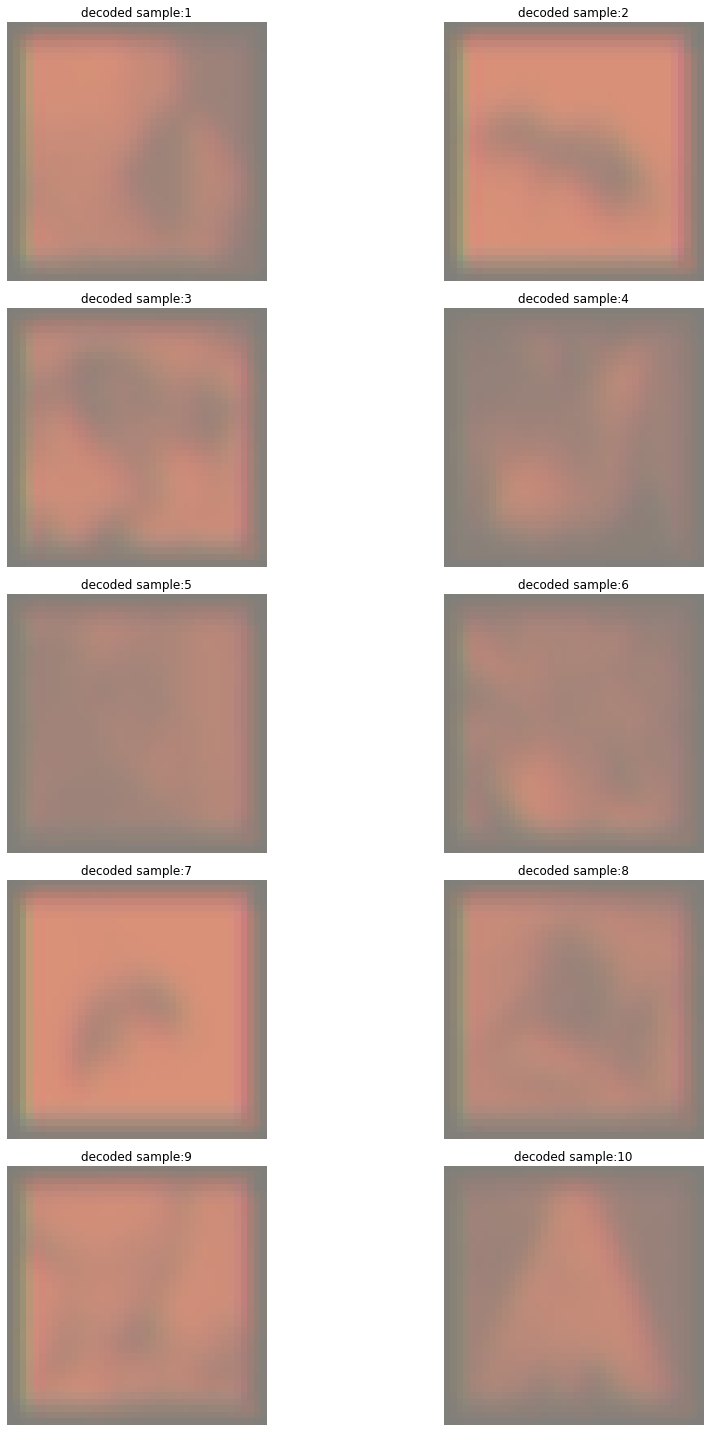

epoch: 3/10
batch: 5/5
loss: 0.061189115047454834


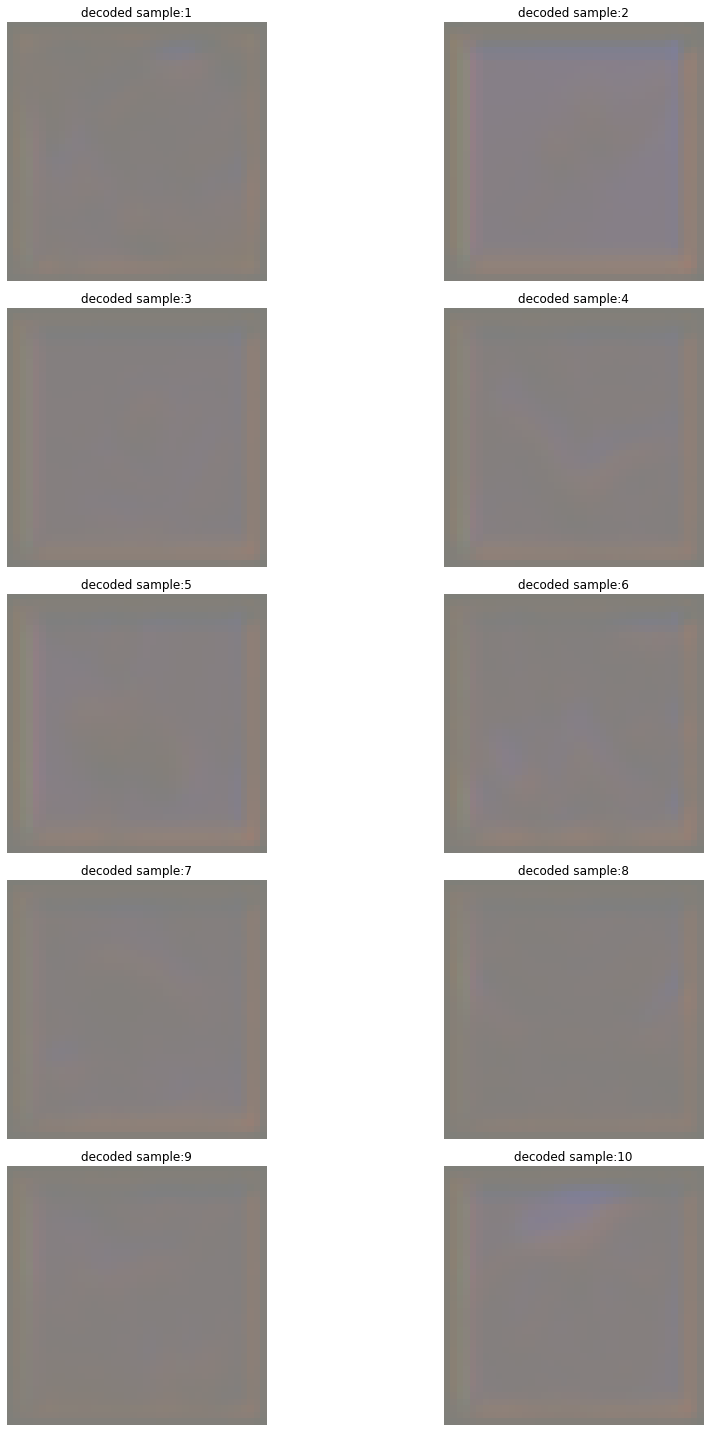

epoch: 4/10
batch: 1/5
loss: 0.11999412626028061


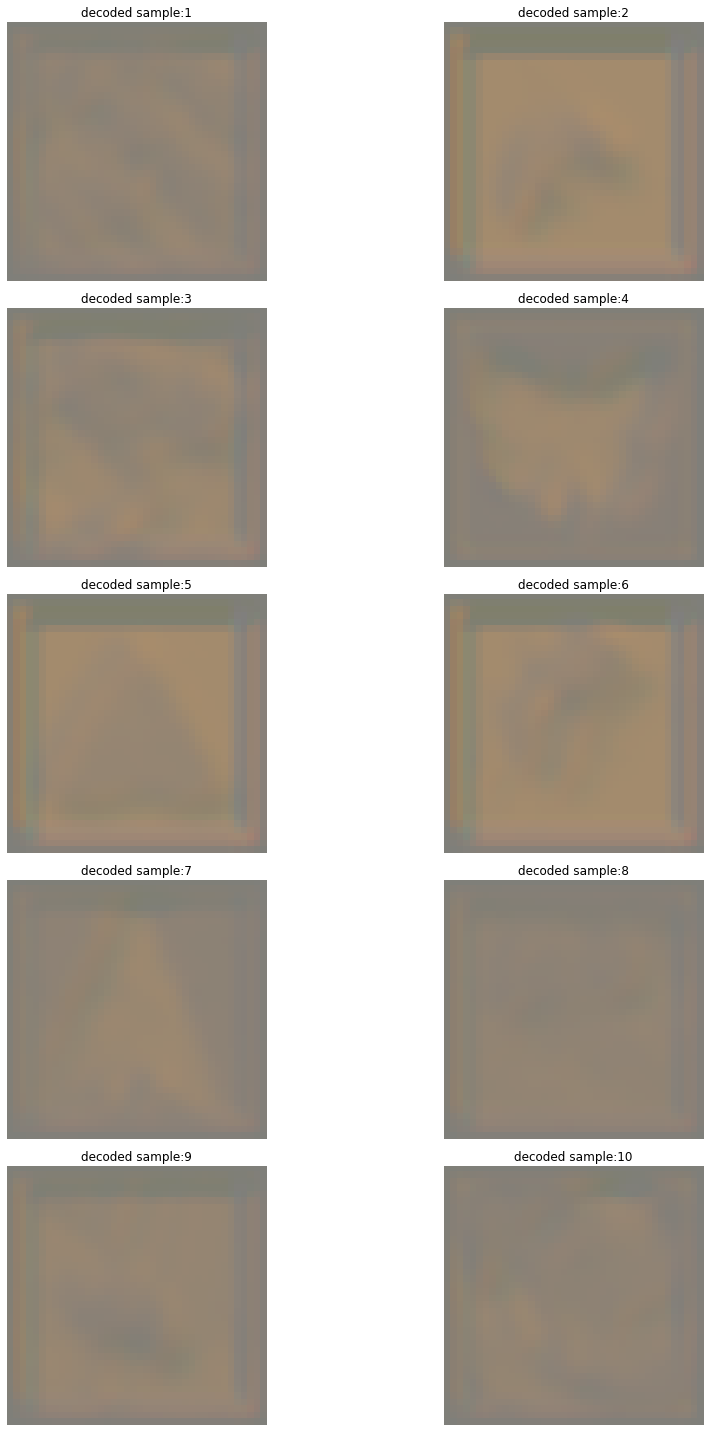

epoch: 4/10
batch: 2/5
loss: 0.07904744148254395


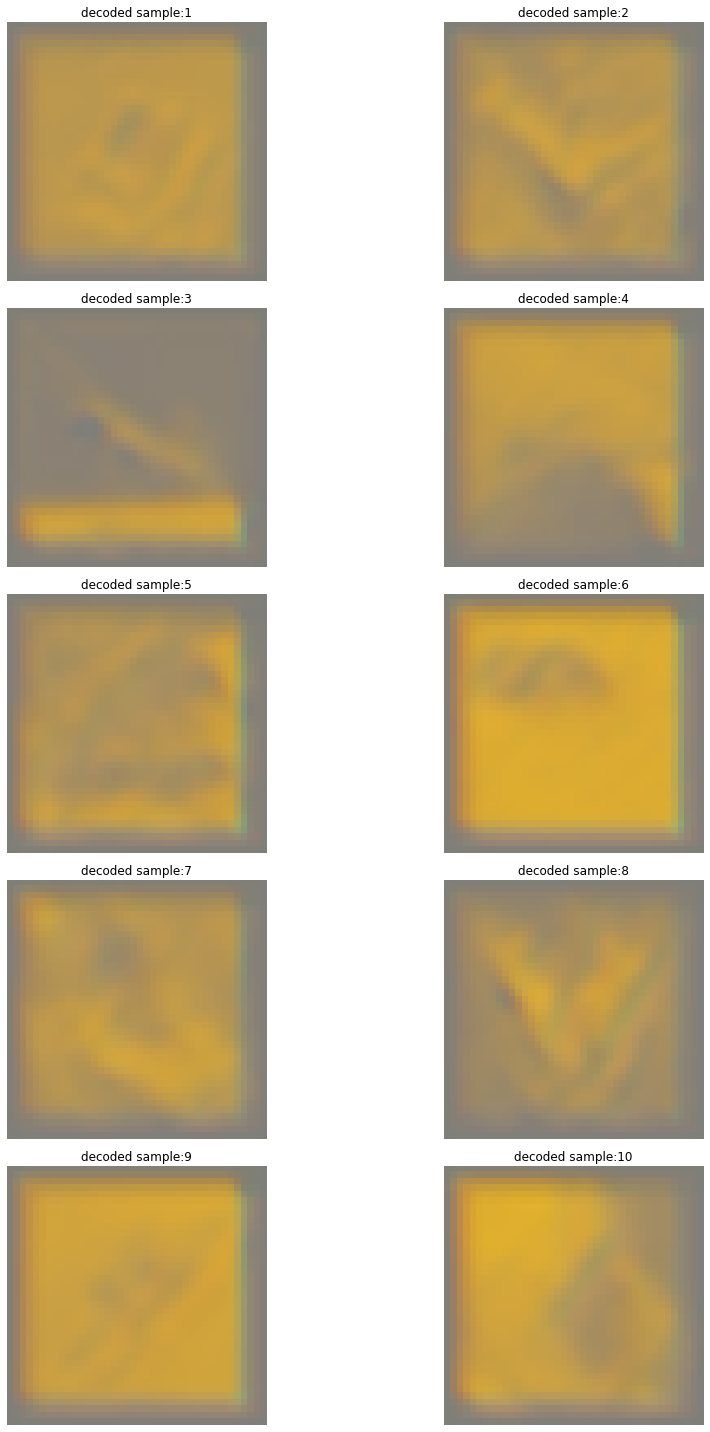

epoch: 4/10
batch: 3/5
loss: 0.10312068462371826


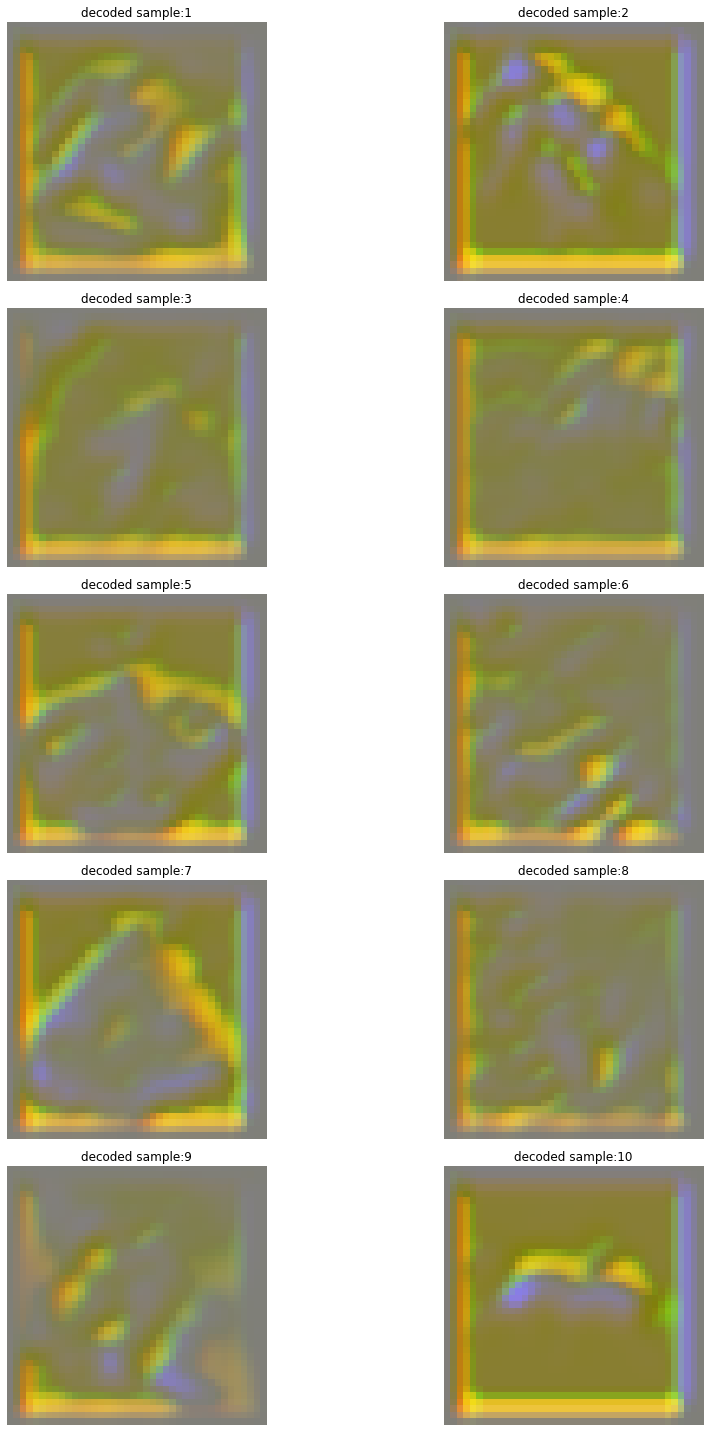

epoch: 4/10
batch: 4/5
loss: 0.11167661845684052


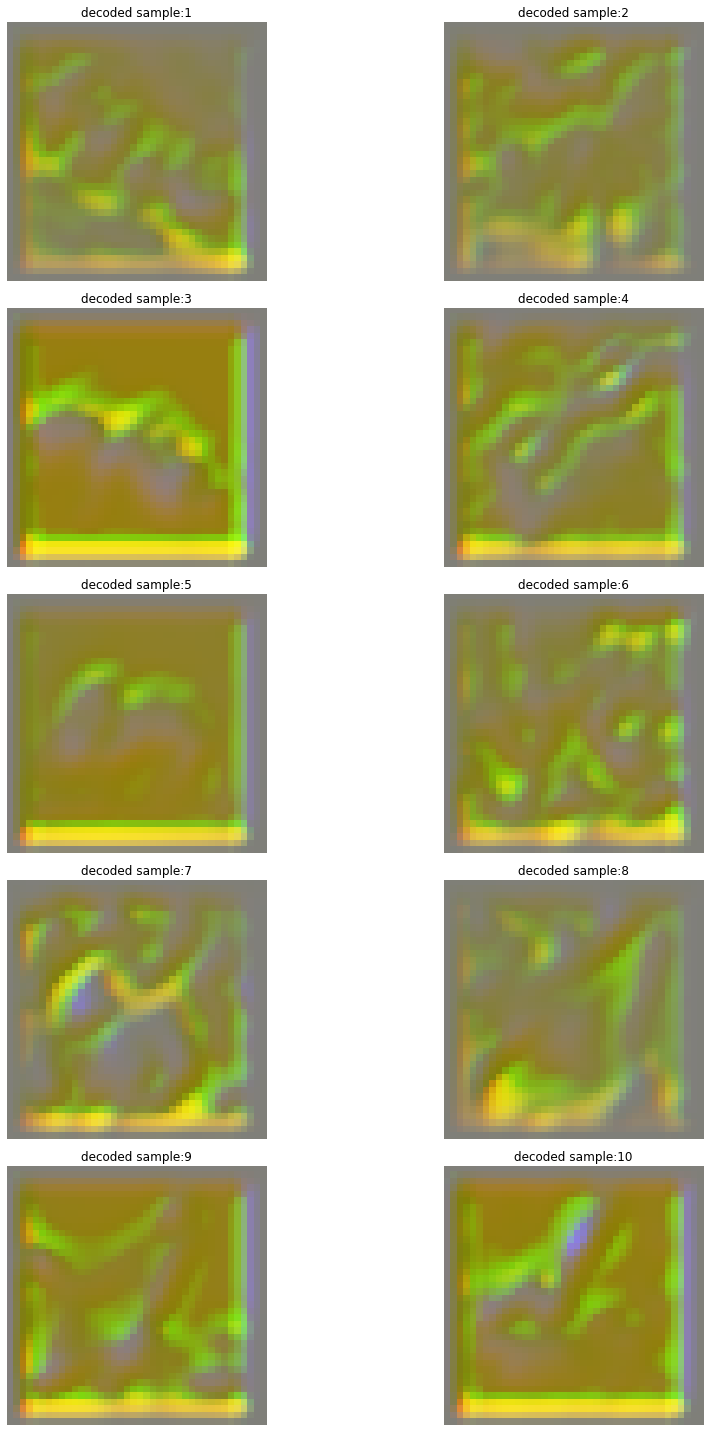

epoch: 4/10
batch: 5/5
loss: 0.12101058661937714


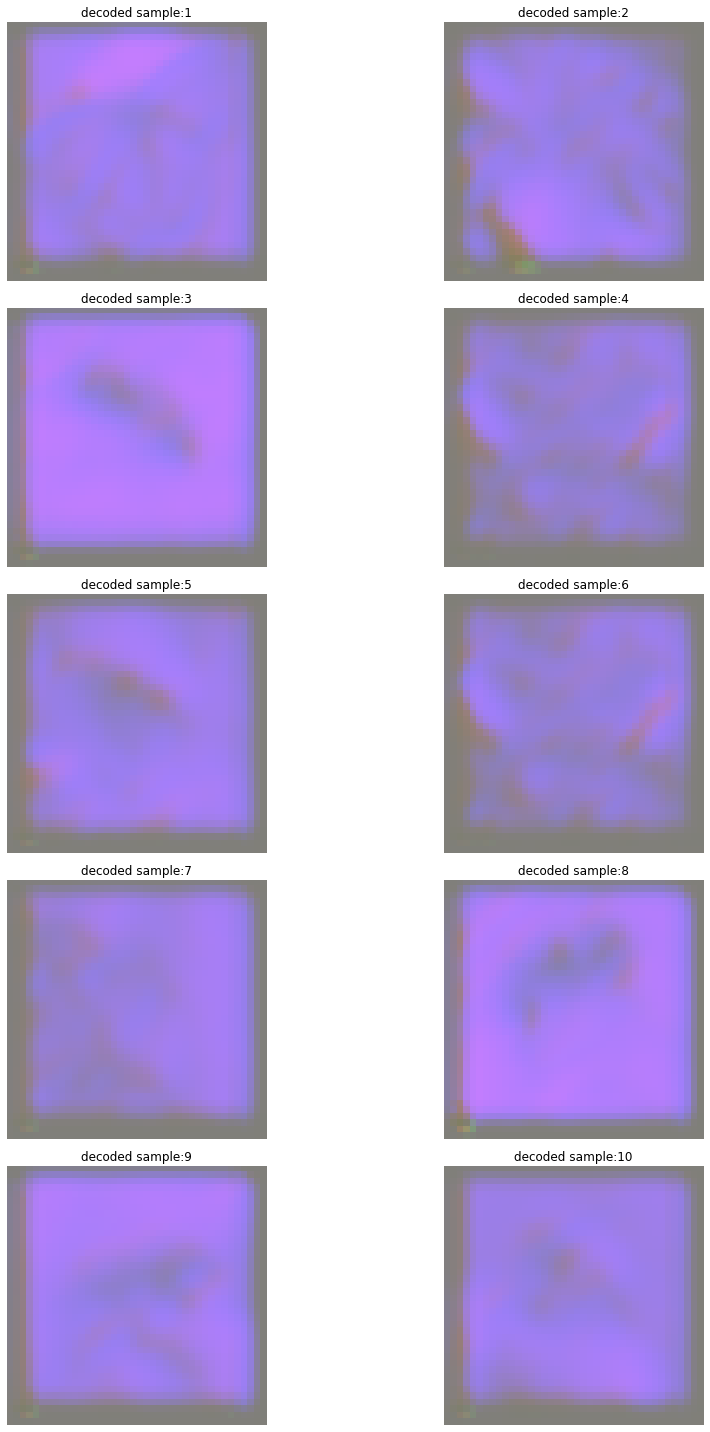

epoch: 5/10
batch: 1/5
loss: 0.11442720144987106


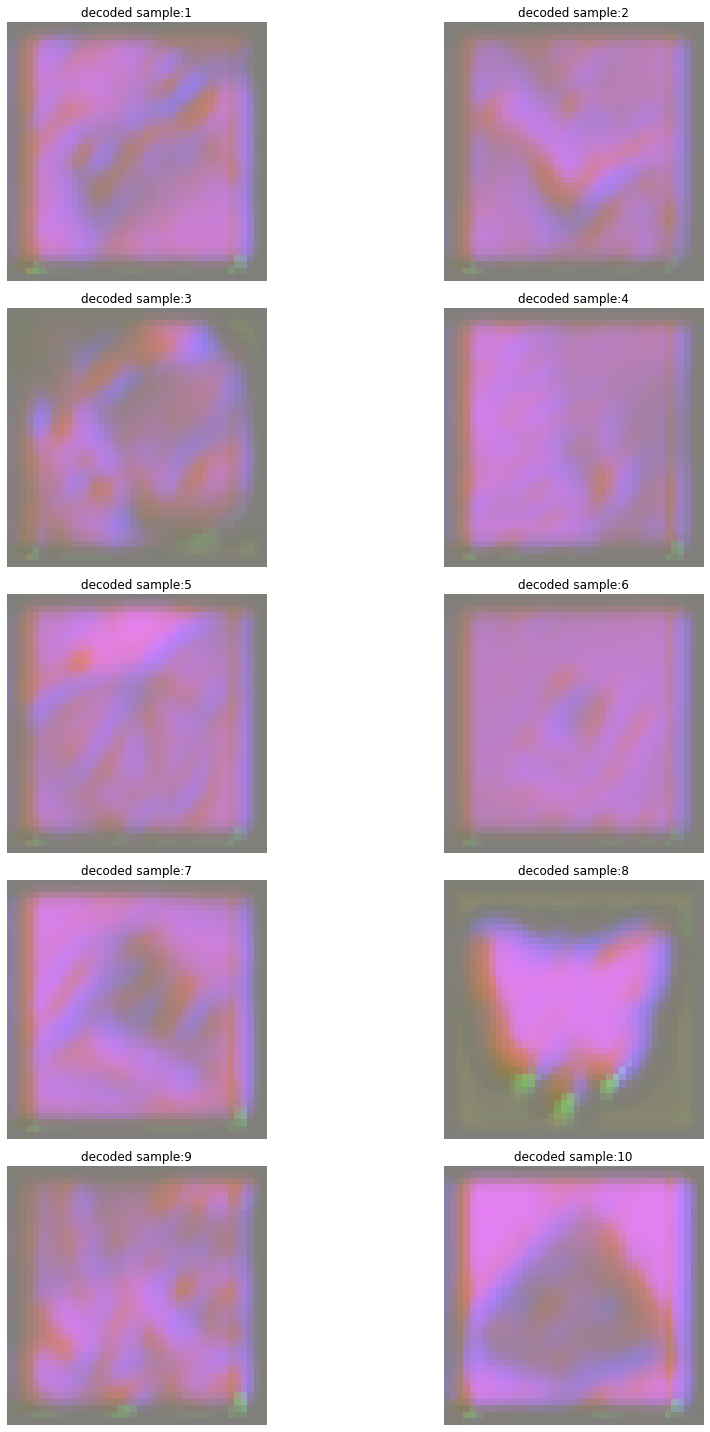

epoch: 5/10
batch: 2/5
loss: 0.17673732340335846


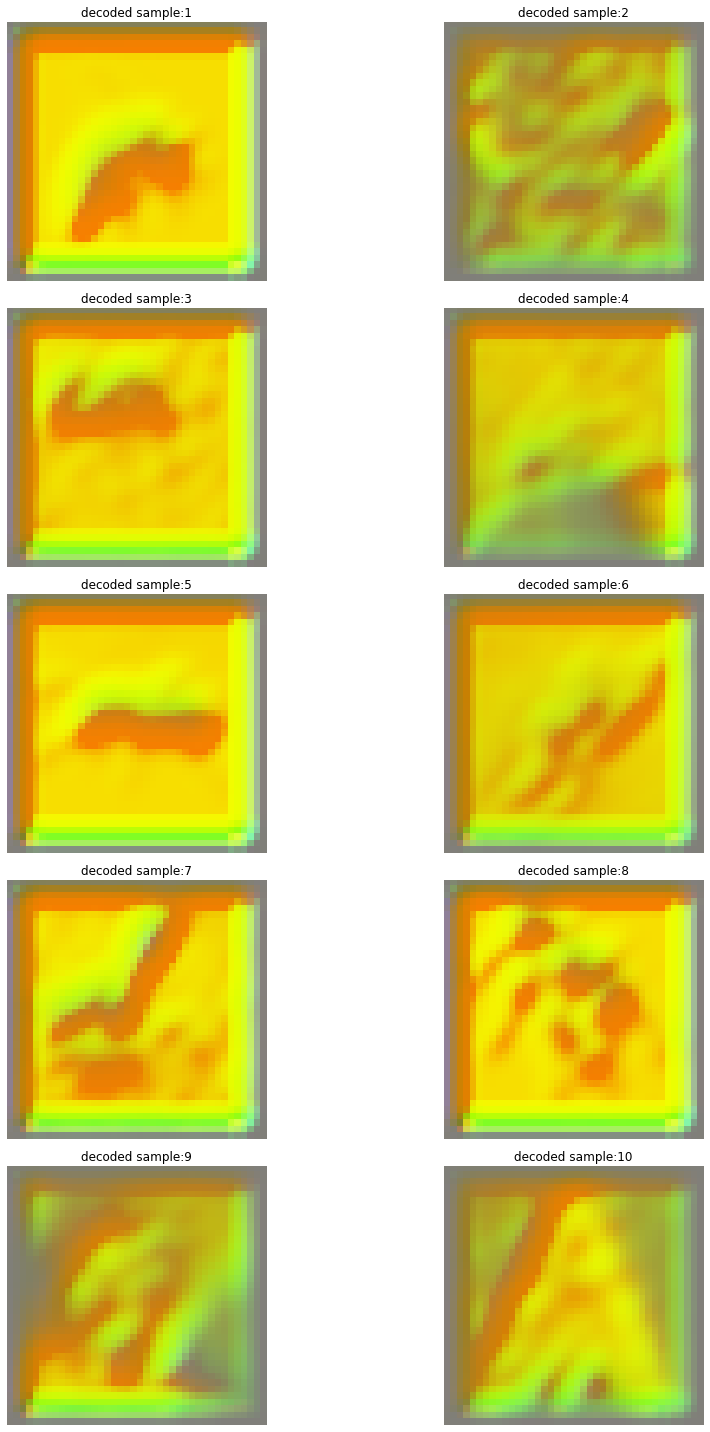

epoch: 5/10
batch: 3/5
loss: 0.1445639431476593


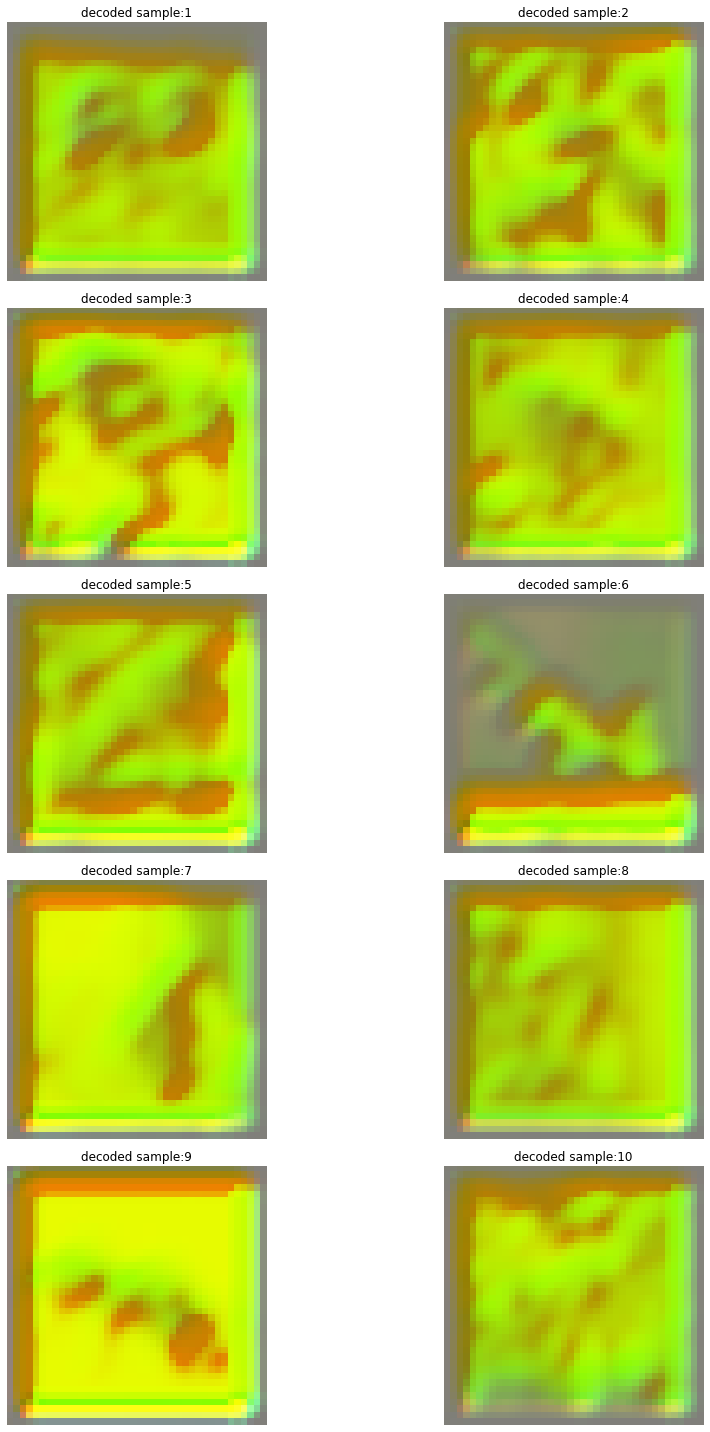

epoch: 5/10
batch: 4/5
loss: 0.13594426214694977


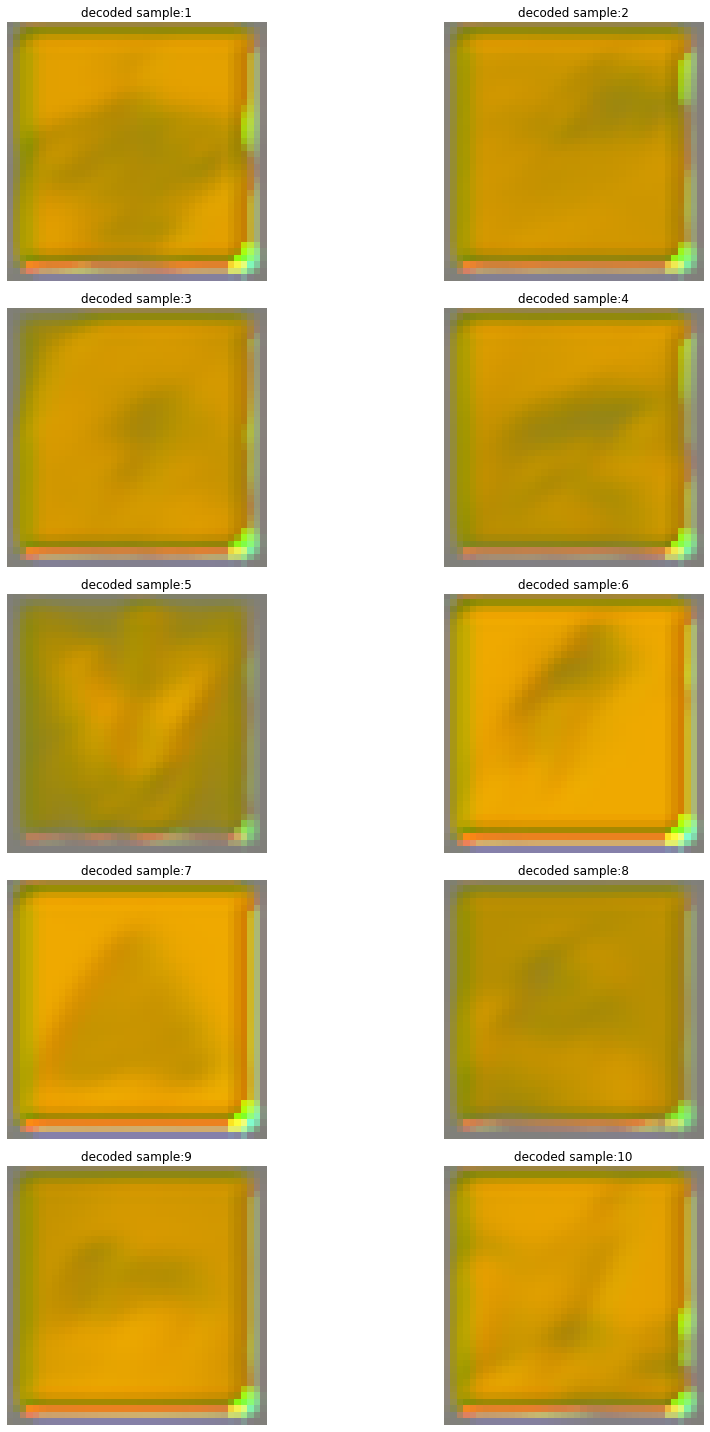

epoch: 5/10
batch: 5/5
loss: 0.09885292500257492


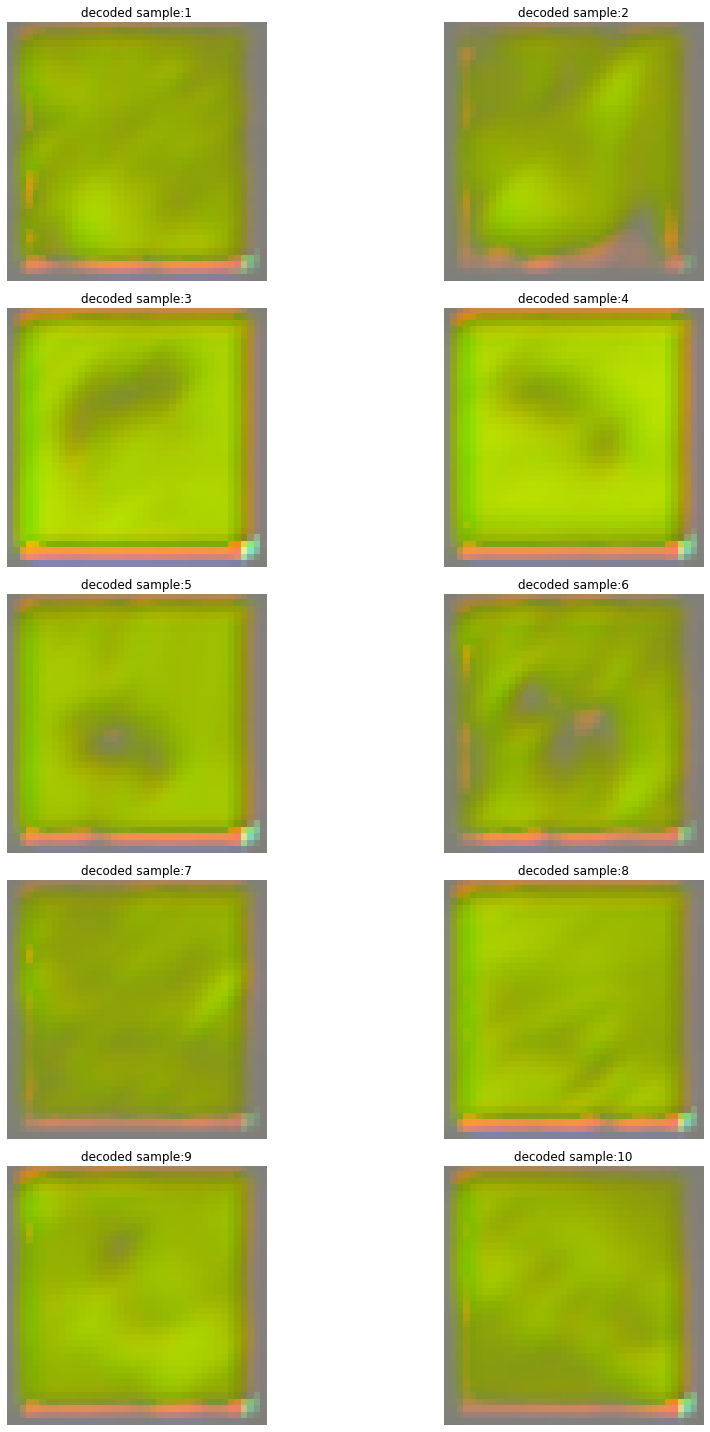

epoch: 6/10
batch: 1/5
loss: 0.17958186566829681


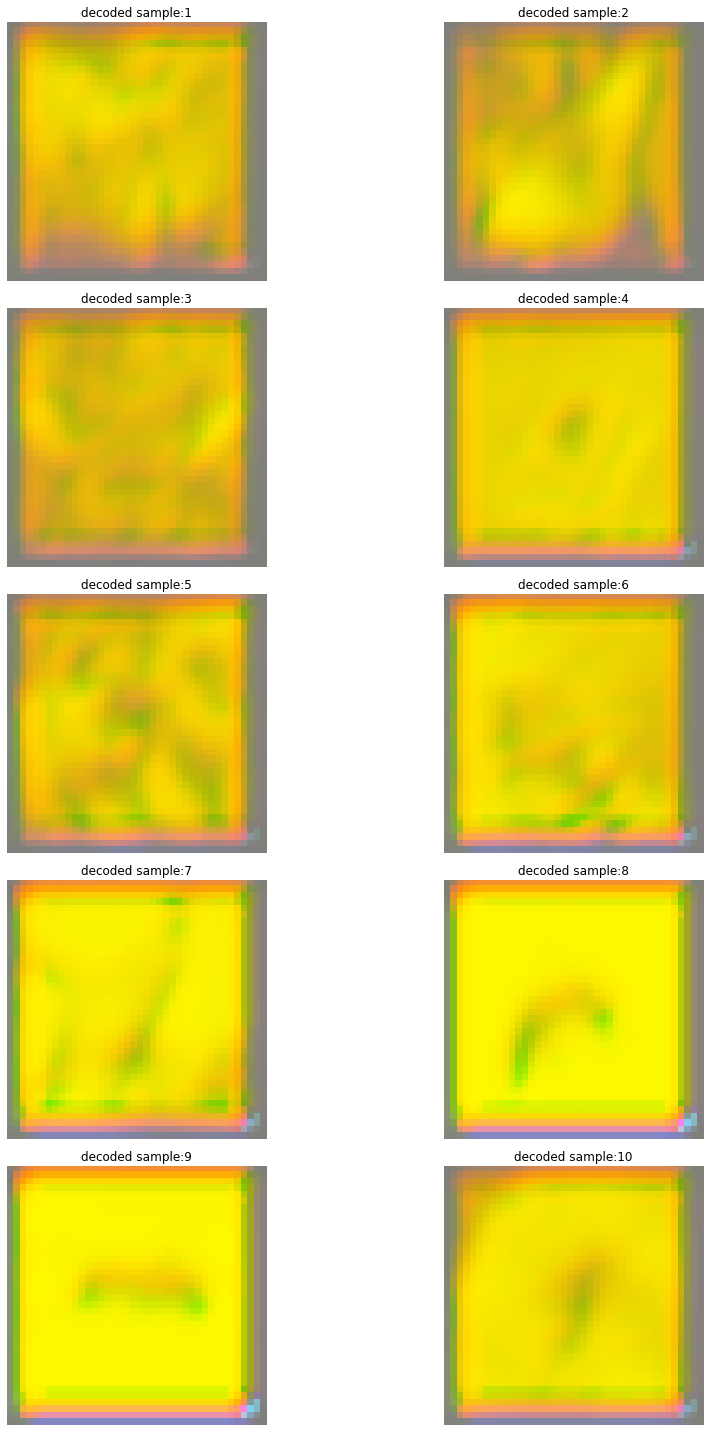

epoch: 6/10
batch: 2/5
loss: 0.14220687747001648


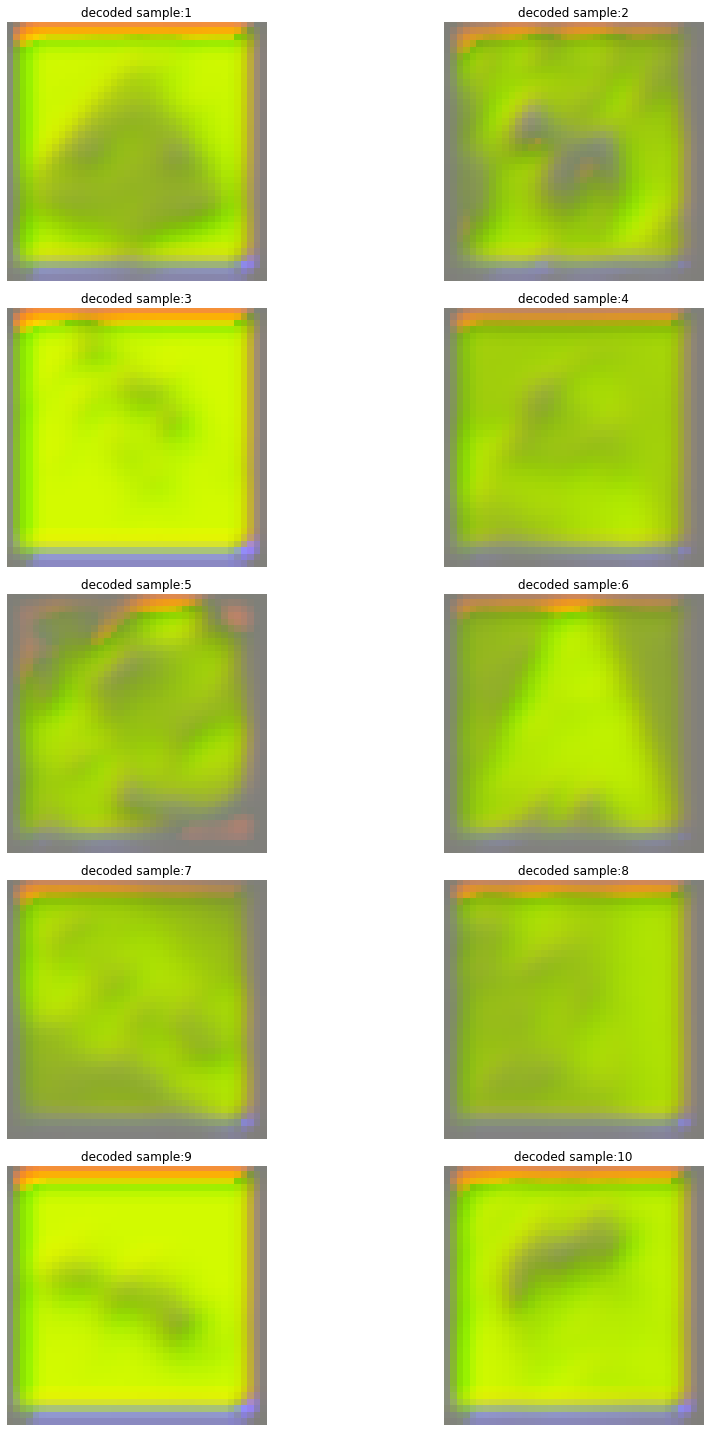

epoch: 6/10
batch: 3/5
loss: 0.11662999540567398


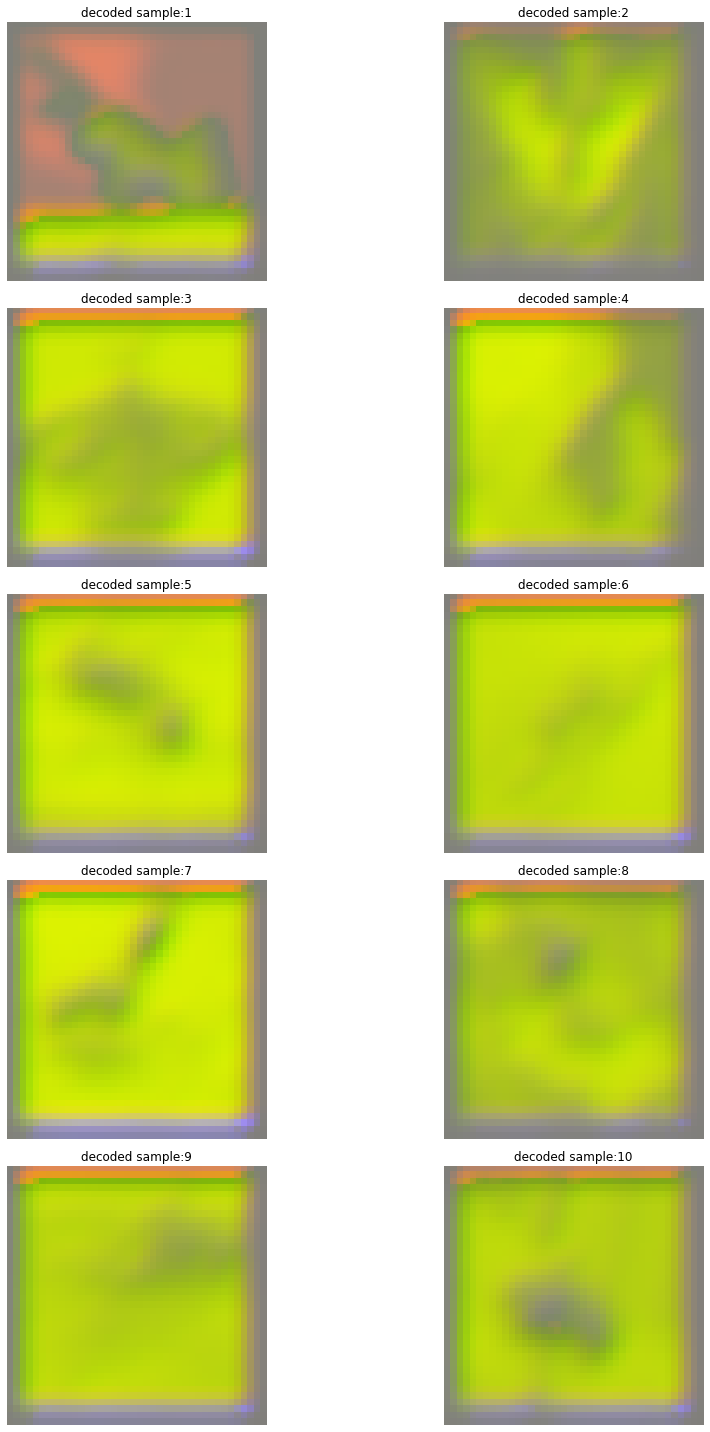

epoch: 6/10
batch: 4/5
loss: 0.11039348691701889


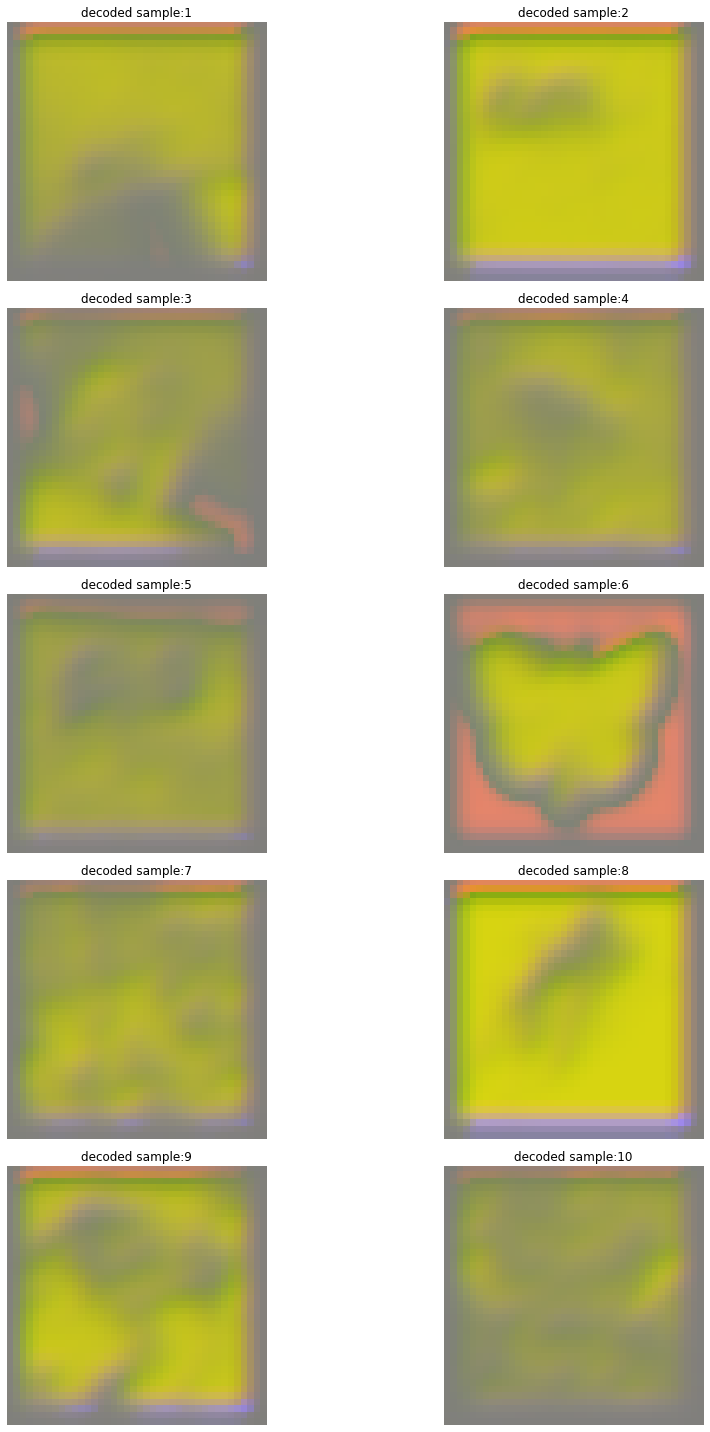

epoch: 6/10
batch: 5/5
loss: 0.057316821068525314


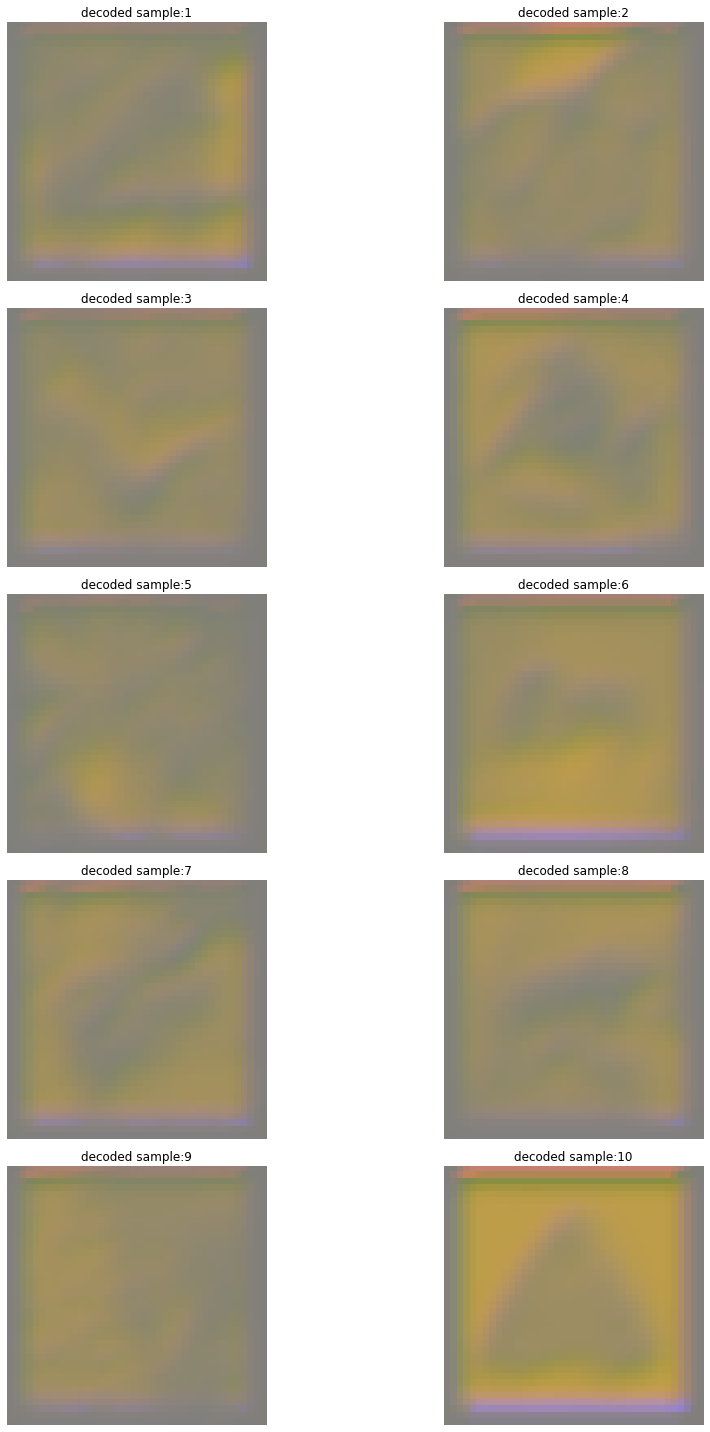

epoch: 7/10
batch: 1/5
loss: 0.08050160855054855


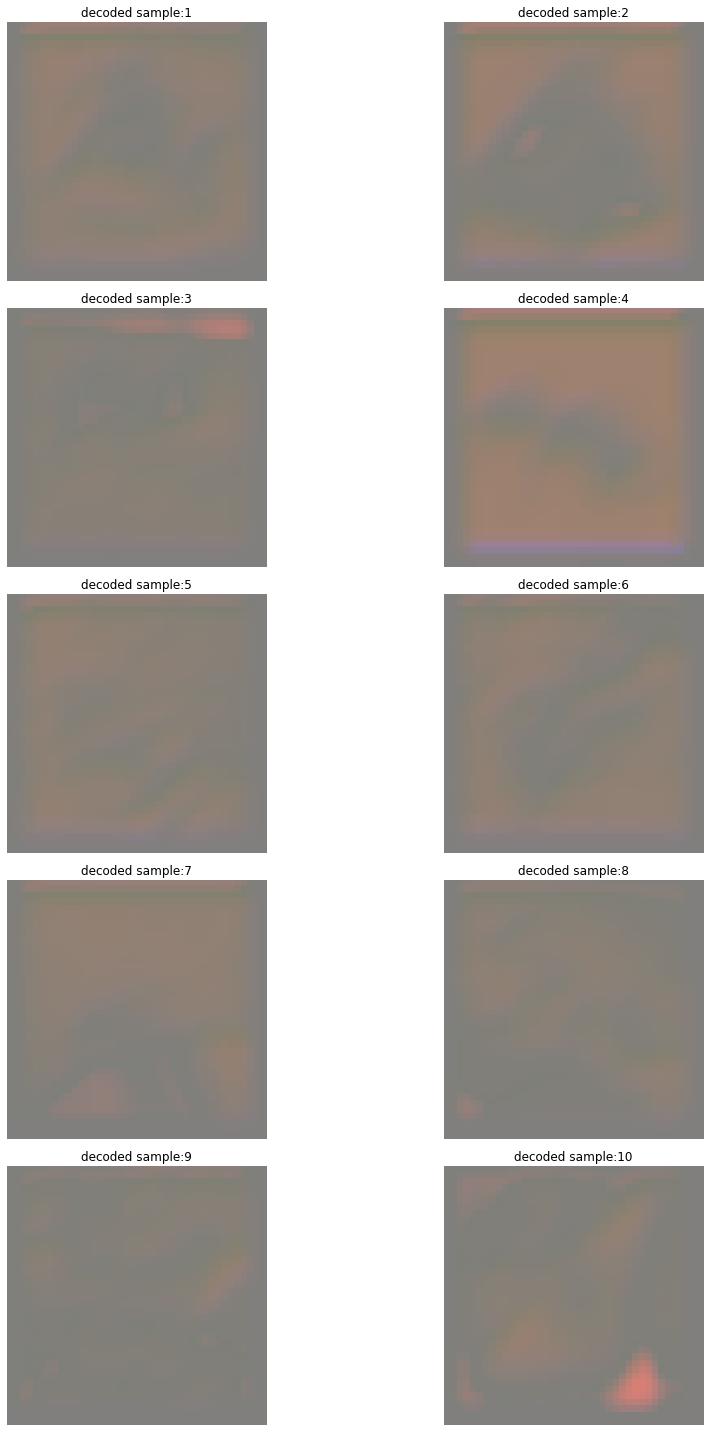

epoch: 7/10
batch: 2/5
loss: 0.07682634890079498


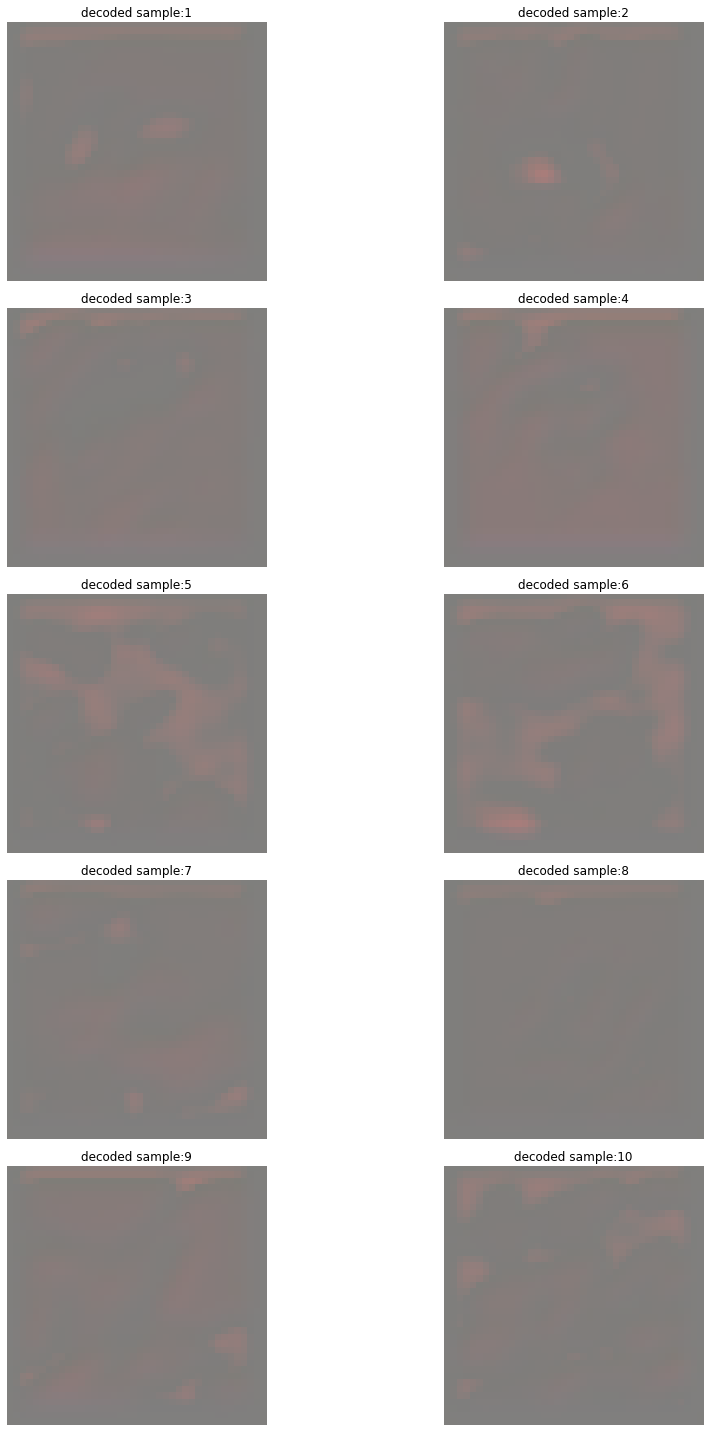

epoch: 7/10
batch: 3/5
loss: 0.10957677662372589


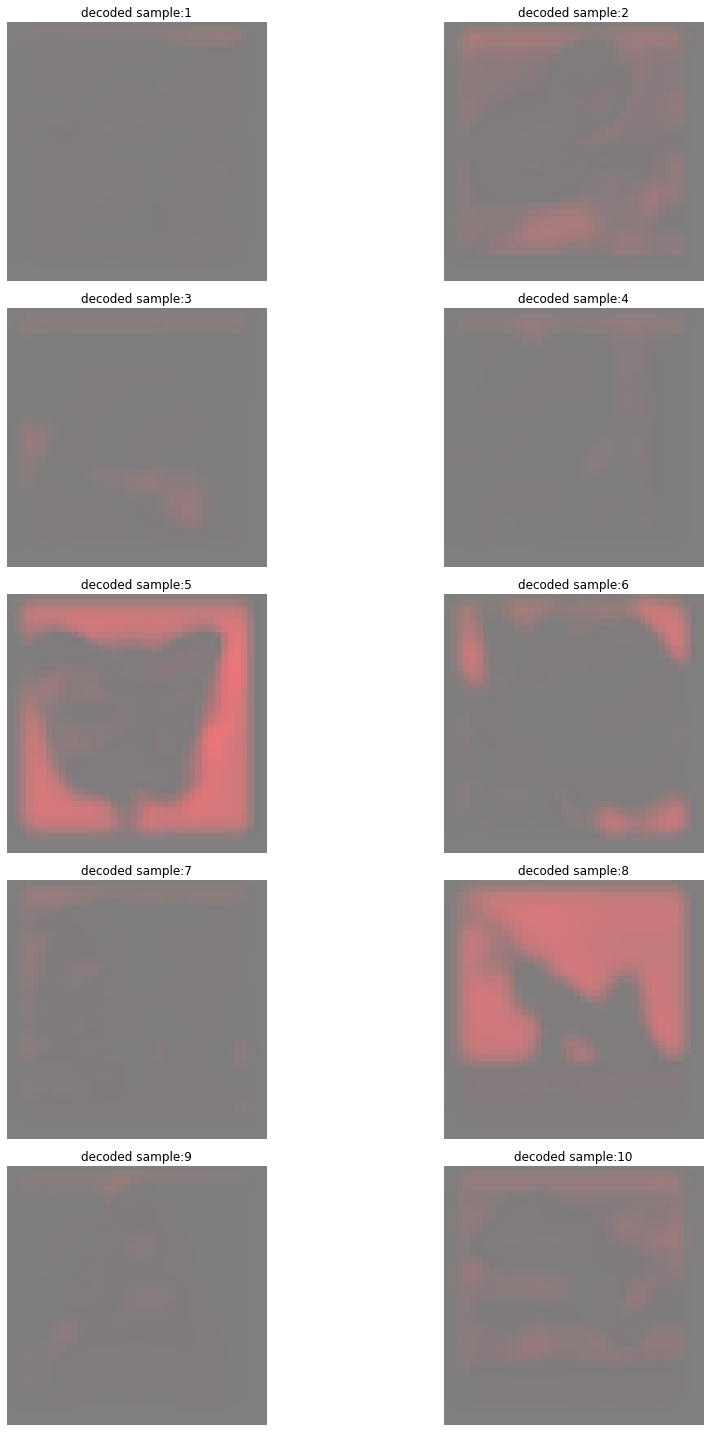

epoch: 7/10
batch: 4/5
loss: 0.08065811544656754


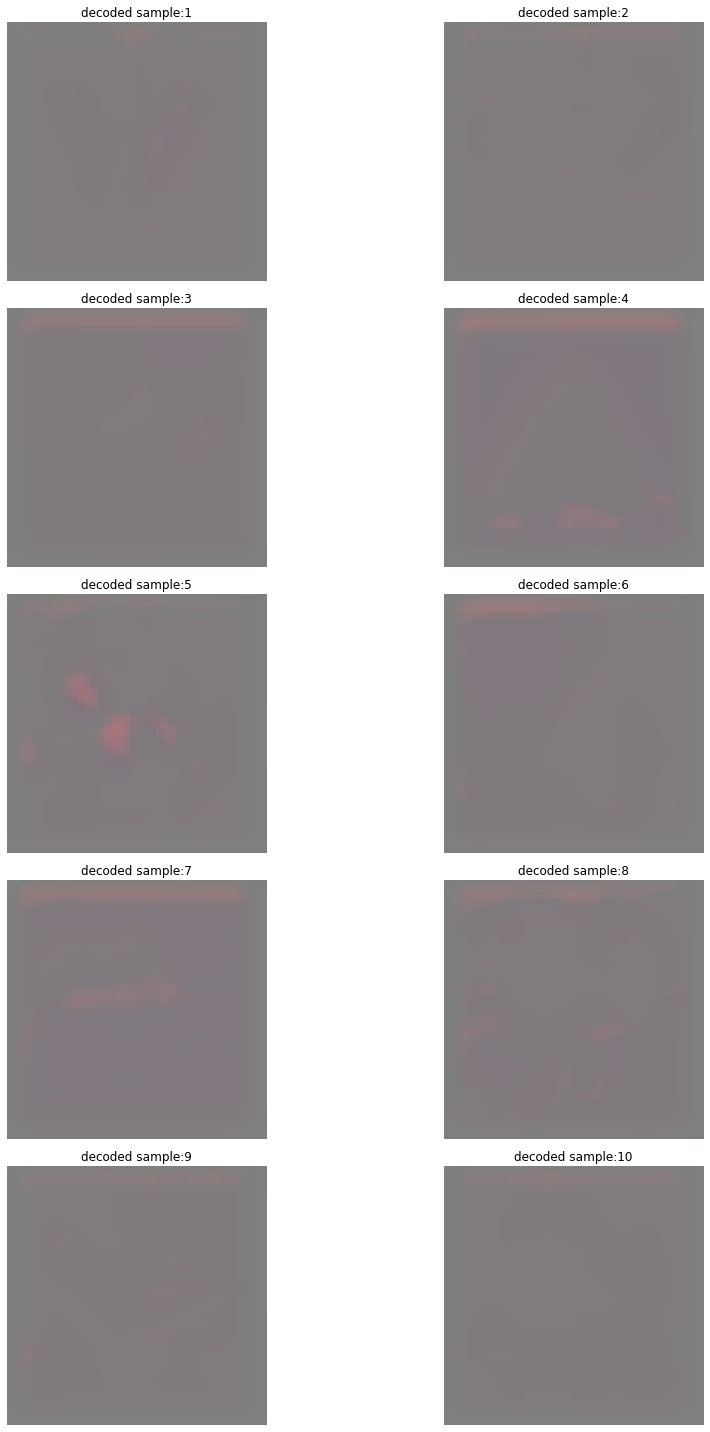

epoch: 7/10
batch: 5/5
loss: 0.10633426159620285


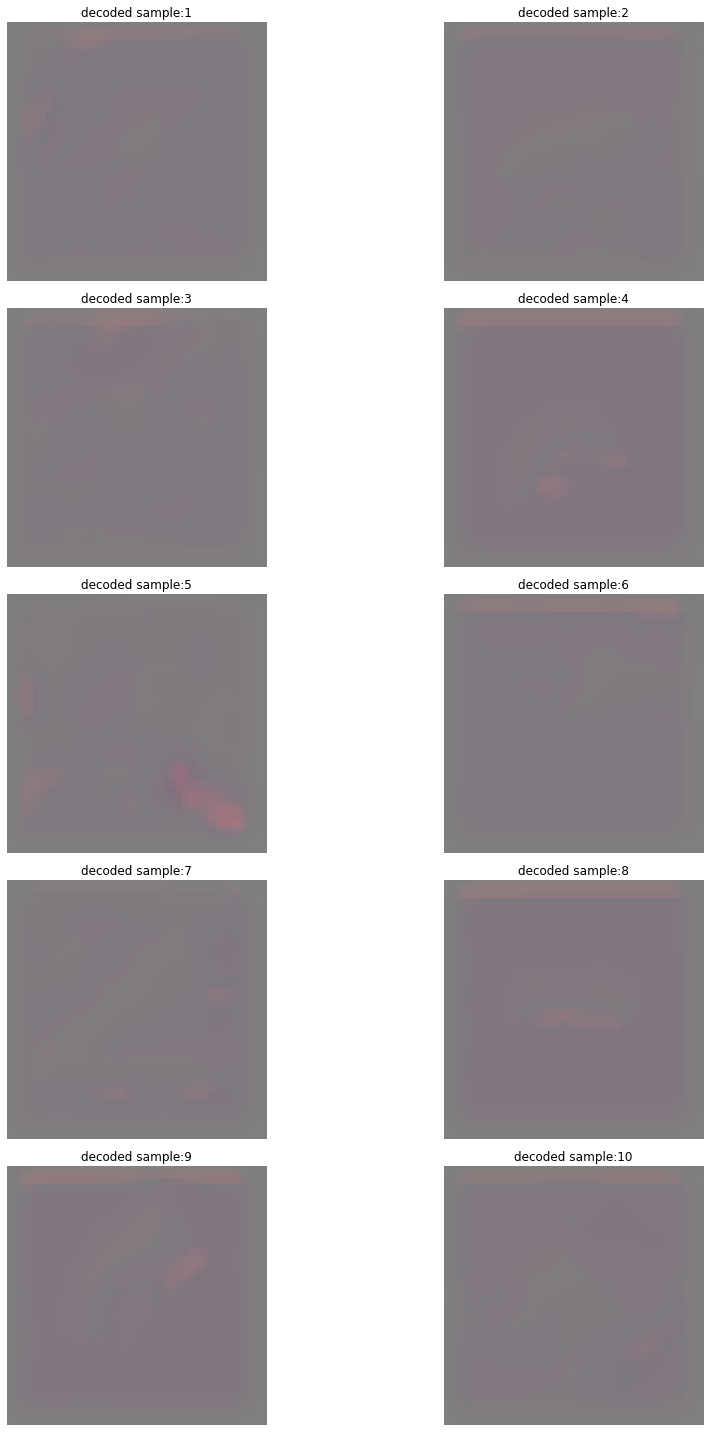

epoch: 8/10
batch: 1/5
loss: 0.11598115414381027


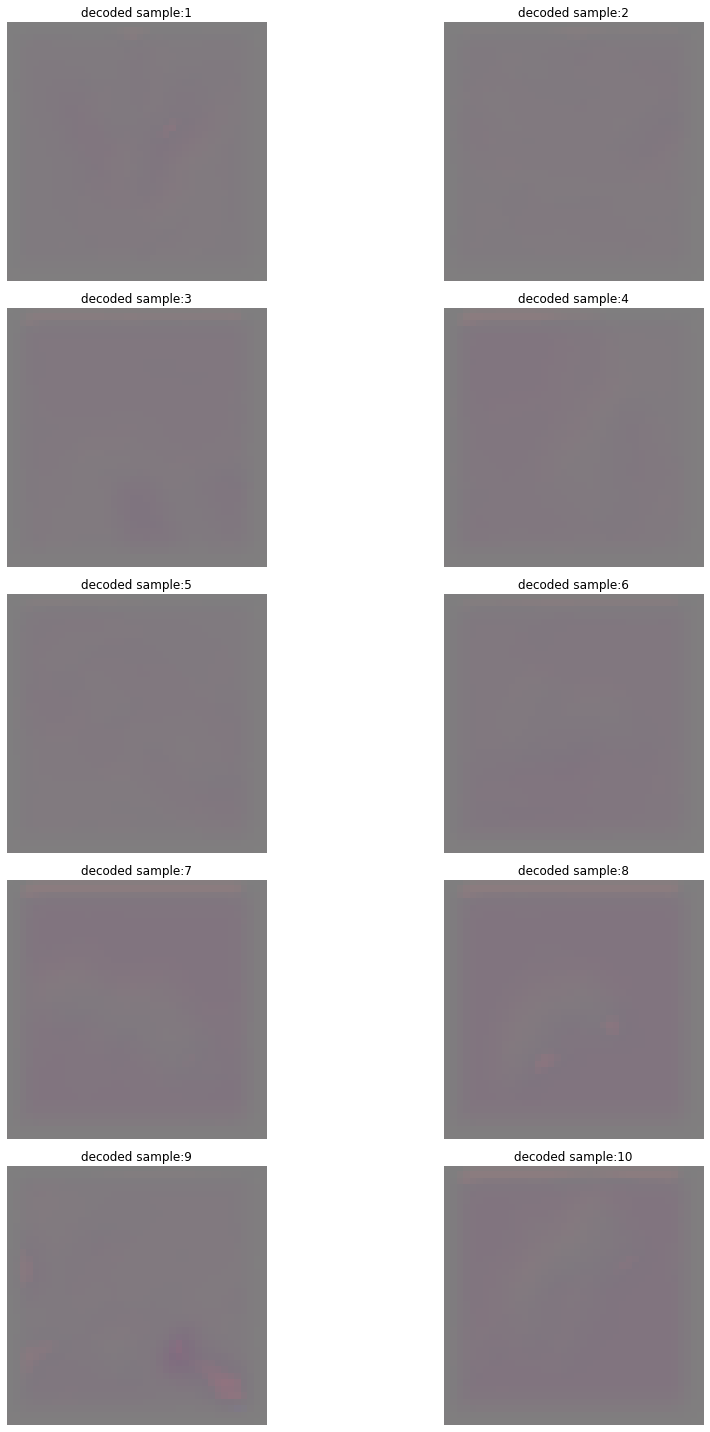

epoch: 8/10
batch: 2/5
loss: 0.11869410425424576


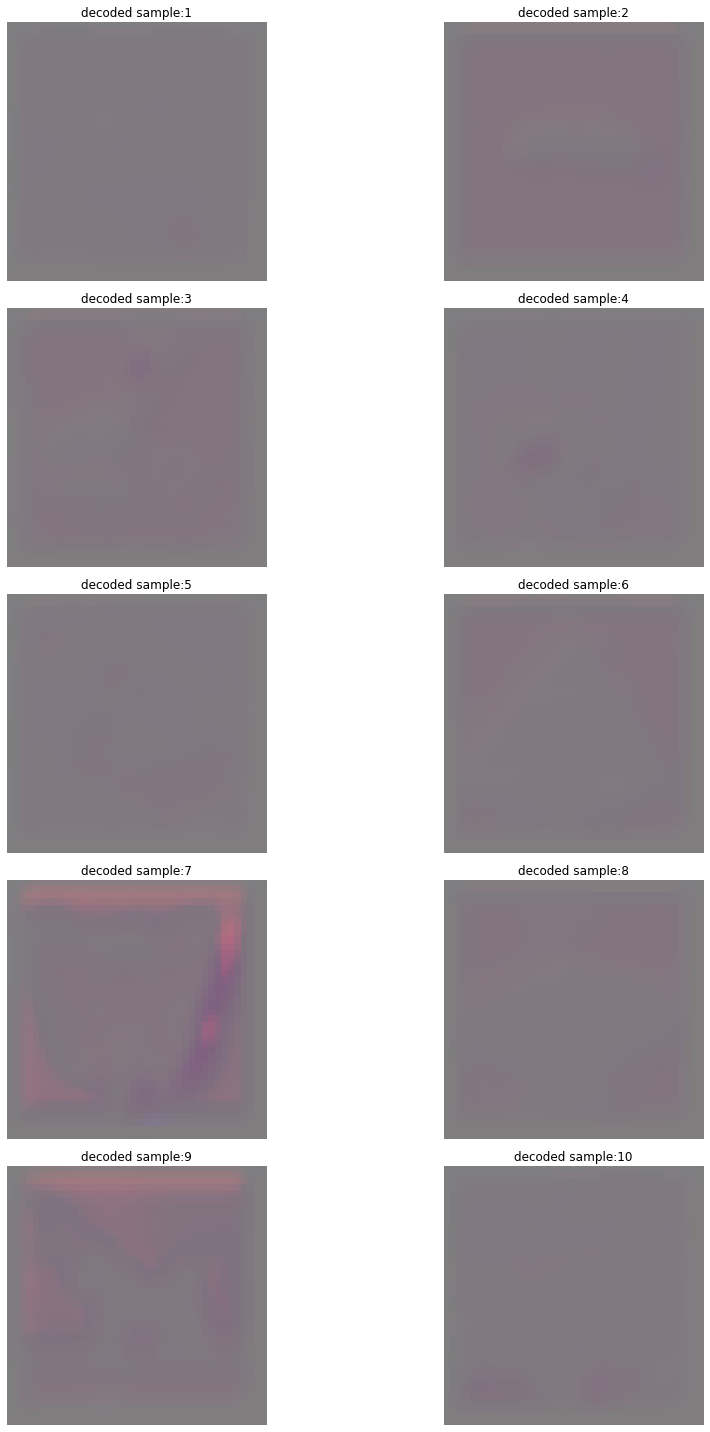

epoch: 8/10
batch: 3/5
loss: 0.07350043952465057


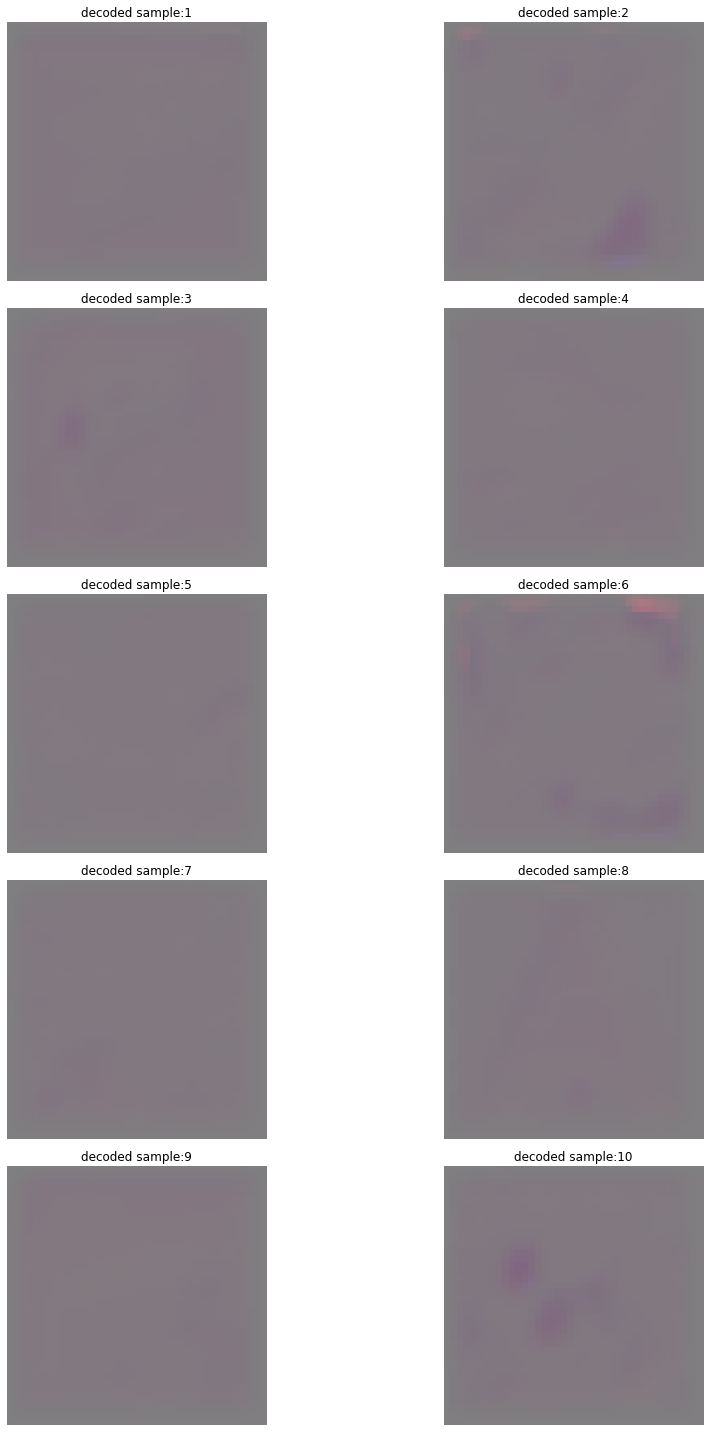

epoch: 8/10
batch: 4/5
loss: 0.09196309745311737


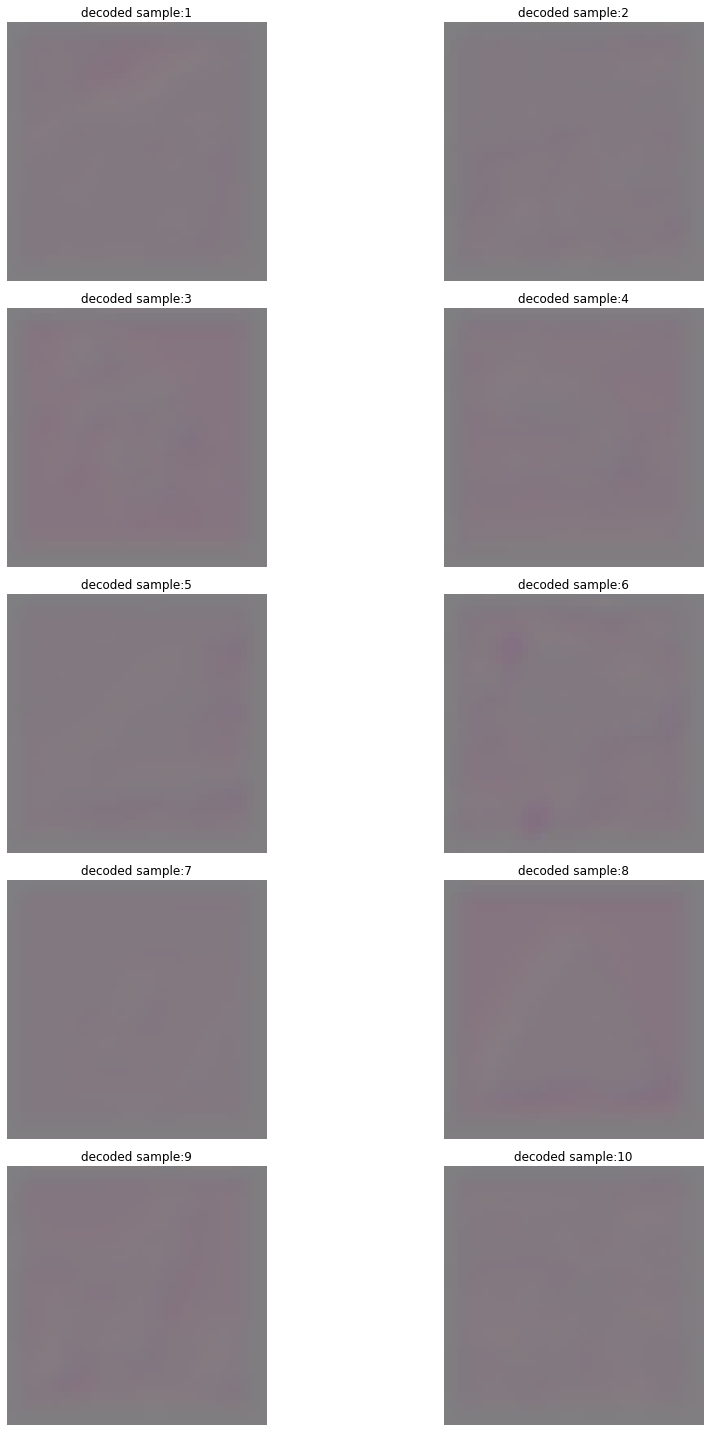

epoch: 8/10
batch: 5/5
loss: 0.052946433424949646


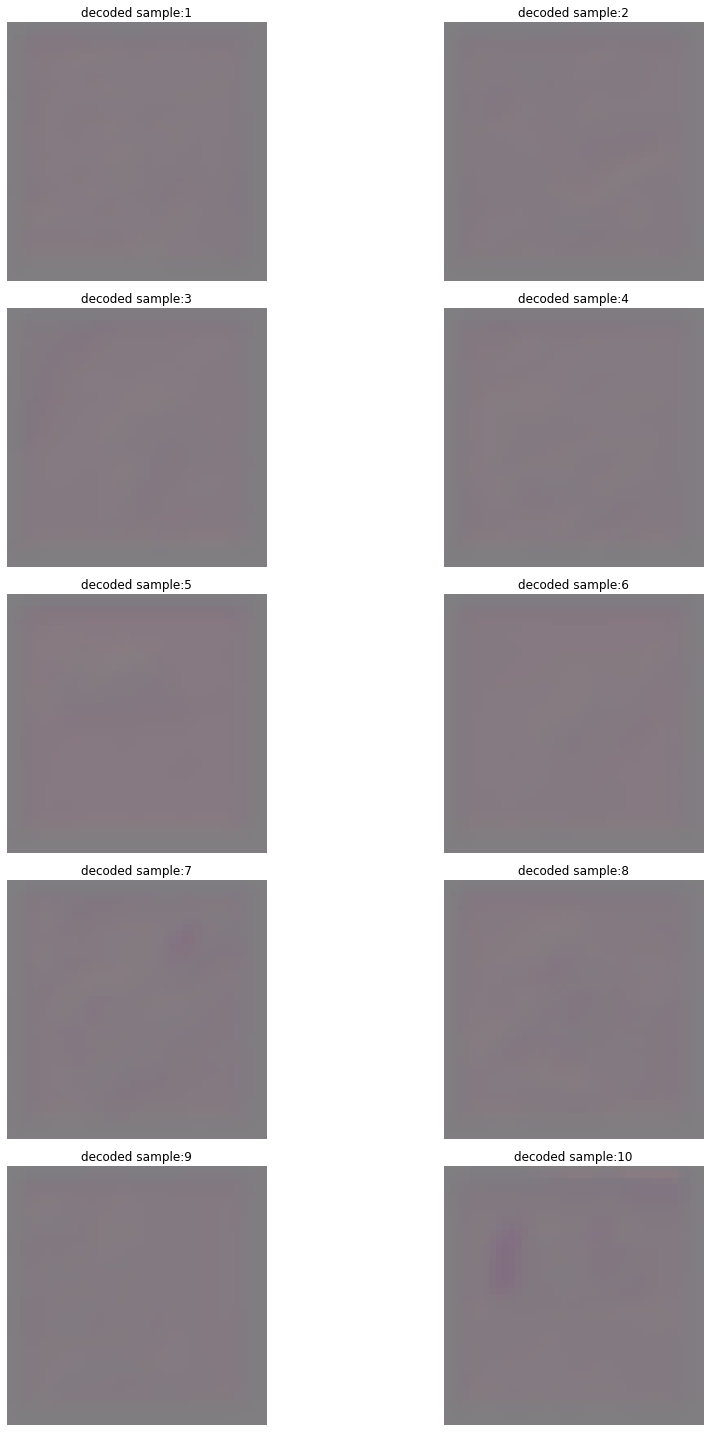

epoch: 9/10
batch: 1/5
loss: 0.08234057575464249


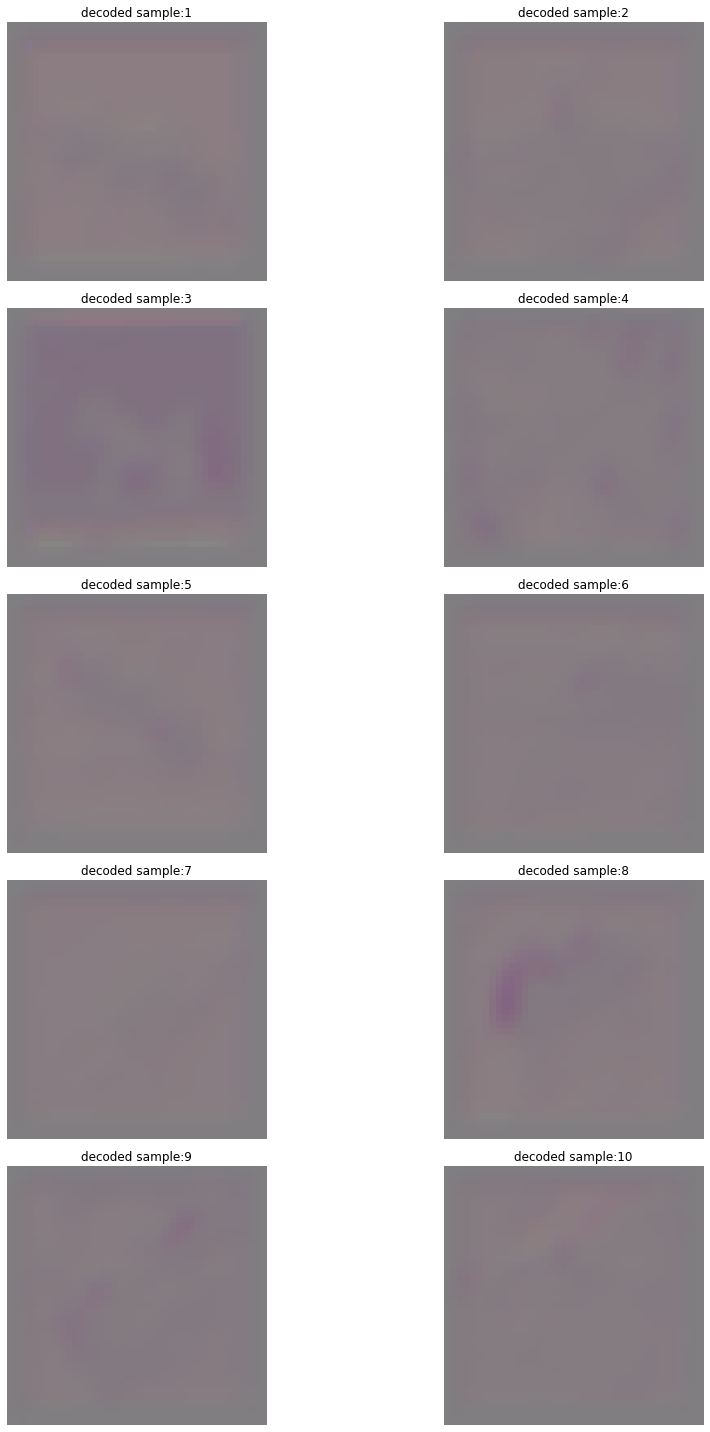

epoch: 9/10
batch: 2/5
loss: 0.07929081469774246


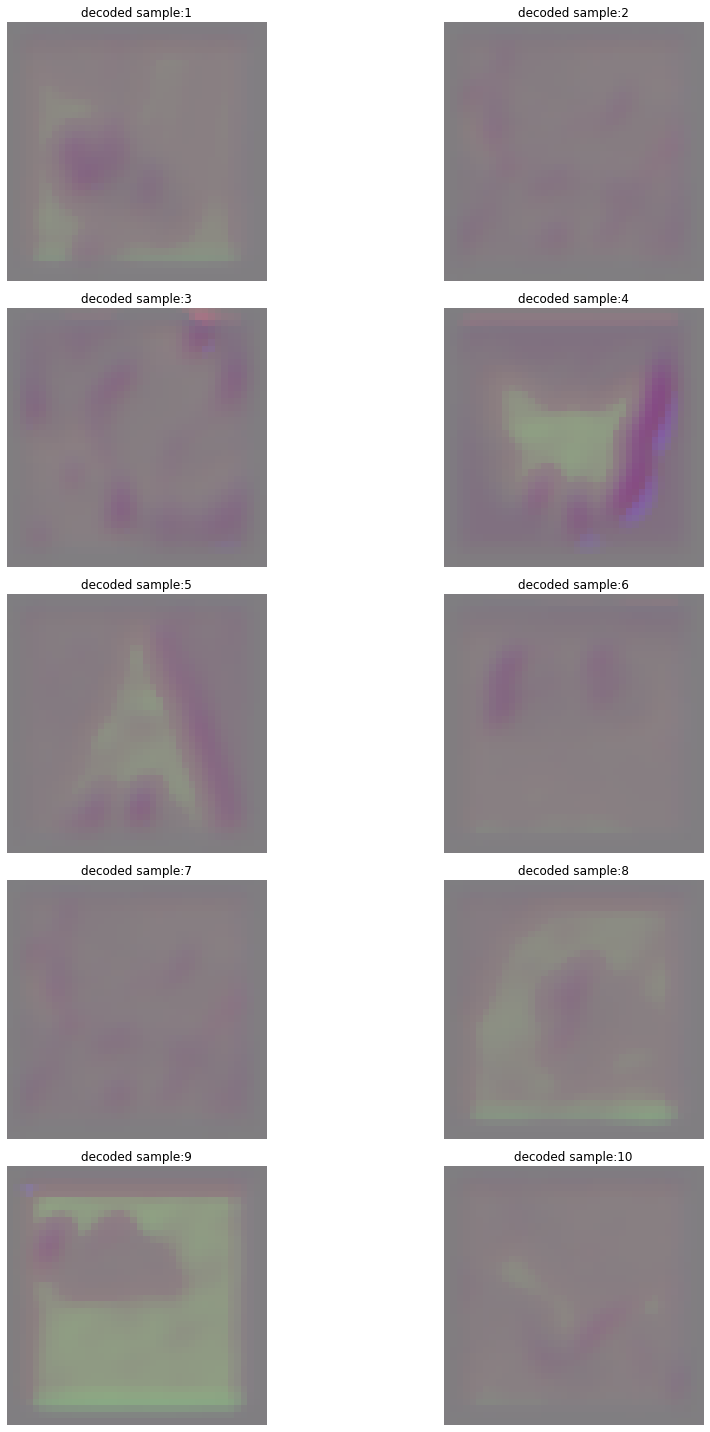

epoch: 9/10
batch: 3/5
loss: 0.08099818229675293


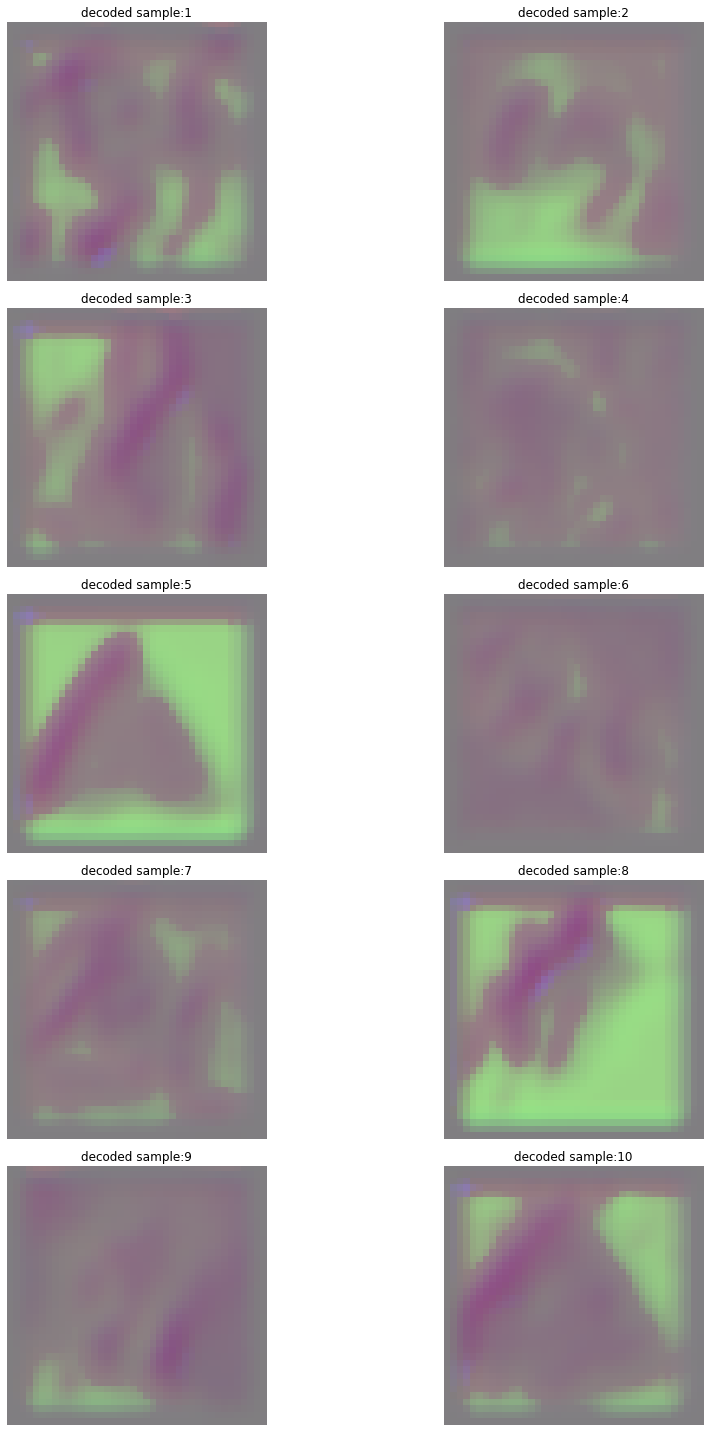

epoch: 9/10
batch: 4/5
loss: 0.10608658939599991


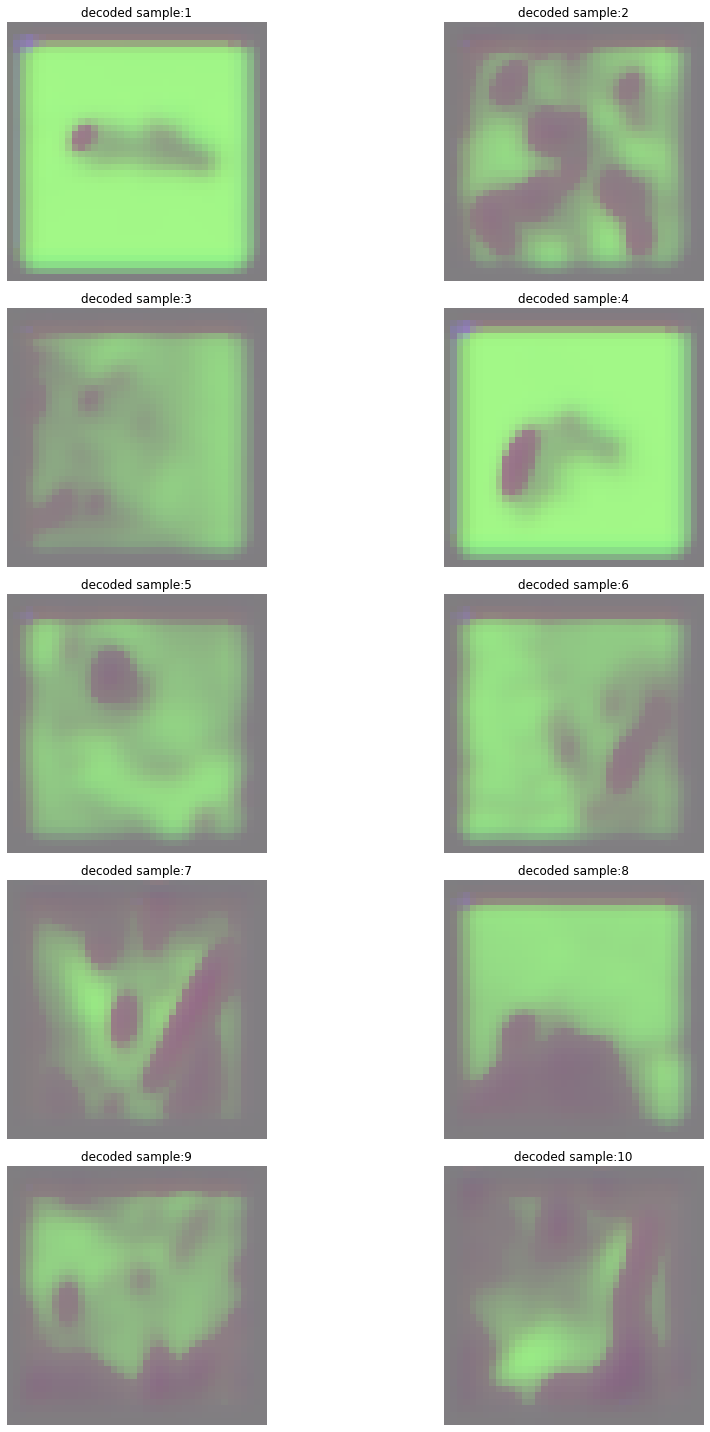

epoch: 9/10
batch: 5/5
loss: 0.08165554702281952


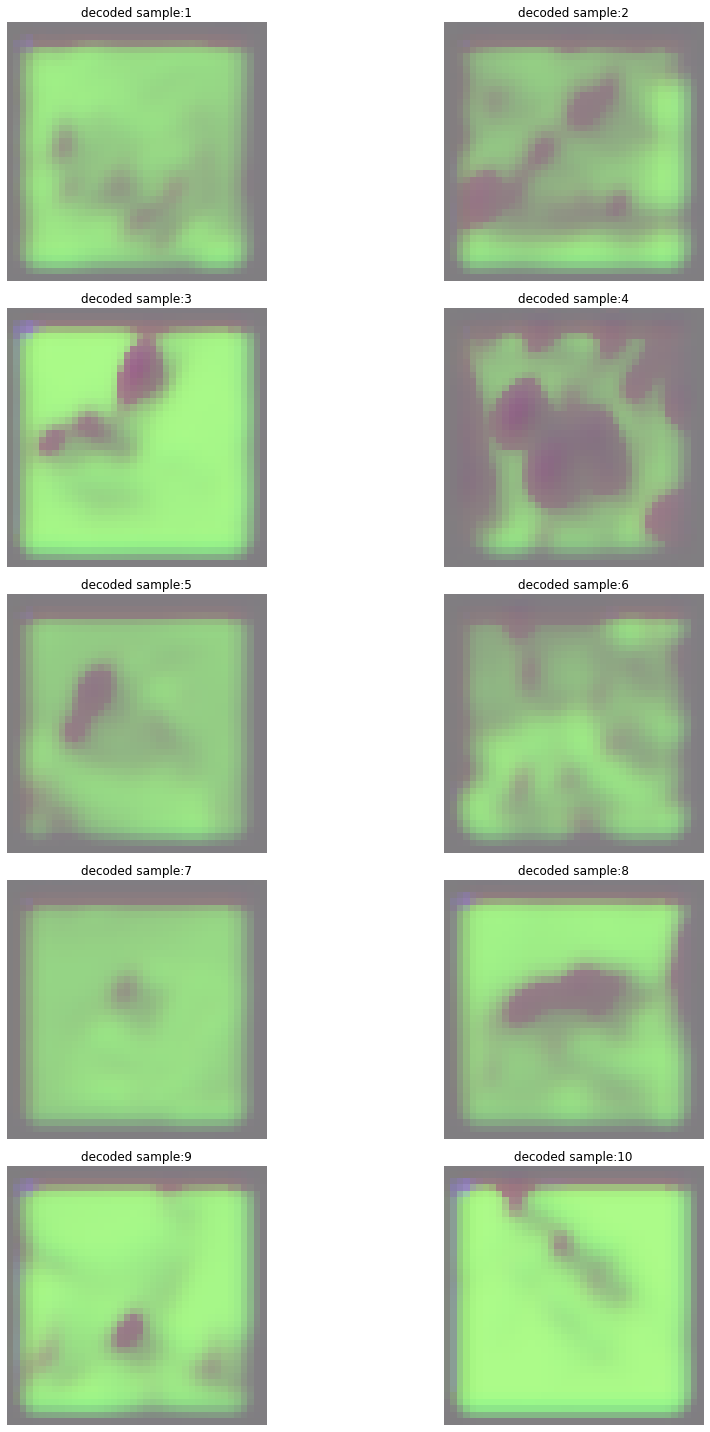

epoch: 10/10
batch: 1/5
loss: 0.06193206459283829


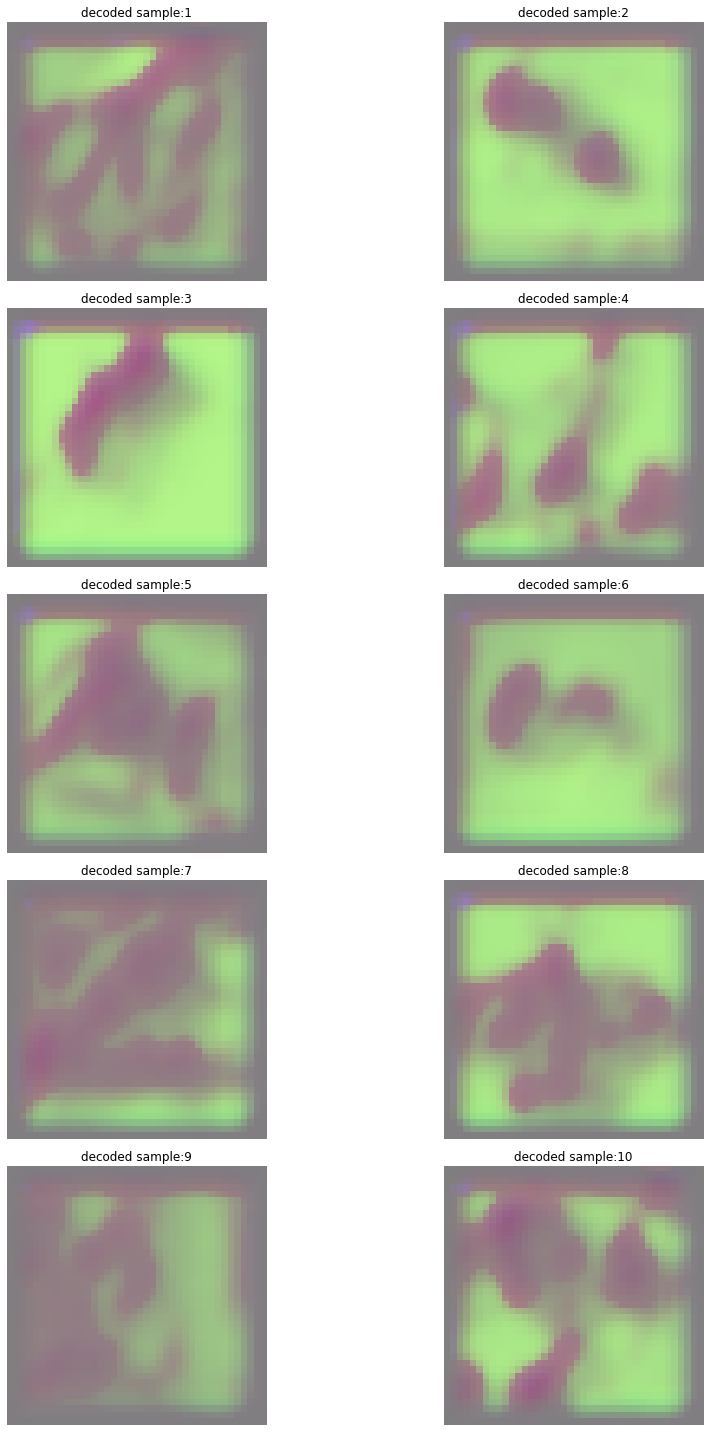

epoch: 10/10
batch: 2/5
loss: 0.07591124624013901


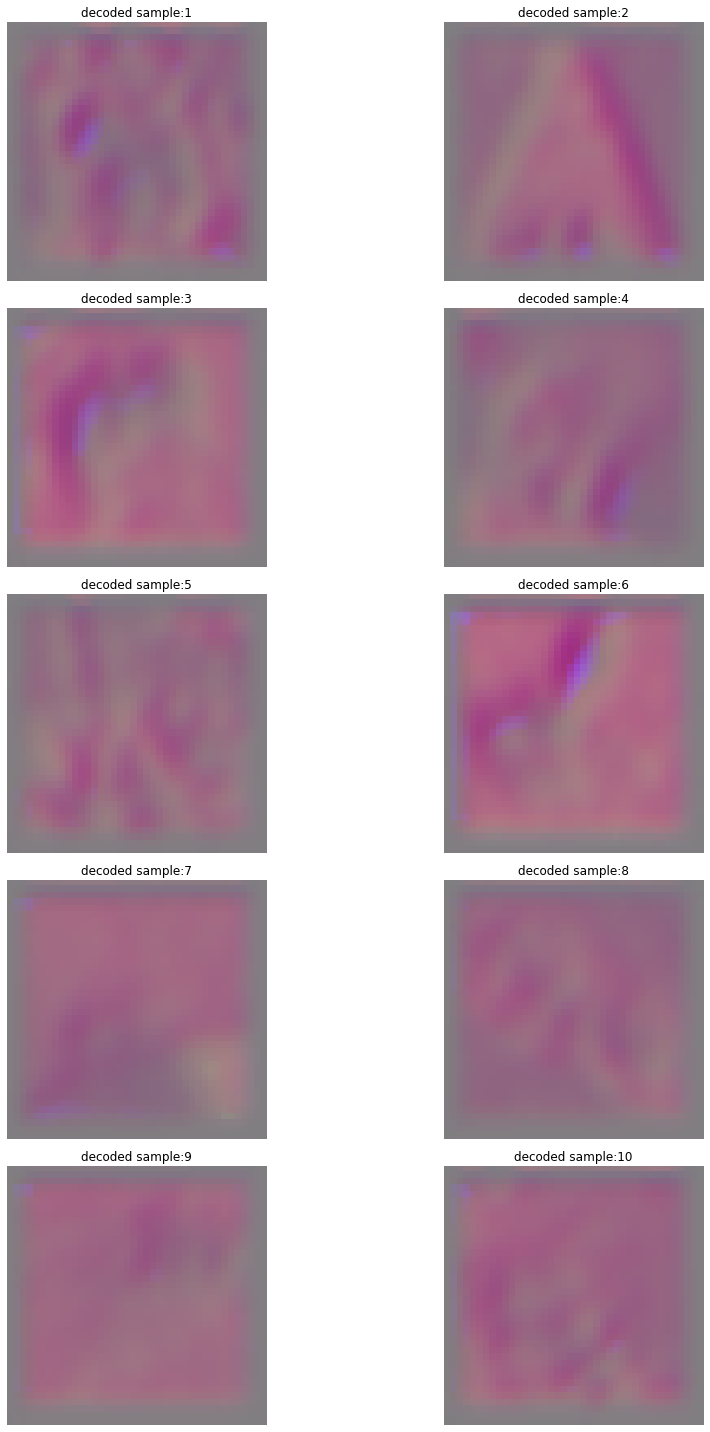

epoch: 10/10
batch: 3/5
loss: 0.10226573795080185


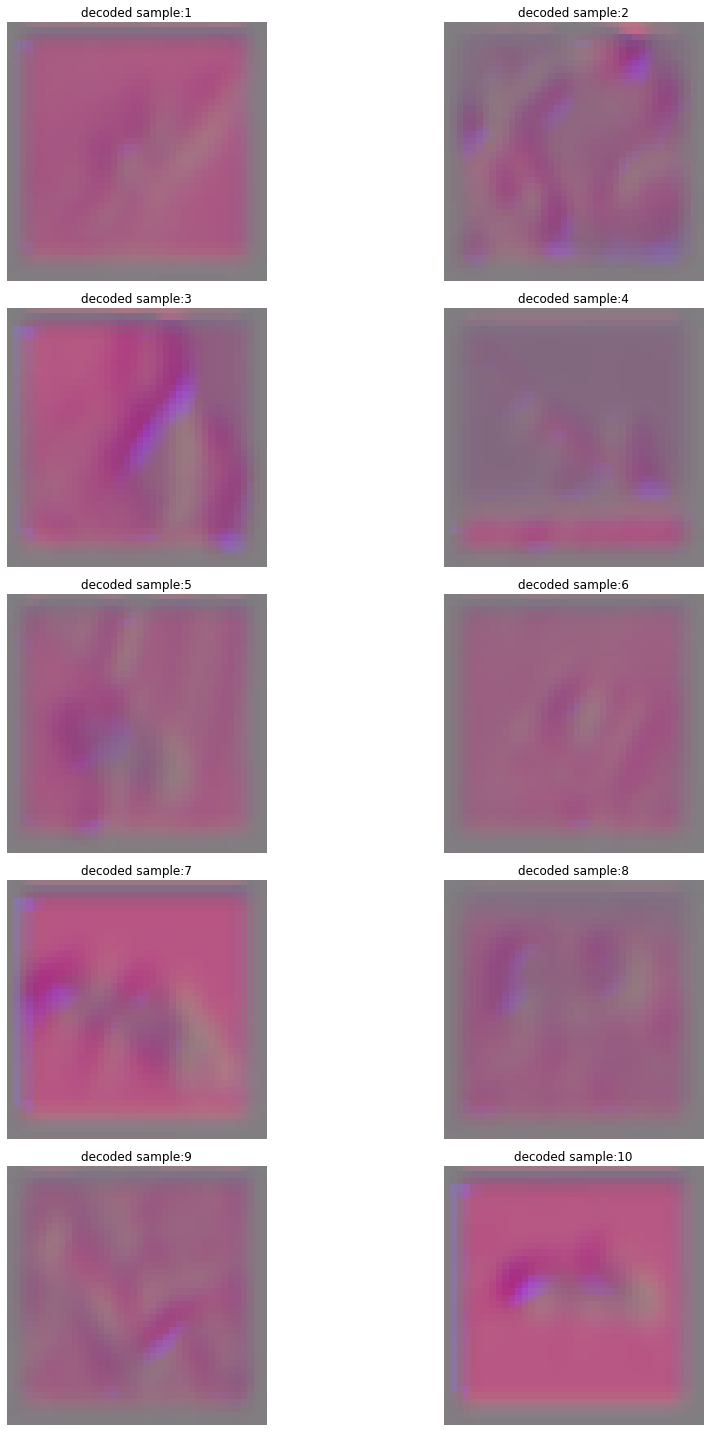

epoch: 10/10
batch: 4/5
loss: 0.0905071571469307


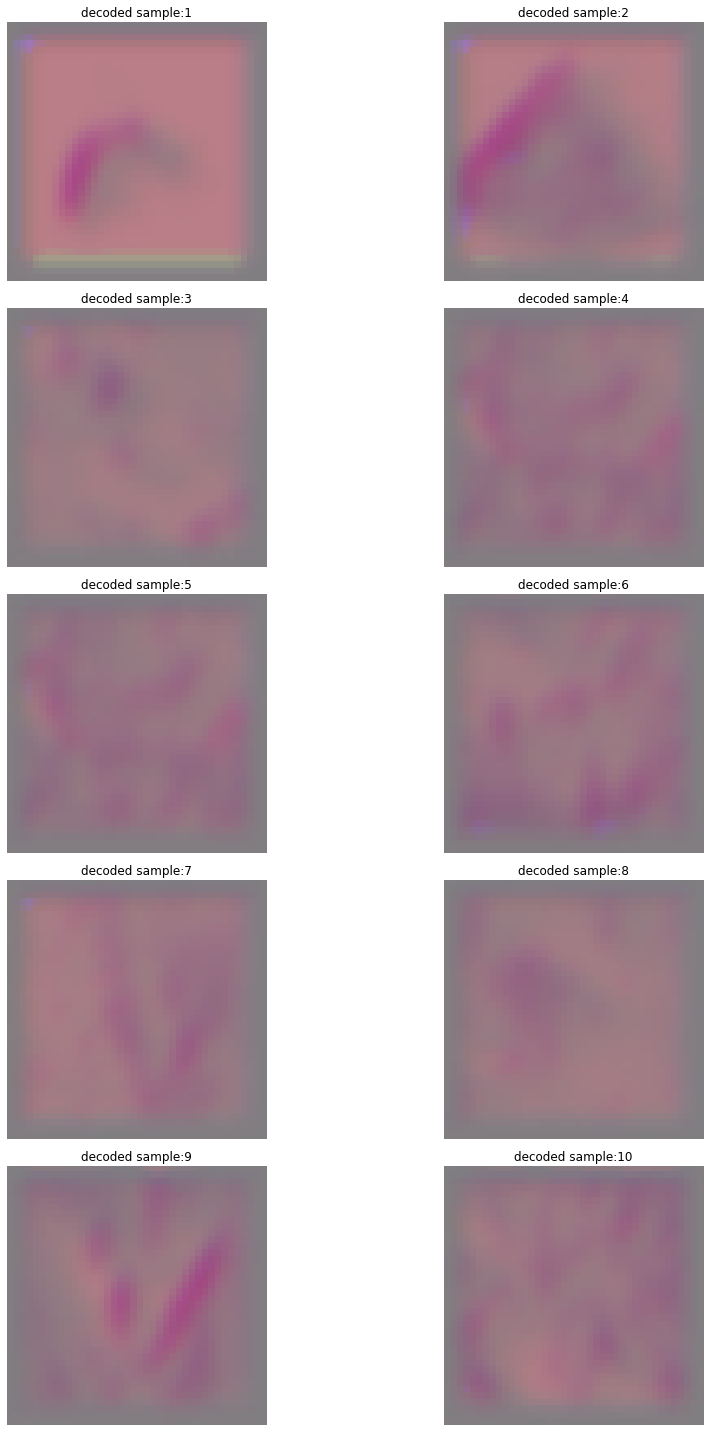

epoch: 10/10
batch: 5/5
loss: 0.1014222577214241


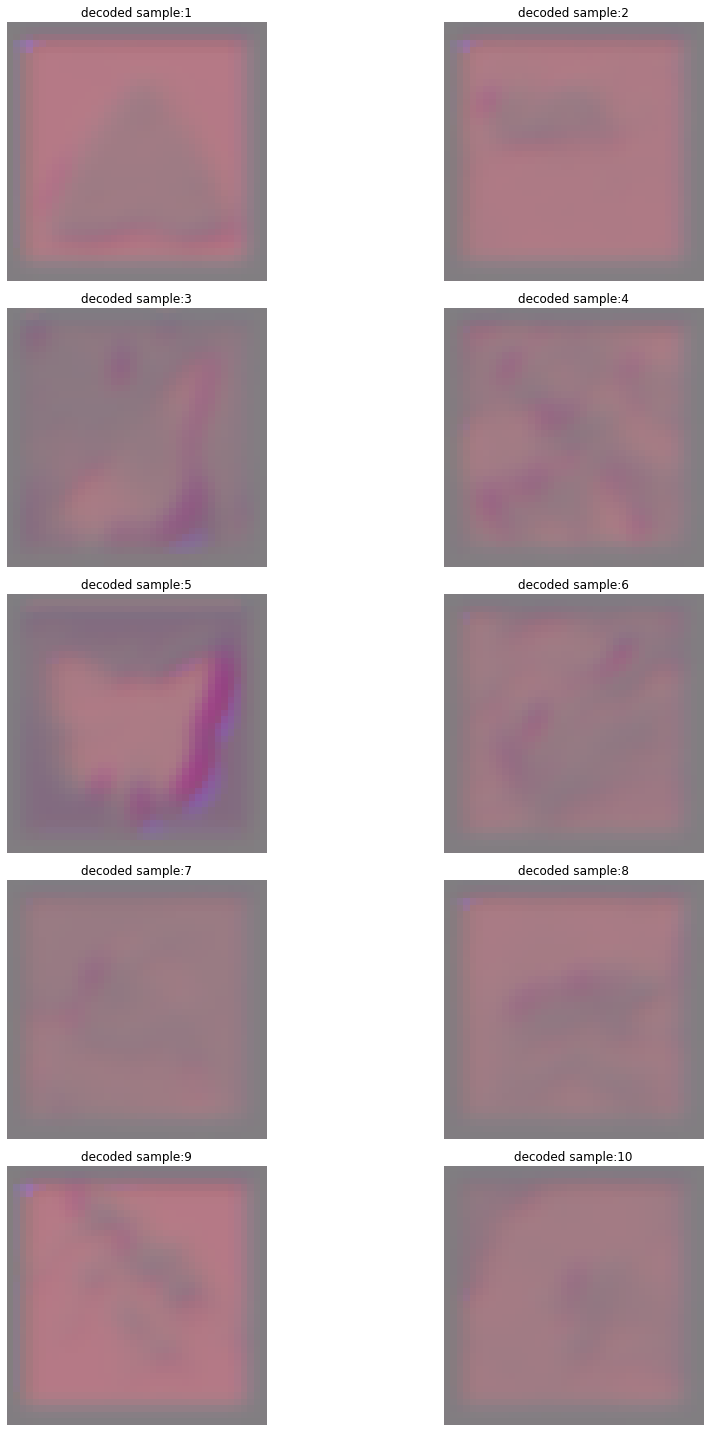

In [80]:
results=train_autoencoder(path=train_path, #train path
                  model=ae, #train using autoencoder model
                  batch_size=10, #batch size of 10
                  transform='default', #default transform
                  epochs=10, #10 epochs
                  optimizer='rmsprop', #using RMSprop optimizer this time
                  lr=0.001, #learning rate of 0.001
                  momentum=0.9, #momentum of 0.9
                  weight_decay=0, #weight decay
                  img_size=(40,40), #size of images
                  cmap=None, #when plotting decoded samples, use a color map or not
                  normalize_plot=True) #normalize pixel values during plot (might get warning message if False)

### Train denoising autoencoder
##### (denoising autoencoder example)
#### We can train a denoising autoencoder as well 

In [82]:
train_denoising_autoencoder(path=train_path, #path to training images
                            model=ae, #model to use
                            batch_size=10, #batch size
                            epochs=10, #epochs to train
                            transform='default', #default transform
                            optimizer='adam', #using Adam optimizer
                            lr=1e-3, #learning rate
                            momentum=0.8, #momentum
                            weight_decay=0, #weight decay
                            loss_fun='mse', #use MSE loss to train denoising autoencoder (can use MAE or KL_DIV loss instead)
                            mean=0, #mean of the noise distribution to corrupt the images
                            sigma=0.01, #standard deviation of the noise distribution to corrupt the images
                            img_size=(40,40), #size of the images
                            cmap=None, #use a colormap when plotting decoded images
                            normalize_plot=True,
                            plot_samples=True) #normaolze the plot of decoded images or not

epoch: 1/10
batch: 1/5
loss: 0.06741396337747574
epoch: 1/10
batch: 2/5
loss: 0.08433541655540466
epoch: 1/10
batch: 3/5
loss: 0.08934390544891357
epoch: 1/10
batch: 4/5
loss: 0.06715292483568192
epoch: 1/10
batch: 5/5
loss: 0.0836482048034668
epoch: 2/10
batch: 1/5
loss: 0.07165560871362686
epoch: 2/10
batch: 2/5
loss: 0.061529986560344696
epoch: 2/10
batch: 3/5
loss: 0.07549970597028732
epoch: 2/10
batch: 4/5
loss: 0.08986375480890274
epoch: 2/10
batch: 5/5
loss: 0.08235351741313934
epoch: 3/10
batch: 1/5
loss: 0.06747682392597198
epoch: 3/10
batch: 2/5
loss: 0.07502445578575134
epoch: 3/10
batch: 3/5
loss: 0.09014935046434402
epoch: 3/10
batch: 4/5
loss: 0.08165926486253738
epoch: 3/10
batch: 5/5
loss: 0.06432361155748367
epoch: 4/10
batch: 1/5
loss: 0.059091802686452866
epoch: 4/10
batch: 2/5
loss: 0.08279120177030563
epoch: 4/10
batch: 3/5
loss: 0.08848734945058823
epoch: 4/10
batch: 4/5
loss: 0.06336426734924316
epoch: 4/10
batch: 5/5
loss: 0.08274038881063461
epoch: 5/10
batch: 

#### Anaconda UI for custom autoencoders
##### To run this program, go to the Anaconda terminal and type python run_autoencoder.py and run any number of the following arguments:
      1) --mode 'standard' (vanilla autoencoder) or 'denoise' (train a denoising autoencoder)
      2) --path - path to training data 
      3) --num_conv_layers - number of convolutional layers to use in the encoder and decoder networks
           (mirrored architecture)
      4) --channels - number of input channels for images 
      5) --optimizer - the optimizer to train the autoencoder network (SGD, Adam, or RMprop)
      6) --lr - learnign rate to use for optimizer
      7) --momentum - momentum to use for optimizer (ignored if using Adam)
      8) --img_size - image size to feed in the autoencoder
      9) --cmap - what matplotlib colormap to use (if any) when plotting the images
      10) --normalize - whether or not to normalize the images when plotting
      11) --epochs - the number of epochs to train the model 
      12) --batch_size - batch size 
      13) --mean - mean of the corrupting noise distribution (Gaussian) (only relevant for 'denoise' mode)
      14) --sigma - standard deviation of the corrputing noise distribution (Gaussian) (only relevant for 'denoise' mode)
      15) --explore - whether or not to explore/debug after script finishes running. 

##### The UI for autoencoders and denoising autoencoders is all done with one python file. Let's run exactly the same script as above for the denoising autoencoder, but this time through the UI. 

<img src="./doc_screenshots/autoencoder_demo_1.jpg" width=1000 height=1000 />

##### Note that when running the command line UI, one batch of samples, samples with noise, and corresponding decoded samples are saved once every epoch to a directory called "autoencoder_outputs". 

##### * known bug: noisy sample plots sometimes have color issues when being plotted on normalized images. This does not seem to affect performance, but visually this is "off". This should be an easy fix, and will be fixed by next update. 


### Train custom GAN

##### Let's now train a custom GAN (using the DCGAN architecture)
##### Note we are going to show how to train a GAN on a custom dataset, but for traditional GANs, thousands of images 

In [ ]:
gan = mk_custom_gan(num_conv_layers=3,nc=3,noise_dim=3)

In [ ]:
print(gan)

#### let's check to make sure the GAN can compute a forward pass


In [ ]:
D = gan['D'] #get the Discriminator
G = gan['G'] #get the Generator
D_real = D(torch.randn(4,3,40,40)) #batch size (4) x 3 channels x height x width (40 x 40)
G_out = D(torch.randn(4,3,28,28)) #4, 3 channel noisy tensors, where each noisy image has height 28 and width 28
D_out = D(G(torch.randn(4,3,40,40)))
print(D_out) #outputs batch size (4) x 2 - one column is the probability of real and the second is probability image is fake



### Train custom GAN

In [ ]:
gan_results=train_gan(path=train_path,#path to training data
                      model=gan, #gan data
                      noise_dim=3, #number of noisy channels to feed in the GAN at once
                      batch_size=8, #batch size 
                      epochs=10, #number of epochs to train the GAN
                      transform='default', #transform on dataset
                      opt_g='sgd', #optimizer for G
                      opt_d='sgd', #optimizer for D
                      lr_g=0.001, #learning rate for G
                      lr_d=0.0001, #learing rate for D
                      weight_decay_g=0, #weight decay for G
                      weight_decay_d=0, #weight decay for D
                      mom_g=0.9, #momentum for G
                      mom_d=0.3, #momentum for D
                      sigma=0.15, #std for the Gaussian normal to sample the noise from for pixel values
                      loss_function='bce', #loss function train GAN (BCE Loss, MSE Loss, MAE Loss and KL DIV Loss)
                      cmap=None, #use a color map when plotting the Generator samples
                      normalize_plot=True,#whether or not to normalize the plot
                      plot_batches=True) 
                      

#### Anaconda UI for DCGAN training

##### type python run_neurales_gan.py and enter any number of the following arguments
     1) --path - path to training images
     2) --num_conv_layers - number of convolutional layers to use in each network (the architectures mirror)
     3) --channels - number of input channels for the images
     4) --noise_dim - the number of noisy channels to feed into the Generator
     5) --img_size - size of the image data (square sizes only(
     6) --epochs - number of epochs to train the GAN model for 
     7) --batch_size - batch size to feed the model 
     8) --d_opt - the optimizer to use for the Discriminator (SGD, Adam, RMSprop)
     9) --d_lr - the learning rate to use for the Discriminator optimizer 
     10) --d_mom - the momentum to use for the Discriminator optimizer (ignored if using Adam for the Discriminator)
     11) --g_opt - the optimizer to use for the Generator (SGD, Adam, RMSprop)
     12) --g_lr - the learning rate to use for the Generator optimizer 
     13) --g_mom - the momentum to use for the Generator optimizer (ignored if using Adam for the Generator)
     14) --sigma - the standard deviation of the Gaussian noise distribution to sample from
     15) --cmap - what matplotlib colormap to use when plotting images (defaults to None)
     16) --normalize - whether or not to normalize the images before plotting 
     17) --explore - whether or not to explore/debug after script runs 
     
##### Let's run a 5 layer deep DCGAN on CIFAR10 this time for 5 epochs, using a batch size of 100, and image size of 32 x 32, and default arguments for the rest

##### We will use 64 channels for the first layer of both networks, then 32, 16, 8 and finally 4 channels for the subsequent layers. We will also use the typical 3 x 3 kernels in each layer. 

<img src="./doc_screenshots/neurales_gan_demo.jpg" width=1000 height=1000 />

##### the outputs are saved under a folder called "gan_outputs". One batch of generated samples is saved every epoch 

### Neurales object detection 

#### Neurales let's users detect objects that exist in the COCO dataset. 

#### Object detection is commonly done via a combination of classification and regression. Deep learning models learn to classify what type of objects are in an image (classification), and also predict bounding boxes around those objects. The regression happens when the model ouputs a two numeric values, corresponding to height and width, center coordinates, or upper-left corner of the bounding box coordinates. Neurales allows users to use a pre-trained Faster-RCNN and Mask R-CNN model to perform object detection. While the object detection is not yet custom, the API will mimick the same one used for image classification and image generation (with GANs). 

#### Faster R-CNN model
<img src="./doc_screenshots/fast_rcnn.jpg" width=800 height=800 />

#### Loss function 
<img src="./doc_screenshots/rcnn_loss.jpg" width=400 height=400 />

##### Neurales has an API for non custom object detection (mostly for educational purposes). However, this API will be mimicked when custom object detection support is released. Additionally, Neurales will allow user to select the superior Darknet-YOLO model for object detection for training. 


In [ ]:
from neurales_obj_detect import *

detect_obj(img_path='./test_img.jpg',
           model='fast_rcnn',
           threshold=0.9,
           rect_th=4,
           text_size=1,
           text_th=2,
           plot_obj_conf=False,
           decimals=3,
           box_color='green',
           text_color='green',
           custom_box_color=None,
           custom_text_color=None)

### Anaconda UI for Object Detection 

#### Let's now use the Anaconda UI for object detection - 
#### Go to the Anaconda terminal and type python run_object_detection.py and enter any number of the following arguments 
     
     1) --img_path - path to image to perform object detection on (defaults to the image shown above)
     2) --model - select a base model (currently only supports fast_rcnn or mask_rcnn) (defaults to fast_rcnn)
     3) --thres - object confidence threshold - detect objects only when the model's confidence in the detection is at or
                  above the given threshold (default 0.9)
     4) --text_size - text size to display over the detected bounding boxes (default 1.0)
     5) --plot_conf - whether or not to plot the confidence of the detection on top of the corresponding bounding box
                       (default False - confidence is not plotted)
                       
     6) --box_color - 'red', 'green', or 'blue' for the color of the bounding boxes (default green)
     7) --text_color - 'red', 'green', or 'blue' for the color of the text above the bounding boxes (default red)
     8) --explore - whether or not to explore/debug after script finishes running (default False)
     
#### Let's perform object detection on the same image, but this time plot the confidence and change the threshold to 0.95

<img src="./doc_screenshots/object_detection_demo.jpg" width=1000 height=1000 />
<img src="./doc_screenshots/object_detection_argparse.jpg" width=1000 heght=1000 />

### Neural Style Transfer

<img src="./doc_screenshots/style_transfer_explanation.png" width=750 height=750 />

#### Neural style transfer works as follows:
     1) Take pre-trained model (typically on ImageNet)
     2) Feed in a content image through the network and pull the feature maps from a later layer
     3) Feed in a style image through the network and pull feature maps from several of the earlier layers
     4) The style image is then represented as Gramian matrix
     

##### $L(x,A,P) = ||C(x)-C(P)|| - K||S(x)-S(A)||$ 

###### is the loss function to minimize, where $C(p)$ is the "content" (i.e. the feature maps obtained from feeding through content image), $S(A)$ is the "style" (i.e. the feature maps obtained feeding the style image through the network, and $K$ is a "style constant" which helps control how strong the styling effect on the content image is. 


#### Neurales let's you perform custom style transfer between a content image and a style image

#### Neurales uses VGG13 instead of VGG16 or VGG19 pre-trained on ImageNet for style transfer:

#### Much like the above, we can run neural style transfer from the Anaconda terminal. The code for style transfer is not as modular as the rest of the computer vision module. In future updates, style transfer will allow users to incorporate multiple different styles on top of a content image rather than just one. Additionally, users will be able to use their own model. 

In [ ]:
vgg13 = torchvision.models.vgg13(pretrained=True)

In [ ]:
content_img = './lana_del_rey.jpg' #default content image 
style_img = './starry_nights.jpg' #default style image 



#### Run neural style transfer in the Anaconda UI 
      1) run the python file "run_style_transfer.py"
      2) To enter a custom content image --content_img (path to file)
      3) To enter a custom style image --style_img (path to file)

##### The demo uses the default content and style image above 

<img src="./doc_screenshots/style_transfer_ui.jpg" width=700 height=1000 />

#### here we used default arguments except we train for 400 epochs. The resulting image is automatically saved to the directory

## Content Image & Style Image 

<img src="./doc_screenshots/lana_del_rey.jpg" width=500 height=500 />
<img src="./doc_screenshots/starry_nights.jpg" width=500 height=500 />

### Style Transfer 
<img src="./doc_screenshots/new_lana.png" width=500 height=500 />

### Neuroevolution for Computer Vision

#### 1) CNNs for image classification
#### 2) DCGANS for image generation 


#### In neurales, users have the option to neuroevolve CNNs for image classification and DCGANS for image generation. In the traditional ML section, we saw that we not only evolve the models, but an entire pipeline. Neurales plans to reserve the pipeline option for paid tiers. It works similarly as above - except we evolve data augmentation + transforms + optimizers + models. In future versions, it will also be possible to neuroevolve custom object detection models, transfer learning + few shot classifiers and detectors, transformers, autoencoders, and variational autoencoders, each with their own appropriate fitness function. 

#### In this version, neurales allows the evolution of "just" the models and optimizers using both an elitist selection approach and a one point crossover-mutation approach. 

#### Elitist: 
      - we select a fraction of CNNs that had the highest fitness and deem these "elite".
      - the next generation has a fraction of these elite models as well as randomly initialized new chromosomes.
#### Crossover-Mutation
      - we select a number of elite chromosomes to be "parents" for breeding (say 4 of 10). 
      - we then create a population of offspring. In Neurales beta, we have one child for every two parents.
        this amounts to num_children = num_parents - 1 
      - We still need to randomly initialize the rest of the chromosomes.
        (i.e. if we created 3 children from 4 parents with the original population having 10 individuals, we now
        randomly initialize 7). 

#### Crossover-mutation is only available for CNN image classification, but both the traditional ML pipelines and GAN neuroevolution will have this option in future updates, along with more fine grained control over the evolutionary process. 

In [ ]:
from neuroevolution import *


train_path = '../image_datasets/notebook_demo/train' #path to train Images 
val_path = '../image_datasets/notebook_demo/val' #path to validation/test Images 



#### CNN Genome 
     1) Filters - The number of filters/channels to use in that layer 
     2) Kernels - The kernel size (square only) to use in that layer 
     3) Dropouts - "gene" that indicates whether or not to add a dropout layer, and if so, what the dropout probability
                    will be set to.
     4) Norms - "gene" that indicates whether or not to use a normalization layer, and if so, whether to use Batch Norm (BN)
                 or Instance Norm (IN)*
     5) Adaptive type - whether or not to use Adaptive Max Pooling or Adaptive Average Pooling in final layer 
     6) Adaptive size - The size of the image output after applying the adaptive pooling layer
     7) hidden sizes - the size of the hidden layers 
     8) activations - which activation function to apply 
     9) optimizer - which optimizer to use (SGD, Adam, or RMSprop)
     10) lr  - learning rate for optimizer
     11) momentum - momentum for optimizer (ignored if using Adam)
     12) epochs -  the number of epochs to train the model 
     
#### Note that each CNN has a variable depth (number of layers). Filters, kernels, dropouts, norms, and hidden sizes are all lists of length N that varies from chromosome to chromosome. This allows the genetic algorithm to not only evolve width, but also depth of the network, in addition to different optimizer choices and training time. In future updates. 

#### The fitness function for CNN image classification is as follows:
##### Fitness $=tanh(F_{1_{test}}+L_{score})+\varepsilon$  where the $L_{score}=\frac{1}{\sum_{i=1}^{N}L_i}$ (number of layers in the CNN) and $\varepsilon$ is a small constant (set to 0.095 in Neurales)
This way the models evolve to maximize F1 score on the test set, rather than simply test accuracy (which can lead to prediction bias favoring the most commonly occuring class). Additionally, the fitness functions prefers shallower models. The hyperbolic tangent + the small constant addition is to normalize scores between 0 and 1.

More sophisticated fitness functions will be available in future releases.  

#### let's make some chromosomes

In [ ]:
pop = make_genetic_cnns(num_chroms=20, #number of chromosomes
                        nc=3, #number of input channels (3 for RGB images and 1 for greyscale)
                        num_classes=10) #number of classes to predict in the dataset
chroms = pop[0]
genomes = pop[1]

print(genomes[0]) #prints first genome (hyperparameters of CNN + parameters of optimizer)


In [ ]:
print(chroms[0]) #prints corresponding chromosome

###### Note that the number of input features in the first layer in the fully connected portion of the network is ALWAYS correct. No matter how many convolutional layers or how big the kernel sizes are, the adaptive pooling layer forces the output to be a fixed size. Knowing the number of filters/channels in the final layer makes the calculation trivial:   (input features) =  (adaptive_pool_size)*(number of filters in last conv layer)

###### This is necessary because there are a random number of convolutional layers and the input image size is not known beforehand. 


###### The script below performs neuroevolution using an elitist selection approach (crossover-mutation coming soon) on the training and validation data provided above. Note if you wish to run it on MNIST, FashionMNIST, CIFAR10, or CIFAR100, do the following:

##### 1) MNIST -  train_path = 'mnist' val_path = None (or omit --val_path entirely)

##### 2) FashionMNIST - train_path = 'fashion_mnist', val_path = None (or omit --val_path entirely)

##### 3) CIFAR10 - train_path = 'cifar10', val_path = None (or omit --val_path entirely)

##### 4) CIFAR100 - train_path = 'cifar100', val_path = None (or omit --val_path entirely)

##### Note - you can also do the same on the custom CNN scripts above. That is, to train a user-defined custom CNN on any of these datasets, provide the same arguments above to the script. 

###### Be patient. While neuroevolution is effective, it is an EXTREMELY time consuming process for large datasets, it makes sense to have the image sizes be smaller (maximum 30x30) and to have 3-5 generations with 10 chromosomes max to finish in under 24 hours. On smaller datasets, this is not a problem, and default arguments are fine. 

##### CUDA support will be available for some features of Neurales in future updates. Full CUDA support will be available will be available for early adopters and contributors only. 

##### Note that it's very uncommon for CNNs to perform well on smaller datasets using the vanilla training approach. In future updates, there will be neuroevolution for few-shot learners. Even using weighted cross-entropy will likely be insufficient. Surprisingly, while not as accurate as some SOTA few-shot methods, it's still possible to get >65% accuracy on the test set for even small datasets if evolved for 50+ generations using the vanilla training approach. 

In [ ]:
results=genetic_train_cnn(train_path=train_path,val_path=val_path,
                      num_generations=5,
                      num_chroms=6,
                      elite_frac=0.2,
                      nc=3,
                      transform='default',
                      img_size=(40,40),
                      batch_size=10,
                      target_score=0.95,
                      metric='F1',
                      max_loss_thresh=1e7)

### Anaconda UI for neuroevolution of CNNs

#### To run the neuroevolution script for image classification, go to the Anaconda terminal and type python run_cnn_neuroevolution.py and enter in any number of the following arguments

     1) --train_path - path to training data
     2) --val_path - path to validation/test data
     3) --generations - number of generations to evolve for
     4) --chromosomes - number of chromosomes per generation 
     5) --elite_frac - number of chromosomes deemed "elite" each generation
     6) --evolution_mode - type of GA scheme to evolve - 'crossover' for crossover-mutation or 'elitist'
     7) --num_mutations - (crossover evolution_mode only) - number of gene mutations on each offspring chromosome.
     8) --num_parents - (crossover evolution_mode only) - number of parents deemed elite in next generation. 
     9) --channels - number of input channels (3 for RGB images and 1 for greyscale)
     10) --img_size - input image size 
     11) --batch_size - batch size for images 
     12) --max_epochs - the maximum number of epochs (note this number needs to be larger than 20)
     12) --target_score - target score to reach before stopping evolution 
     13) --metric - metric performance to optimize 
           i) precision 
           ii) recall
           iii) f1
           iv) accuracy
     14) --max_loss_thres - maximum loss before terminating training
     
         this is important because if the train loss gets too high, the values may become NaN or inf, 
         which will break the fitness calculation and require restarting the whole script.
         
         It is important to note that if the final chromosome of a generation is terminated, the script *should* still work,
         but this edge case has not been fully tested. The code was written such that if the final 
         chromosome is teriminated, the script still knows to create the correct number of chrosomes, 
         and to adjust the number of elites for that generation. Additionally, if the elite fraction causes the
         number of elites to be just 1, creation of the next generation may not create the correct number of
         chromosomes, but this has not been tested. It might all be ok. Basically, make sure the number of elites amounts
         to at least 4 to avoid any issues. When using the crossover-mutation mode, follow a similar logic. 
         
     15) --explore - debug/explore after scripts finish running. 
         
#### Let's now repeat the above from the UI, we will evolve a population of 20 chromosomes for 30 generations on the custom dataset above, using a batch size of 10 and an elite fraction of 0.1 (10% of the population survives, in this case only 2 survive). We also will explore and debug when the script finishes, so we set --explore True

<img src="./doc_screenshots/cnn_neuroevolution_demo.jpg" width=1000 height=500 />

##### Let's get the maximum fitness of models over the 30 generations 
<img src="./doc_screenshots/plot_fitness.jpg" width=500 height=500 />
<img src="./doc_screenshots/fitness_small.png" width=500 height=500 />

##### The script returns a 2-tuple (models_and_results,fitness) where models_and_results is a nested dictionary and fitness is a list

##### let's access the models_and_results of the first chromosome (at index 0)
<img src="./doc_screenshots/cnn_keys.jpg" width=500 height=500 />

##### Let's now look at the first chromosome in the last generation's test accuracy:
<img src="./doc_screenshots/results_1.jpg" width=500 height=500 />

##### Let's now get the most fit model from the final generation. 
<img src="./doc_screenshots/best_model.jpg" width=500 height=500 />

##### once again we get a dictionary of results
<img src="./doc_screenshots/best_model_dict.jpg" width=500 height=500 />

##### the genome contains the chromosome used to create the model, (which contains optimizer info as well). The model key contains the Pytorch nn.Module object and the weights key contains the weights of the model (a Pytorch "state_dict"). These weights can be saved if desired. 

##### best model genome
<img src="./doc_screenshots/best_model_genome.jpg" width=800 height=500 />

##### best model (which also happened to have 100% train accuracy)
<img src="./doc_screenshots/best_model_obj.jpg" width=500 height=500 />
<img src="./doc_screenshots/best_train_acc.jpg" width=600 height=600 />

##### Another model which had 100% train accuracy but poor test accuracy, notice that the model is one layer deeper and has a far greater number of filters (i.e. over-parametrized) so it was more likely to overfit than the smaller model above. 

<img src="./doc_screenshots/compare_models.jpg" width=600 height=600 />

##### Let's evolve on MNIST 
<img src="./doc_screenshots/mnist_evolve.jpg" width=600 height=600 />

##### We got above a 0.988 F1 score within the first generation!

<img src="./doc_screenshots/mnist_neuroevolution_1.jpg" width=600 height=600 />

##### Let's pull look at some models and then pull the most fit one. Notice the relatively shallow architecture and the "non-standard" use of an Instance Normalization (IN) layer, and a 5 x 5 kernel. 

<img src="./doc_screenshots/best_mnist.jpg" width=800 height=800 />

##### Notice that neuroevolution challenges the rule of thumb that a deeper model is always necessary for improved performance.

<img src="./doc_screenshots/bad_mnist.jpg" width=800 height=800 />

##### there is also a function "dump_genetic_cnn" in the neuroevolution.py file which takes the results of the run and dumps them to a text file so we can quickly look at the performance (only saves the last generation). When running "run_cnn_neuroevolution.py" this function is called before any debugging so no extra work needs to be done, simply look for a .txt file titled "neuroevolution_cnn_data.txt" in your folder. 

<img src="./doc_screenshots/mnist_text.jpg" width=300 height=450 />

#### Pro-tip: when evolving using crossover-mutation, the "results" variable is actually a 3-tuple, with the third entry containing a dictionary of parents and offspring for those curious to see what specific mutuations occured in the final generation. 



### Technical Note I

##### With elitist selection, we expect that the max fitness stays constant or improves each generation. This is because the most fit individuals are always kept generation to generation, so even if all the new random chromosomes have a lower fitness, the maximum fitness should equal the max fitness of the previous generation. As we see from the chart, this is not the case. Why does this occur?

##### The idea of maximum fitness being constant or increasing assumes the "environment" remains constant as well. When we train models, it is difficult to reproduce the same results because the weights are not updated the same way. In other words, retraining the same model with the same hyperparameters does not guarantee the same performance results. All models, elite or not, are retrained. The idea is that on average, the best fit models should be "stable" when retraining given same batch size, epochs and model hyperparameters  (i.e. retraining them produces very small variance in test performance). While not pictured here, it normally takes over 50 generations to get a more stable increase in max fitness as the result of producing more "stable" models. 

##### With crossover-mutation, there is no guarantee that the offspring will be more fit than their parents, and one wrong mutation can have dramatic effects on the model performance (which is why the default evolution approach is elitist). To see an example, consider a child that had two extremely fit parents, and the architecture of the child was roughly the same. Now imagine the learning rate and epochs for that model mutates such that the model has no time to learn (i.e. too small of a learning rate and too few epochs). Conversely, crossover-mutation might occasionally get "lucky" and produce a few individuals which are signficantly more fit than their parents or siblings in the same generation. 

##### GAs are clearly useful from an engineering standpoint, but they also can be of use with academic research. Through repeated experimentations, certain combinations of models with optimizers might consistently lead to better results, and we can investigate in more rigorous details why that occurs. Using knowledge gained from such research, we can refine the search space used in the GAs so we evolve high performing models in fewer generations, ultimately being fruitful for engineering applications as well.  

### Technical Note II

#### The genomes are set up so that it is possible to evolve "VGG-like" models and "SqueezeNet-like" models, since it's possible to make networks that are just stacks of Conv-ReLU-BN blocks (VGG) or evolve "fire modules" (blocks of 1 x 1 kernels followed by a mix of 1 x 1 and 3 x 3 kernels). 

#### While clearly performant on MNIST and CIFAR10 (not shown in demo), on more complex datasets like ImageNet, test accuracy using standard feedforward architectures may peak, even with neuroevolution. This is possible because models that outperformed standard feedforward ones exist (i.e. ResNet and DenseNet), and empirical limitations of standard feedforward networks have been studied. If a good model does not exist in our search space, no amount of neuroevolution will find it. 

#### VGG19 was clearly a success, but had two key limitations
     1) A very deep architecture which led to long train times
     2) Performance peaked, and deeper standard feedforward architectures did not perform better than VGG19

#### The authors of "Deep Residual Learning for Image Recognition" (creators of ResNet) noted that the performance peak was not due to having too few layers. Accuracy saturates, and adding more layers past a certain point can lead to increase in training error (and of course train time). 

#### ResNet introduced "skip/residual/shortcut connections" , which essentially allowed us to concatenate feature maps from earlier layers with later layers. This resulted in the ability to create deeper models which efficiently used learned feature maps from earlier layers. DenseNet addressed the limitations of VGG19 by having "dense blocks" where the feature maps of every layer feed into the subsequent one (i.e. layer 5 would recieve inputs from layers 1-4 rather than just 4 as in a standard feedforward architecture). 

#### Looking carefully at our chromosomes, they frequently make use of PReLU activations. Notice that rather than having a single parameter for each ${layer}$, the PReLU has a parameter for each ${channel}$ in every layer. The idea behind this approach is to allow the activations for each channel be learned independently of the other channels in the layer. PReLU has been shown to lead to improved performance in deeper networks, and so utilizing PReLU activations may help us maximize the performance we can get out of the feedforward architecture. 

#### The next update to Neurales will feature chromosomes capable of evolving skip and dense connections where there can be any number of skip connections going to any number of layers.  

#### Finally, having the ability to implement skip connections as well as dense connections will allow us to evolve models which are as complex or as simple as appropriate for the dataset at hand.  Additionally, if someone develops a novel architecture, we can simply design the "blocks" of that architecture and neuroevolve the blocks to maximize the performance of that architecture. If Neurales existed in 2015, we could have evolved our way to an "optimal" ResNet within a few weeks rather than trying to fine tune it and restart looking for the best hyperparameters. Wide ResNet for example could have evolved from ResNet blocks allowing for a sufficiently large number of filters in each layer. 




### Crossover-mutation exploration 

##### Neurale's crossover-mutation algorithm uses 1-point crossover, splitting the parent genomes into two parts: 
      1) Model architecture
      2) Optimizer + training parameters
      
##### The offspring model architecture comes from the first parent and the optimizer and training parameters come from the second. In future updates, the number of genes inherited from both parents will be variable, and will use different numbers of crossover points. 

##### As for mutation, users select the number of random mutations in the offspring chromosome.

##### In elitist selecton, we can balance exploration vs. exploitation easily. If we have a lower elite fraction, we are keeping fewer fit chromosomes every generation, thus having more opportunities to explore the search space. Conversely, a high elite fraction means we are exploiting what fitness gains we have made already and searching less. We could perfectly balance the two by setting the elite fraction to 0.5. 

##### Similarly, in crossover-mutation, we can balance exploration vs. exploitation easily. With more parents mating, we are exploiting the genes that lead to higher fitness (although this doesn't always means the combination of fit genes results in a similarly fit chromosome). By having fewer parents mate, as well as performing more mutations on the offspring chromosomes, we are exploring the search space more. The jury is out to which one will lead to creation of more accurate neural networks on various datasets. 

##### let's randomly create some chromosomes and see the crossover and mutation in action (we won't rerun the same scripts as above here)



In [ ]:
cnn_models = make_genetic_cnns() #make a population of 10 CNNs
offspring_cnns = crossover_and_mutate_cnn(cnn_models[1],num_parents=5,num_mutations=2) #here we select 5 parents and mutate 2 genes


#### parents 1 and 2:



In [ ]:
parent_1 = offspring_cnns[2]['parents'][0]
parent_2 = offspring_cnns[2]['parents'][1]
print("parent 1: {}\n".format(parent_1))
print("parent 2: {}\n".format(parent_2))

#### child 1

In [ ]:
offspring_1 = offspring_cnns[2]['offspring'][0]
print("child 1: {}".format(offspring_1))

#### offspring
      1) filters - parent 1
      2) kernels - parent 1
      3) dropouts - parent 1
      4) norms - parent 1
      5) adaptive_type - parent 1
      6) adaptive_size - parent 1
      7) hidden_sizes - parent 1
      8) activations - parent 1
      9) optimizer - parent 2
      10) lr - parent 2
      11) momentum - parent 2
      12) epochs - parent 2 

###### see if you can find which genes were mutated!
       - note that while each offspring will have the same number of mutations, the specific genes which were mutated
         will generally differ. 

##### don't forget that when running the run_cnn_neuroevolution.py with --evolution_mode crossover - the "results" varibale is a 3-tuple. The third element is a dictionary "family" which contains two keys - "parents" and "offspring" which are themselves dictionaries of lists. 

### 2) DCGANS for image generation

##### Likewise, we can evolve DCGANs the same way as we evolved the CNNs. Let's look at the fitness function: 

##### Ideally, we want a smaller model that performs well, so our fitness functions prioritizes models with low loss AND fewer parameters

$F_{GAN}=\lambda_1*tanh(0.01*L_{score})+\lambda_2*tanh(P_{score})$

##### The "L-score" is the "loss score" (the part of the fitness calculation that incorporates GAN loss) while the "P-score" is the "parameter score" which incorporates the "complexity" (depth and width) of the GAN networks.

##### where $L_{score} = (1/(G_{loss}+\varepsilon))+(1/(D_{loss}+\varepsilon))$ and $P_{score} = \frac{\sum_{j}C_{G}^{(j)}+\sum_{j}C_{D}^{(j)}}{\sum_{i}C_{G_i}+\sum_{i}C_{D_i}}$

##### $C_{D}^{(j)}$ and $C_{G}^{(j)}$ are the number of layers in the Generator network and Discriminator respectively 

#####  ${\sum_{i}C_{G_i}}$ and $\sum_{i}C_{D_i}$ are the sum of the total number of filters in the Generator and Discriminator Network respectively.

##### $\varepsilon$ is a small constant added for numerical stability, and $\lambda_1$ and $\lambda_2$ are constants to assign weights to each of the two criteria (i.e. $\lambda_1=0.9$ and $\lambda_2=0.1$ would imply the loss score is far more important than the parameter score. Note we can select the constants such that $\lambda_1+\lambda_2=1$ to normalize the fitness between 0 and 1. *

##### *Better fitness functions exist (ones that incorporate FID and other metrics) and will be in future updates of Neurales. 




### DCGAN genome

#### The genomes for the DCGAN:
      1) D_filters: a list of filters to use in each layer of the Discriminator
      2) D_kernels: a list of kernel sizes (only square) to use in each layer of the Discriminator
      3) D_activations: a list of activation functions to use in each layer in the Discriminator 
      4) D_opt: the optimizer to update the Discriminator weights 
      5) D_lr: the learning rate to use in the Discriminator's optimizer
      6) D_mom: the momentum to use in the Discriminator's optimizer (ignored if the genome uses the Adam optimizer)
      7) G_filters: a list of filters to use in each layer of the Generator
      8) G_kernels: a list of kernel sizes (only square) to use in each layer of the Generator
      9) G_activations: a list of activation functions to use in each layer of the Discriminator
      10) G_opt: the optimizer to update the Generator weights
      11) G_lr: the learning rate to use in the Generator's optimizer
      12) G_mom: the momentum to use in the Generator's optimizer (ignored if the genome uses the Adam optimizer)
      13) epochs: the number of epochs to train the GAN
      14) img_size: the size of the images in the dataset (the Generator's output will always match this size)
      15) noise_dim: the number of noisy channels to feed into the Generator as input
      16) noise_size: the size of the noise (height x width) to feed into the Generator as input
      17) adaptive_type: whether to use Adaptive Average Pooling or Adaptive Max Pooling in the Discriminator network to
          downsample the feature maps before feeding into the classification layer. This is also the adaptive pooling type
          used in the Generator.
      18) adaptive_size: In the genome, this is the size the Discriminator downsamples the feature maps to before feeding
          into the classification layer. In the Generator, the adaptive size is equal to the image size. 
      19) *mean: corresponds to the mean of the Gaussian distribution the noise pixel values are sampled from 
      20) *std: corresponds to the standard deviation of the Gaussian distribution the noise pixel values are sampled from
      21) num_channels: the number of input channels into the Discriminator (3 for RBG and 1 for greyscale)
      
##### items 19 and 20 are inspired by the "truncation trick" introduced in this paper: https://arxiv.org/abs/1809.11096

##### The idea is that we can choose a distribution that gives us a tradeoff between quality of samples (smaller standard deviation) and diversity of samples (larger standard deviation). The risk is if we choose too narrow of a distribution, we risk mode collapse, but if we choose too wide, we risk getting samples which are too noisy. 
       

### GAN chromosomes


In [ ]:
pop = make_genetic_dcgans(num_chroms=20, #number of chromosomes
                          nc=3, #number of input channels from the images in the real dataset
                          noise_dim=3, #number of noisy channels in the generator, see below for details
                          symmetric=True, #True - use mirrored architecture in generator and discriminator - False: don't
                          img_size=(40,40)) #image resize of input images from the real dataset
chroms = pop[0]
genomes = pop[1]
print(genomes[0])


#### Anaconda UI for DCGAN neurevolution

##### To run DCGAN neuroevolution, open the Anaconda terminal and type python run_gan_neuroevolution.py and enter any number of the following arguments:  
     1) --path - path to training data
     2) --generations - number of generations to evolve for
     3) --chromosomes - number of chromosomes in each generation 
     4) --batch_size - batch size 
     5) --img_size - size of input images (the Generator output will always match this size) 
     6) --cmap - matplotlib colormap optional
     7) --normalize - whether or not to normalize the images before plotting
     8) --noise_dim - number of noisy input channels into the Generator
     9) --loss - the loss function to use (BCE, MSE, MAE, or KL-Divergence)
     10) --elite_frac - the fraction of chromosomes deemed "elite"
     11) --loss_thres - max loss the GAN can have per epoch before aborting
     
         this is important because if the GAN loss gets too high, the values may become NaN, which will break the fitness
         function calculation and require restarting the whole script. This would be particularly annnoying if you waited a 
         week to evolve your GANs for 50 generations on CIFAR10. We don't want our users to take that big of an L.
         The default loss threshold is 50, so anytime the sum of the Generator and Discriminator loss exceeds that, the 
         script will break out of that chromosome and go to the next one. *
         
         *It is important to note that if the final chromosome of a generation is terminated, the script *should* 
         still work, but this edge case has not been fully tested. The code was written such that if 
         the final chromosome is teriminated, the script still knows to create the correct number of chrosomes, 
         and to adjust the number of elites for that generation. Additionally, if the elite fraction forces
         the number of fit chromosomes to be just 1, this case also has not been tested. 

#### API is almost identical to the CNN neuroevolution one. This time, let's evolve DCGANs on CIFAR10
##### we will use the CIFAR10 default image size of 32 x 32, train for 5 generations, using 12 chromosomes, a batch size of 40 and an elite fraction of 0.25 (so 3 chromosomes are deemed elite every generation). 


<img src="./doc_screenshots/gan_evolve.jpg" width=800 height=850 />


### Technical Note III

##### Evolving GANs is much more complex than evolving simple CNN models for classification (as made evident by the number of "genes" in the GAN chromosomes). GAN training is known for being notoriously unstable. In Neurales, the original objective function (BCE loss) is used to train the GANs, although WGANs and other incarnations of GANs may make more sense. A closer look at the genes show that the learning rates for GANs are smaller because GAN convergence is more likely will smaller learning rates: https://arxiv.org/pdf/1801.04406.pdf 

###### Since smaller learning rates typically require more epochs until convergence, the training is accelerated with different momentum values. We let the user select the maximum number of epochs for each model (default 100)

##### Taking a step back, to evolve performant GANs, we need to consider the optimizer used, the network architecture in both networks (doesn't necessarily need to be mirrored), and the loss function itself used to train the GAN. In future updates of Neurales, the GAN chromosomes will feature different loss functions, (WGAN included), improved fitness functions to measure quality and diversity of the images generated, and more advanced architecture capabilities. 

##### There is more to consider. Remember, Neurales aims to evolve ML ${pipelines}$, not just the data. In the case of the CNNs for image classification, we evolve the optimizers ${with}$ the models, but we can also evolve image transformations (using pytorch transform objects) in addition to models + optimizers. The reasoning behind this is simple: data augmentation and image preprocessing can also lead to improved performance: https://arxiv.org/abs/2006.07965 


##### Similarly with GANs, we should consider image transformations. Many often forget that the noise itself is part of the data pipeline that is fed into the GAN. This is why the GAN chromosomes allow for the evolution of the noise distribution the noise is sampled from during training. Right now the noise is sampled from Gaussian priors: $z\sim \mathcal{N(\mu,\sigma^2)}$ .

##### It may be useful to consider evolving different priors $p(z)$ (and associated parameters) to sample the noise from other than just Gaussians.


## Differential Neuroevolution (DNE)

##### When we select the elite fraction in elitist GAs, we are trying to carefully balance exploration vs. exploitation. Exploration occurs because we initialize random chromosomes each generation. Exploitation occurs because we keep the most fit ones. However, what if there was a way to know which "direction" to evolve towards based on the task at hand? There is a way to "differentiate" our way through a population such that with each generation the chromosomes are more likely to be substantially more fit than the previous generation. This approach would not randomly initialize new chromosomes, but initialize new chromosomes "along a gradient" that are more likely to lead to higher fitness than simply randomly choosing new chromosomes. 

##### In early tests (not available to public yet), differential neuroevolution consistently outperformed (i.e. found high performing models in far fewer genetations) vanilla neuroevolution in finding accurate models on MNIST, CIFAR10 an CIFAR100. This will be available only for the highest paid tier of Neurales, signing up (and paying) for early access leads to getting Differential Neuroevolution capabilities in the Neurales app ${and}$ the Anaconda UI. Further technical details are proprietary.  


## NeuralMem 

#### "Catastrophic memory loss" is a well-known problem in Deep Learning. This is because neural networks that are retrained for a new problem completely forget what was learned on the original problem. A working solution to this problem is creating an "AI" to be able to recall familar tasks, as well as understanding how a novel task relates to a new one. NeuralMem is an upcoming feature that relies on a combination of algorithms, some DL based and some not, to address the memory loss problem. The result is a software system that can actually "remember" and doesn't exclusively rely on latent space representations of "memory". 

## Future Directions

#### Neurales has a roadmap for making ML and DL fast, accurate, explainable and user-friendly for countless scenarios. To get there, there is a tentative roadmap featured below (subject to change based on user interest). In the meantime, a suite of unit tests will be written for the full release of Neurales. 

##### Note that the turn around time is based entirely on how much funding the project has. 

### Phase I

1) Computer Vision - including 3D CNNs, autoencoders and GANs. 

2) Time series

3) NLP

4) Reinforcement Learning

5) Improved data engineering pipelines (will include .hdf5, .tar and many other file formats + AWS S3 bucket APIs)

6) Upgraded anomaly detection, Adverse Impact Analysis and explainable ML and DL tools. 

7) Neurevolution + Differential Neuroevolution for all of the above

8) NeuralesMem 


### Phase II

1) Julia code fork (A version of Neurales will exist in both Julia and Python)

2) Differentiable genetic programming (a generalization of Differential Neuroevolution)

3) TBA
      
